In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install catboost
!pip install lightgbm
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians, cos, sin, asin, sqrt
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
from catboost import CatBoostRegressor# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set style for visualizations
plt.style.use('fivethirtyeight')
sns.set_palette('viridis')

In [4]:
# -------------- Data Loading and Exploration --------------
df = pd.read_csv("/content/drive/MyDrive/fatam/uber.csv")
def load_and_explore_data(file_path):
    """Load and perform exploratory data analysis on the Uber dataset"""
    print("Loading data...")


    print(f"\nDataset shape: {df.shape}")
    print("\nFirst 5 rows of the dataset:")
    print(df.head())

    print("\nDataset info:")
    print(df.info())

    print("\nDescriptive statistics:")
    print(df.describe())

    print("\nMissing values count:")
    print(df.isnull().sum())

    return df
load_and_explore_data(df)

Loading data...

Dataset shape: (200000, 9)

First 5 rows of the dataset:
   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325              

Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
199995    42598914   2012-10-28 10:49:00.00000053          3.0   
199996    16382965    2014-03-14 01:09:00.0000008          7.5   
199997    27804658   2009-06-29 00:42:00.00000078         30.9   
199998    20259894    2015-05-20 14:56:25.0000004         14.5   
199999    11951496   2010-05-15 04:08:00.00000076         14.1   

                pickup_datetime  pickup_longitude  pickup_latitude  \
0       2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1       2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2       2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3       2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4       2014-08-28 17:47:00 UTC        -73.925023        40.744085   
...                         ...               ...              ...   
199995  2012-10-28 10:49:00 UTC        -73.987042        40.739367   
199996  2014-03-14 01:09:00 UTC        -73.984722        40.736837   
199997  2009-06-29 00:42:00 UTC        -73.986017        40.756487   
199998  2015-05-20 14:56:25 UTC        -73.997124        40.725452   
199999  2010-05-15 04:08:00 UTC        -73.984395        40.720077   

        dropoff_longitude  dropoff_latitude  passenger_count  
0              -73.999512         40.723217                1  
1              -73.994710         40.750325                1  
2              -73.962565         40.772647                1  
3              -73.965316         40.803349                3  
4              -73.973082         40.761247                5  
...                   ...               ...              ...  
199995         -73.986525         40.740297                1  
199996         -74.006672         40.739620                1  
199997         -73.858957         40.692588                2  
199998         -73.983215         40.695415                1  
199999         -73.985508         40.768793                1  

[200000 rows x 9 columns]

In [5]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

Duplicate rows: 0


In [6]:
# Display the minimum and maximum fare amounts
print(f"Minimum fare: {df['fare_amount'].min()}")
print(f"Maximum fare: {df['fare_amount'].max()}")


Minimum fare: -52.0
Maximum fare: 499.0


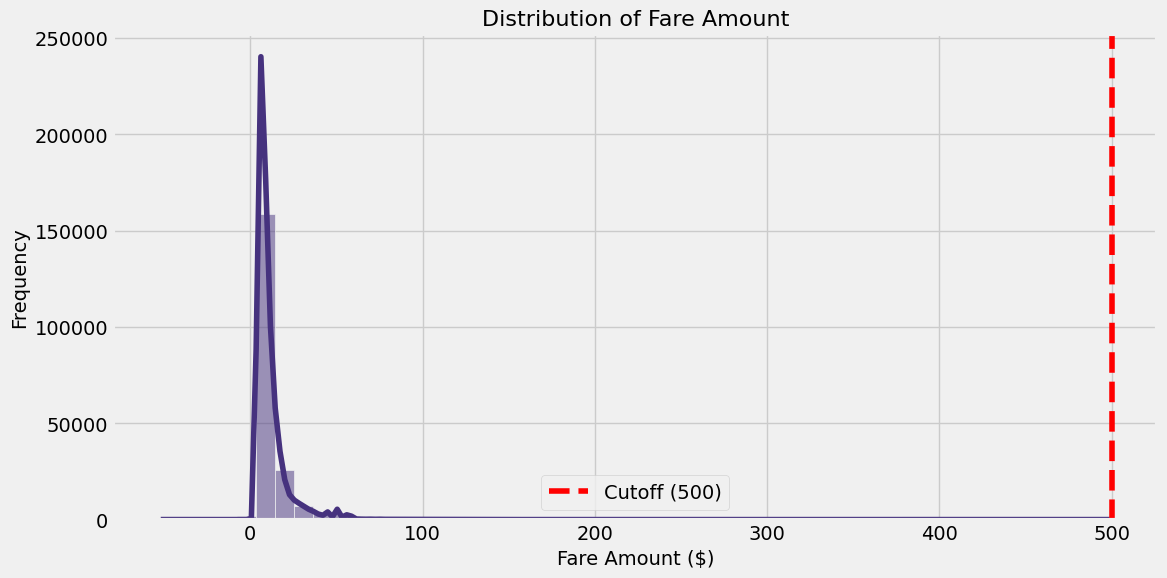

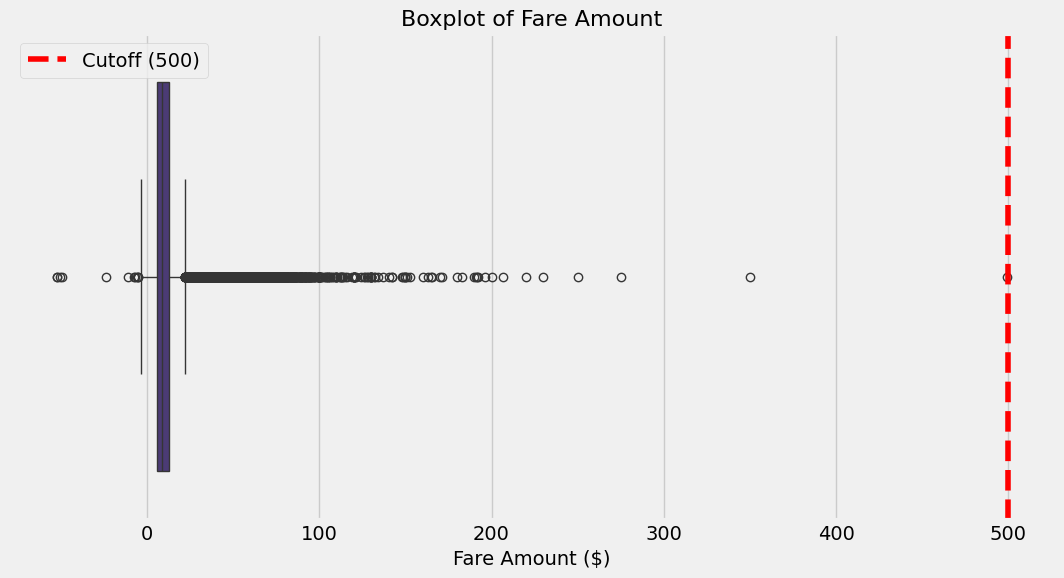

Number of rows with fare_amount > 500: 0
Percentage of rows with fare_amount > 500: 0.00%

Fare Amount Statistics:
count    200000.000000
mean         11.359955
std           9.901776
min         -52.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         499.000000
Name: fare_amount, dtype: float64
99th percentile: 53.30


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plot fare_amount distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['fare_amount'], bins=50, kde=True)
plt.title('Distribution of Fare Amount', fontsize=16)
plt.xlabel('Fare Amount ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.axvline(x=500, color='red', linestyle='--', label='Cutoff (500)') # Changed x to 500
plt.legend()
plt.show()

# Boxplot to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['fare_amount'])
plt.title('Boxplot of Fare Amount', fontsize=16)
plt.xlabel('Fare Amount ($)', fontsize=14)
plt.axvline(x=500, color='red', linestyle='--', label='Cutoff (500)') # Changed x to 500
plt.legend()
plt.show()



# Count rows with fare_amount > 500
rows_above_500= df[df['fare_amount'] >= 500].shape[0]
print(f"Number of rows with fare_amount > 500: {rows_above_500}")
print(f"Percentage of rows with fare_amount > 500: {(rows_above_500 / df.shape[0] * 100):.2f}%")

# Summary statistics for fare_amount
print("\nFare Amount Statistics:")
print(df['fare_amount'].describe())
print(f"99th percentile: {df['fare_amount'].quantile(0.99):.2f}")

In [8]:
print(f"Minimum passenger count: {df['passenger_count'].min()}")
print(f"Maximum passenger count: {df['passenger_count'].max()}")


Minimum passenger count: 0
Maximum passenger count: 208


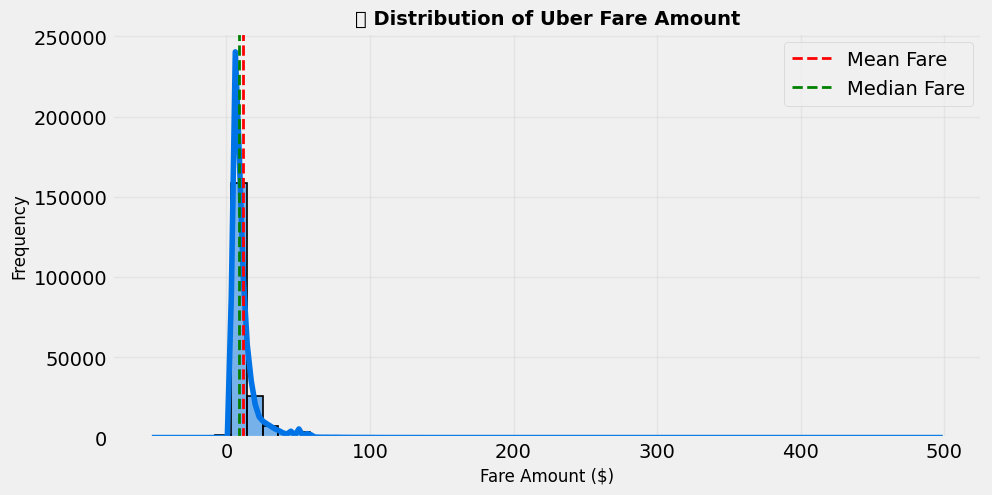

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(df["fare_amount"], bins=50, kde=True, color="#0073e6", edgecolor="black", linewidth=1.2)
plt.axvline(df["fare_amount"].mean(), color="red", linestyle="dashed", linewidth=2, label="Mean Fare")
plt.axvline(df["fare_amount"].median(), color="green", linestyle="dashed", linewidth=2, label="Median Fare")
plt.title("📊 Distribution of Uber Fare Amount", fontsize=14, fontweight="bold")
plt.xlabel("Fare Amount ($)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [10]:
def outlier_detection_stats(df): # Added a function definition
    # Print some summary statistics specifically for outlier detection
    print("\nOutlier Detection Statistics:")
    q1 = df['fare_amount'].quantile(0.25)
    q3 = df['fare_amount'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    print(f"Q1 (25th percentile): {q1:.2f}")
    print(f"Q3 (75th percentile): {q3:.2f}")
    print(f"IQR: {iqr:.2f}")
    print(f"Lower bound for outliers: {lower_bound:.2f}")
    print(f"Upper bound for outliers: {upper_bound:.2f}")
    print(f"Number of potential outliers: {df[(df['fare_amount'] < lower_bound) | (df['fare_amount'] > upper_bound)].shape[0]}")

    return df
outlier_detection_stats(df)


Outlier Detection Statistics:
Q1 (25th percentile): 6.00
Q3 (75th percentile): 12.50
IQR: 6.50
Lower bound for outliers: -3.75
Upper bound for outliers: 22.25
Number of potential outliers: 17167


Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
199995    42598914   2012-10-28 10:49:00.00000053          3.0   
199996    16382965    2014-03-14 01:09:00.0000008          7.5   
199997    27804658   2009-06-29 00:42:00.00000078         30.9   
199998    20259894    2015-05-20 14:56:25.0000004         14.5   
199999    11951496   2010-05-15 04:08:00.00000076         14.1   

                pickup_datetime  pickup_longitude  pickup_latitude  \
0       2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1       2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2       2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3       2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4       2014-08-28 17:47:00 UTC        -73.925023        40.744085   
...                         ...               ...              ...   
199995  2012-10-28 10:49:00 UTC        -73.987042        40.739367   
199996  2014-03-14 01:09:00 UTC        -73.984722        40.736837   
199997  2009-06-29 00:42:00 UTC        -73.986017        40.756487   
199998  2015-05-20 14:56:25 UTC        -73.997124        40.725452   
199999  2010-05-15 04:08:00 UTC        -73.984395        40.720077   

        dropoff_longitude  dropoff_latitude  passenger_count  
0              -73.999512         40.723217                1  
1              -73.994710         40.750325                1  
2              -73.962565         40.772647                1  
3              -73.965316         40.803349                3  
4              -73.973082         40.761247                5  
...                   ...               ...              ...  
199995         -73.986525         40.740297                1  
199996         -74.006672         40.739620                1  
199997         -73.858957         40.692588                2  
199998         -73.983215         40.695415                1  
199999         -73.985508         40.768793                1  

[200000 rows x 9 columns]

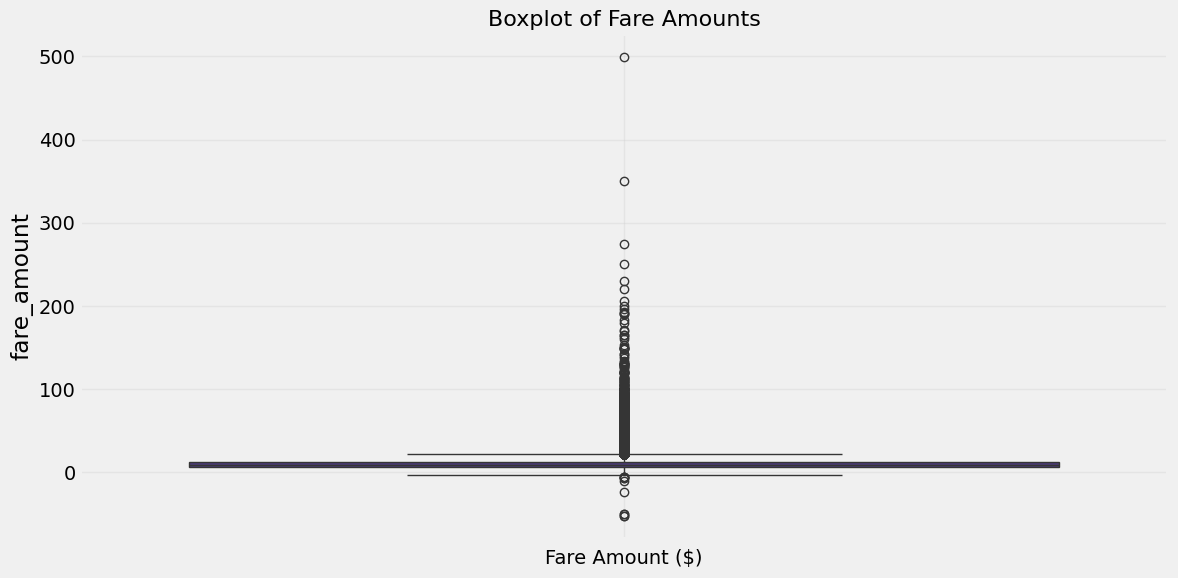

In [11]:
# Check for outliers in fare amounts
plt.figure(figsize=(12, 6)) # Removed extra indentation
sns.boxplot(df['fare_amount'])
plt.title('Boxplot of Fare Amounts', fontsize=16)
plt.xlabel('Fare Amount ($)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [12]:
!pip install folium # Install the folium library
import folium

In [13]:
def visualize_pickup_heatmap(df):
    """Create a heatmap of pickup locations in NYC using Folium."""
    from folium.plugins import HeatMap
    import folium

    # Create a base map centered on NYC
    nyc_map = folium.Map(location=[40.75, -74.00], zoom_start=11)

    # Add pickup locations as a heatmap (limit to 10k points for performance)
    heat_data = list(zip(df['pickup_latitude'], df['pickup_longitude']))
    HeatMap(heat_data[:10000]).add_to(nyc_map)

    return nyc_map
visualize_pickup_heatmap(df)

## **Data cleaning and Feature Enginnering.**

### Basic data cleaning

In [14]:
# Make a copy of the dataframe
df_clean = df.copy()

# Drop NaN values
df_clean = df_clean.dropna()

# Filter fare amount
df_clean = df_clean[(df_clean['fare_amount'] >= 0) & (df_clean['fare_amount'] < 500)]

# Filter passenger count
df_clean = df_clean[(df_clean['passenger_count'] >= 0) & (df_clean['passenger_count'] <= 6)]

# Define NYC bounds
nyc_bounds = {
    'lat_min': 40.5, 'lat_max': 41.0,
    'lon_min': -74.3, 'lon_max': -73.7
}

# Filter by NYC bounds
df_clean = df_clean[
    (df_clean['pickup_latitude'] >= nyc_bounds['lat_min']) &
    (df_clean['pickup_latitude'] <= nyc_bounds['lat_max']) &
    (df_clean['pickup_longitude'] >= nyc_bounds['lon_min']) &
    (df_clean['pickup_longitude'] <= nyc_bounds['lon_max']) &
    (df_clean['dropoff_latitude'] >= nyc_bounds['lat_min']) &
    (df_clean['dropoff_latitude'] <= nyc_bounds['lat_max']) &
    (df_clean['dropoff_longitude'] >= nyc_bounds['lon_min']) &
    (df_clean['dropoff_longitude'] <= nyc_bounds['lon_max'])
]

# Drop unnecessary columns
df_clean.drop(columns=["Unnamed: 0", "key"], inplace=True, errors='ignore')

print(f"Clean dataset shape: {df_clean.shape}")

Clean dataset shape: (195563, 7)


In [15]:
# prompt: add colmuns for if the passenger =0 or not Column name: service_type
# Two possible values:
# "ride" (for passenger trips)
# "connect" (for package delivery trips — because Uber Connect is for sending packages)

# Assuming 'passenger_count' column exists in your DataFrame 'df_clean'
df_clean['service_type'] = df_clean['passenger_count'].apply(lambda x: "ride" if x > 0 else "connect")

In [16]:
df_clean

fare_amount          pickup_datetime  pickup_longitude  \
0               7.5  2015-05-07 19:52:06 UTC        -73.999817   
1               7.7  2009-07-17 20:04:56 UTC        -73.994355   
2              12.9  2009-08-24 21:45:00 UTC        -74.005043   
3               5.3  2009-06-26 08:22:21 UTC        -73.976124   
4              16.0  2014-08-28 17:47:00 UTC        -73.925023   
...             ...                      ...               ...   
199995          3.0  2012-10-28 10:49:00 UTC        -73.987042   
199996          7.5  2014-03-14 01:09:00 UTC        -73.984722   
199997         30.9  2009-06-29 00:42:00 UTC        -73.986017   
199998         14.5  2015-05-20 14:56:25 UTC        -73.997124   
199999         14.1  2010-05-15 04:08:00 UTC        -73.984395   

        pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0             40.738354         -73.999512         40.723217                1   
1             40.728225         -73.994710         40.750325                1   
2             40.740770         -73.962565         40.772647                1   
3             40.790844         -73.965316         40.803349                3   
4             40.744085         -73.973082         40.761247                5   
...                 ...                ...               ...              ...   
199995        40.739367         -73.986525         40.740297                1   
199996        40.736837         -74.006672         40.739620                1   
199997        40.756487         -73.858957         40.692588                2   
199998        40.725452         -73.983215         40.695415                1   
199999        40.720077         -73.985508         40.768793                1   

       service_type  
0              ride  
1              ride  
2              ride  
3              ride  
4              ride  
...             ...  
199995         ride  
199996         ride  
199997         ride  
199998         ride  
199999         ride  

[195563 rows x 8 columns]

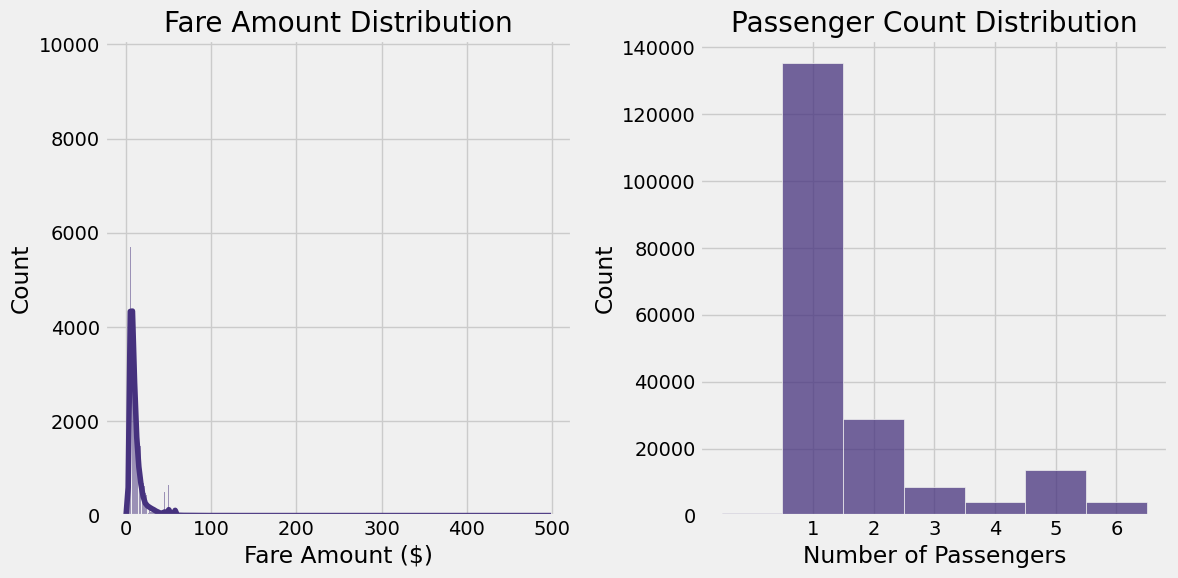

In [17]:
# Visualize the distribution of fare amounts after cleaning
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_clean['fare_amount'], kde=True)
plt.title('Fare Amount Distribution')
plt.xlabel('Fare Amount ($)')

plt.subplot(1, 2, 2)
sns.histplot(df_clean['passenger_count'], kde=False, discrete=True)
plt.title('Passenger Count Distribution')
plt.xlabel('Number of Passengers')
plt.xticks(range(1, 7))

plt.tight_layout()
plt.show()

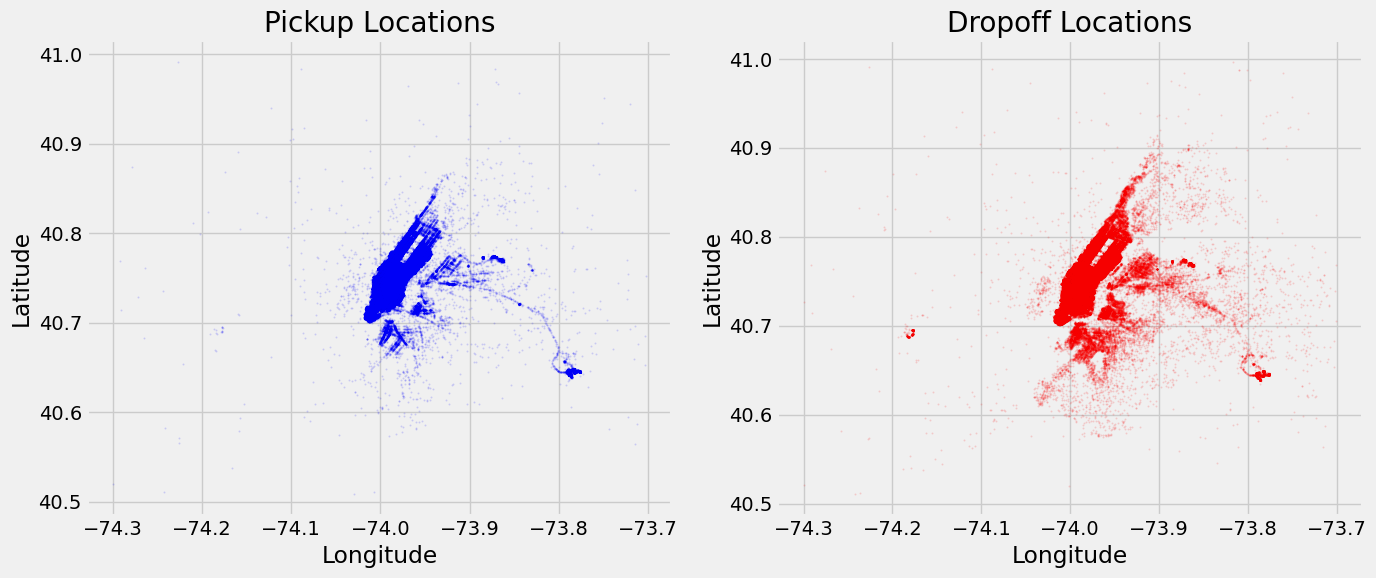

In [18]:
# Visualize pickup and dropoff coordinates
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(df_clean['pickup_longitude'], df_clean['pickup_latitude'],
            alpha=0.1, s=1, c='blue')
plt.title('Pickup Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.subplot(1, 2, 2)
plt.scatter(df_clean['dropoff_longitude'], df_clean['dropoff_latitude'],
            alpha=0.1, s=1, c='red')
plt.title('Dropoff Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.tight_layout()
plt.show()

### Distance calculations

In [19]:
# calculate distance
def haversine(lat1, lon1, lat2, lon2):
    """Calculate the great circle distance between two points on the earth"""
    R = 6371  # Earth radius in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    return 2 * R * np.arcsin(np.sqrt(a))

def calculate_manhattan_distance(df):
    """Calculate Manhattan distance using latitude and longitude differences"""
    # Approximate conversion: 1 degree latitude = 111 km, 1 degree longitude = 85 km at NYC's latitude
    lat_distance = np.abs(df['dropoff_latitude'] - df['pickup_latitude']) * 111
    lng_distance = np.abs(df['dropoff_longitude'] - df['pickup_longitude']) * 85
    return lat_distance + lng_distance

In [20]:
# Calculate distances
df_clean['distance_km'] = haversine(
    df_clean['pickup_latitude'], df_clean['pickup_longitude'],
    df_clean['dropoff_latitude'], df_clean['dropoff_longitude']
)

df_clean['manhattan_distance'] = calculate_manhattan_distance(df_clean)


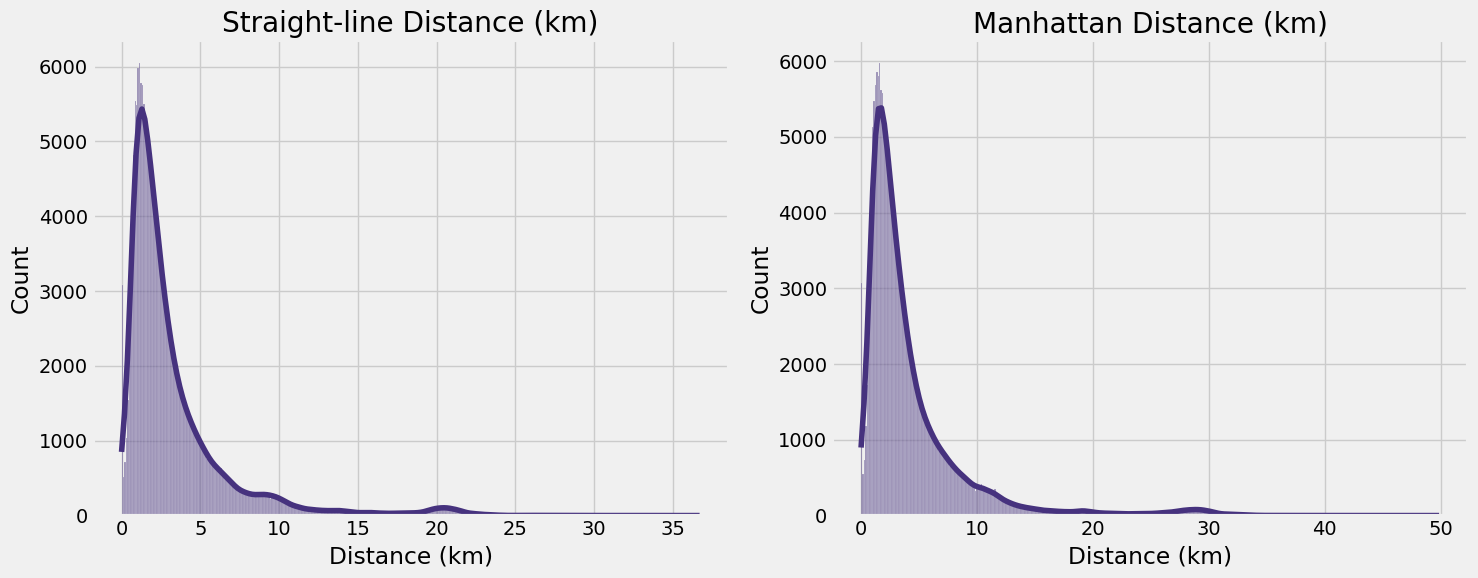

In [21]:
# Visualize distance distribution
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_clean['distance_km'], kde=True)
plt.title('Straight-line Distance (km)')
plt.xlabel('Distance (km)')

plt.subplot(1, 2, 2)
sns.histplot(df_clean['manhattan_distance'], kde=True)
plt.title('Manhattan Distance (km)')
plt.xlabel('Distance (km)')

plt.tight_layout()
plt.show()

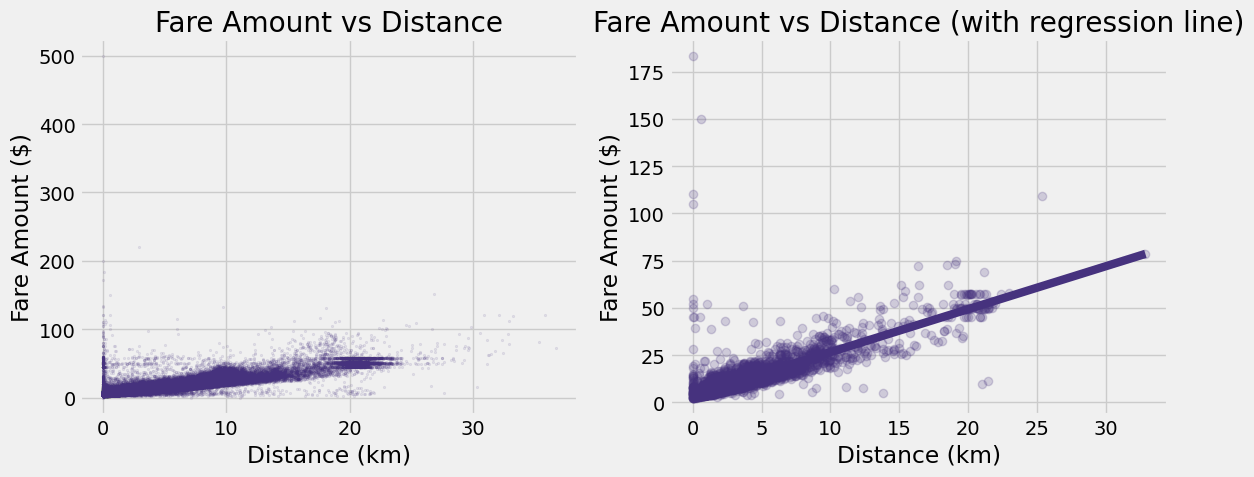

In [22]:
# Scatter plot of fare vs distance
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(df_clean['distance_km'], df_clean['fare_amount'], alpha=0.1, s=3)
plt.title('Fare Amount vs Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Fare Amount ($)')

plt.subplot(1, 2, 2)
sns.regplot(x='distance_km', y='fare_amount', data=df_clean.sample(5000), scatter_kws={'alpha':0.2})
plt.title('Fare Amount vs Distance (with regression line)')
plt.xlabel('Distance (km)')
plt.ylabel('Fare Amount ($)')

plt.tight_layout()
plt.show()

In [23]:
# prompt: i want to see the unice value in fare_amount and there count when the distance = 0 pritn top 30

# Assuming 'df_clean' is your DataFrame as defined in the provided code.
zero_distance_fares = df_clean[df_clean['distance_km'] == 0]['fare_amount']
fare_counts = zero_distance_fares.value_counts().head(30)
fare_counts

fare_amount
2.5     131
4.5     110
6.5     101
4.9      92
5.7      89
5.3      76
4.1      73
6.1      62
6.9      62
3.7      53
8.5      52
8.1      46
7.7      44
7.3      42
8.9      40
5.5      37
5.0      34
7.5      33
45.0     33
6.0      31
9.3      29
10.5     28
4.0      28
2.9      26
8.0      21
3.3      21
7.0      21
10.1     20
9.0      19
3.0      17
Name: count, dtype: int64

In [24]:
def check_trip_completion(df):
    """Checks if a trip was completed based on pickup and dropoff coordinates.
    Assigns 'Canceled' if coordinates are the same, 'Completed' otherwise.
    """
    # Create conditions
    conditions = [
        (df_clean['pickup_latitude'] == df_clean['dropoff_latitude']) & (df_clean['pickup_longitude'] == df_clean['dropoff_longitude']),
        (df_clean['pickup_latitude'] != df_clean['dropoff_latitude']) | (df_clean['pickup_longitude'] != df_clean['dropoff_longitude'])
    ]

    # Values to assign based on conditions (using integers to avoid dtype issues)
    values = [0, 1]  # 0 for 'Canceled', 1 for 'Completed'

    # Add completion status column using integers
    df_clean['completion'] = np.select(conditions, values)

    # Map integers to string labels
    df_clean['completion'] = df_clean['completion'].map({0: 'Canceled', 1: 'Completed'})

    return df_clean
check_trip_completion(df_clean)
# Print all canceled trips
canceled_trips = df_clean[df_clean['completion'] == 'Canceled']
canceled_trips
print(canceled_trips[['fare_amount', 'distance_km', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']])

        fare_amount  distance_km  pickup_latitude  pickup_longitude  \
5              4.90          0.0        40.755910        -73.969019   
48            56.80          0.0        40.764686        -73.993498   
84            49.57          0.0        40.788820        -73.975058   
166            4.50          0.0        40.757780        -73.992937   
361           10.10          0.0        40.753475        -73.928705   
...             ...          ...              ...               ...   
199448         5.70          0.0        40.745833        -73.924907   
199612         4.50          0.0        40.765832        -73.969717   
199647         2.50          0.0        40.771633        -73.956623   
199917         4.50          0.0        40.656939        -73.793768   
199932        24.90          0.0        40.756295        -73.974618   

        dropoff_latitude  dropoff_longitude  
5              40.755910         -73.969019  
48             40.764686         -73.993498  
84       

### Handle outliers

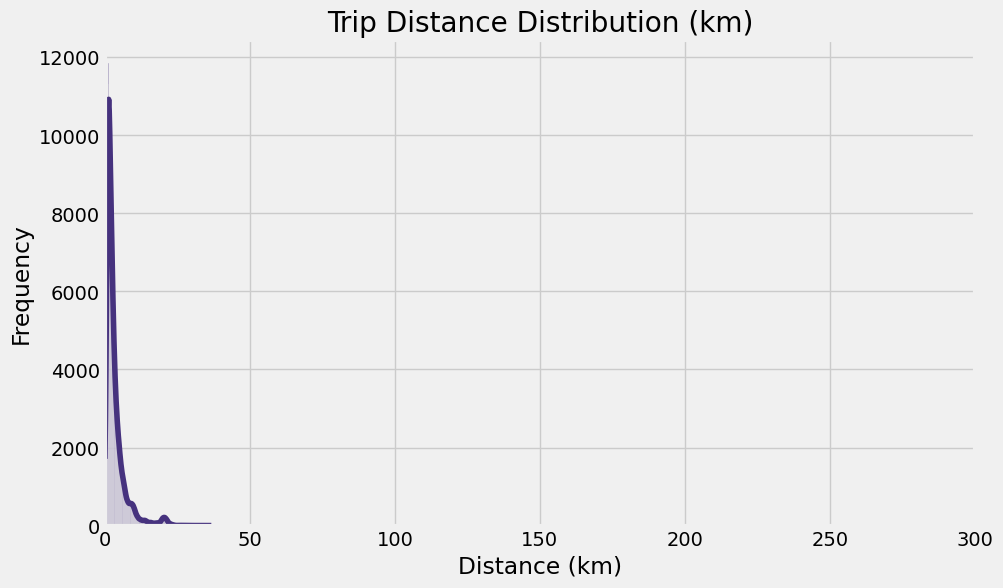

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of distances
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['distance_km'], bins=200, kde=True)
plt.xlim(0, 300)  # View up to 300 km
plt.title("Trip Distance Distribution (km)")
plt.xlabel("Distance (km)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


non logic trip.

In [26]:
# Display trips where fare is above 120 but distance is less than 10 km
suspicious_fares = df_clean[(df_clean['fare_amount'] > 100) & (df_clean['distance_km'] < 1)]

# Show the result
print(f"Number of suspicious trips: {len(suspicious_fares)}")
display(suspicious_fares[['fare_amount', 'distance_km', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']])


Number of suspicious trips: 20


fare_amount  distance_km  pickup_latitude  pickup_longitude  \
2053         113.66     0.127635        40.778753        -73.951227   
5968         105.00     0.000420        40.923303        -73.752265   
15362        120.30     0.559508        40.769470        -73.995309   
15935        150.00     0.598372        40.969677        -73.870154   
16387        134.29     0.004431        40.983791        -73.871948   
44373        132.33     0.001713        40.926255        -73.957087   
51017        106.50     0.574746        40.692321        -74.184196   
53996        171.35     0.000418        40.768783        -74.291586   
127214       183.00     0.058804        40.991651        -74.226741   
129041       105.29     0.002969        40.754650        -74.025604   
131872       110.00     0.000000        40.510800        -74.242129   
134524       110.00     0.000000        40.917693        -74.085449   
144171       107.50     0.000875        40.586837        -73.712770   
150980       110.00     0.242336        40.768952        -73.863580   
155062       120.00     0.001029        40.774128        -74.041000   
158120       120.00     0.000000        40.904503        -74.101122   
163221       108.00     0.180439        40.873667        -74.278169   
166885       100.30     0.543552        40.772440        -73.833962   
170081       499.00     0.000790        40.764602        -73.968377   
196647       200.00     0.000000        40.736298        -73.952994   

        dropoff_latitude  dropoff_longitude  
2053           40.778149         -73.949938  
5968           40.923303         -73.752270  
15362          40.768919         -73.988705  
15935          40.970619         -73.877171  
16387          40.983829         -73.871933  
44373          40.926252         -73.957107  
51017          40.689139         -74.178824  
53996          40.768786         -74.291589  
127214         40.991412         -74.226116  
129041         40.754623         -74.025604  
131872         40.510800         -74.242129  
134524         40.917693         -74.085449  
144171         40.586832         -73.712762  
150980         40.770678         -73.865337  
155062         40.774135         -74.041008  
158120         40.904503         -74.101122  
163221         40.874492         -74.276321  
166885         40.775877         -73.829372  
170081         40.764600         -73.968368  
196647         40.736298         -73.952994

In [27]:
print(df_clean['distance_km'].describe())


count    195563.000000
mean          3.310208
std           3.565935
min           0.000000
25%           1.256520
50%           2.156432
75%           3.905320
max          36.687405
Name: distance_km, dtype: float64


In [28]:
# Filter trips with distance greater than or equal to 100 km
long_distance_trips = df_clean[df_clean['distance_km'] >= 100]

# Display number of such trips and their key details
print(f"Number of trips with distance >= 100 km: {len(long_distance_trips)}")
print(long_distance_trips[['fare_amount', 'distance_km', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']])


Number of trips with distance >= 100 km: 0
Empty DataFrame
Columns: [fare_amount, distance_km, pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude]
Index: []


In [29]:
# Display trips where distance is less than 1 km
short_distance_trips = df_clean[df_clean['distance_km'] < 1]

# Show the result
print(f"Number of trips with distance < 1 km: {len(short_distance_trips)}")
display(short_distance_trips[['fare_amount', 'distance_km', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']])


Number of trips with distance < 1 km: 32148


fare_amount  distance_km  pickup_latitude  pickup_longitude  \
5               4.9     0.000000        40.755910        -73.969019   
12              3.3     0.302252        40.804440        -73.966378   
16              4.9     0.729966        40.756982        -73.988908   
21              5.0     0.959469        40.729141        -73.989189   
26              5.0     0.723253        40.776372        -73.957802   
...             ...          ...              ...               ...   
199946          6.5     0.964573        40.739971        -73.994881   
199954          4.1     0.745996        40.738949        -73.983022   
199983          4.5     0.514754        40.726378        -74.005619   
199988          3.7     0.177836        40.739342        -73.988674   
199995          3.0     0.112210        40.739367        -73.987042   

        dropoff_latitude  dropoff_longitude  
5              40.755910         -73.969019  
12             40.807133         -73.965890  
16             40.760050         -73.981246  
21             40.720634         -73.987282  
26             40.782870         -73.957422  
...                  ...                ...  
199946         40.739368         -74.006302  
199954         40.745649         -73.983478  
199983         40.721851         -74.004342  
199988         40.738980         -73.990730  
199995         40.740297         -73.986525  

[32148 rows x 6 columns]

In [30]:
# Display trips where distance is less than 0.1 km
short_distance_trips = df_clean[df_clean['distance_km'] < 0.01]

# Show the result
print(f"Number of trips with distance < 0.01 km: {len(short_distance_trips)}")
display(short_distance_trips[['fare_amount', 'distance_km', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']])


Number of trips with distance < 0.01 km: 2427


fare_amount  distance_km  pickup_latitude  pickup_longitude  \
5              4.90     0.000000        40.755910        -73.969019   
48            56.80     0.000000        40.764686        -73.993498   
84            49.57     0.000000        40.788820        -73.975058   
166            4.50     0.000000        40.757780        -73.992937   
361           10.10     0.000000        40.753475        -73.928705   
...             ...          ...              ...               ...   
199643         2.50     0.001950        40.746455        -73.928475   
199647         2.50     0.000000        40.771633        -73.956623   
199658         2.50     0.006394        40.749848        -73.968923   
199917         4.50     0.000000        40.656939        -73.793768   
199932        24.90     0.000000        40.756295        -73.974618   

        dropoff_latitude  dropoff_longitude  
5              40.755910         -73.969019  
48             40.764686         -73.993498  
84             40.788820         -73.975058  
166            40.757780         -73.992937  
361            40.753475         -73.928705  
...                  ...                ...  
199643         40.746470         -73.928463  
199647         40.771633         -73.956623  
199658         40.749905         -73.968913  
199917         40.656939         -73.793768  
199932         40.756295         -73.974618  

[2427 rows x 6 columns]

In [31]:
# Display trips where distance is less than 0.1 km
short_distance_trips = df_clean[df_clean['distance_km'] < 0.1]

# Show the result
print(f"Number of trips with distance < 0.1 km: {len(short_distance_trips)}")
display(short_distance_trips[['fare_amount', 'distance_km', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']])


Number of trips with distance < 0.1 km: 3118


fare_amount  distance_km  pickup_latitude  pickup_longitude  \
5              4.90     0.000000        40.755910        -73.969019   
48            56.80     0.000000        40.764686        -73.993498   
84            49.57     0.000000        40.788820        -73.975058   
166            4.50     0.000000        40.757780        -73.992937   
361           10.10     0.000000        40.753475        -73.928705   
...             ...          ...              ...               ...   
199643         2.50     0.001950        40.746455        -73.928475   
199647         2.50     0.000000        40.771633        -73.956623   
199658         2.50     0.006394        40.749848        -73.968923   
199917         4.50     0.000000        40.656939        -73.793768   
199932        24.90     0.000000        40.756295        -73.974618   

        dropoff_latitude  dropoff_longitude  
5              40.755910         -73.969019  
48             40.764686         -73.993498  
84             40.788820         -73.975058  
166            40.757780         -73.992937  
361            40.753475         -73.928705  
...                  ...                ...  
199643         40.746470         -73.928463  
199647         40.771633         -73.956623  
199658         40.749905         -73.968913  
199917         40.656939         -73.793768  
199932         40.756295         -73.974618  

[3118 rows x 6 columns]

In [32]:
# Drop suspicious fares
df_clean = df_clean[~((df_clean['fare_amount'] > 100) & (df_clean['distance_km'] < 1 ))]
# Drop short distance trips
df_clean = df_clean[(df_clean['distance_km'] > 0.1) | (df_clean['distance_km'] == 0)]


In [33]:
df_clean

fare_amount          pickup_datetime  pickup_longitude  \
0               7.5  2015-05-07 19:52:06 UTC        -73.999817   
1               7.7  2009-07-17 20:04:56 UTC        -73.994355   
2              12.9  2009-08-24 21:45:00 UTC        -74.005043   
3               5.3  2009-06-26 08:22:21 UTC        -73.976124   
4              16.0  2014-08-28 17:47:00 UTC        -73.925023   
...             ...                      ...               ...   
199995          3.0  2012-10-28 10:49:00 UTC        -73.987042   
199996          7.5  2014-03-14 01:09:00 UTC        -73.984722   
199997         30.9  2009-06-29 00:42:00 UTC        -73.986017   
199998         14.5  2015-05-20 14:56:25 UTC        -73.997124   
199999         14.1  2010-05-15 04:08:00 UTC        -73.984395   

        pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0             40.738354         -73.999512         40.723217                1   
1             40.728225         -73.994710         40.750325                1   
2             40.740770         -73.962565         40.772647                1   
3             40.790844         -73.965316         40.803349                3   
4             40.744085         -73.973082         40.761247                5   
...                 ...                ...               ...              ...   
199995        40.739367         -73.986525         40.740297                1   
199996        40.736837         -74.006672         40.739620                1   
199997        40.756487         -73.858957         40.692588                2   
199998        40.725452         -73.983215         40.695415                1   
199999        40.720077         -73.985508         40.768793                1   

       service_type  distance_km  manhattan_distance completion  
0              ride     1.683323            1.706116  Completed  
1              ride     2.457590            2.483275  Completed  
2              ride     5.036377            7.148977  Completed  
3              ride     1.661683            2.306735  Completed  
4              ride     4.475450            5.989997  Completed  
...             ...          ...                 ...        ...  
199995         ride     0.112210            0.147175  Completed  
199996         ride     1.875050            2.174663  Completed  
199997         ride    12.850319           17.892889  Completed  
199998         ride     3.539715            4.516312  Completed  
199999         ride     5.417783            5.502081  Completed  

[194397 rows x 11 columns]

In [34]:
# prompt: print the top 30 far amount with there destance
df_1 = df_clean.copy()
df_1['distance_km'] = haversine(
    df_1['pickup_latitude'], df_1['pickup_longitude'],
    df_1['dropoff_latitude'], df_1['dropoff_longitude']
)
# Sort the DataFrame by 'fare_amount' in descending order and get the top 30
top_30_fares = df_1.sort_values(by='fare_amount', ascending=False).head(30)

# Print the top 30 fare amounts with their corresponding distances
print(top_30_fares[['fare_amount', 'distance_km']])


        fare_amount  distance_km
29261        220.00     2.914493
131093       150.83    26.827255
95337        131.93     9.702502
194454       130.25    18.100128
23232        121.33    30.891867
190767       120.30    35.825692
15461        120.08    32.070607
43712        119.00    33.254605
34110        116.00    17.591683
147799       115.00     5.994768
140422       113.00    22.649459
53017        112.57    15.484510
92396        112.15    32.888687
117365       111.75    19.117175
178450       110.25    18.780492
196616       109.00    25.341578
120150       106.50    24.580756
22562        105.33    24.784015
28809        104.00    18.543288
110500       103.66    29.832848
93043        103.58    13.577445
166561       102.00    22.370219
131423       101.00    22.924158
73591        100.90     5.961934
45787        100.58    26.654171
65917        100.00    22.644763
58473        100.00    22.981154
49029         99.20    22.855103
42143         99.00    13.145393
52566     

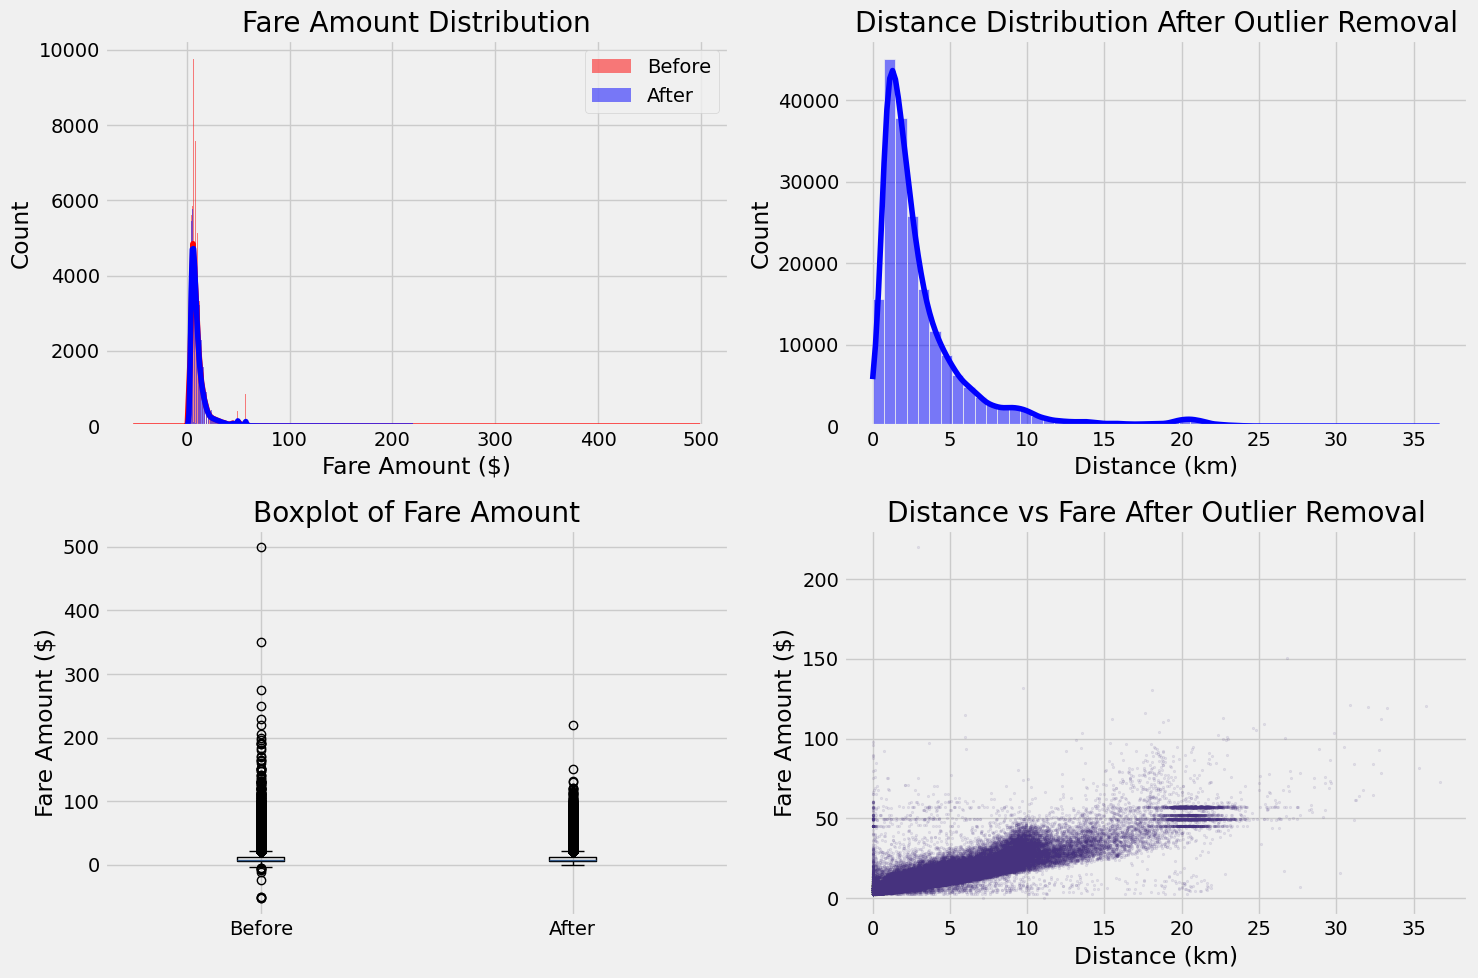

In [35]:
# Visualize the effect of outlier removal
plt.figure(figsize=(15, 10))

# Fare amount distribution before and after
plt.subplot(2, 2, 1)
sns.histplot(df['fare_amount'], kde=True, color='red', alpha=0.5, label='Before')
sns.histplot(df_clean['fare_amount'], kde=True, color='blue', alpha=0.5, label='After')
plt.title('Fare Amount Distribution')
plt.xlabel('Fare Amount ($)')
plt.legend()

# Distance distribution before and after
plt.subplot(2, 2, 2)
sns.histplot(df_clean['distance_km'], kde=True, color='blue', bins=50)
plt.title('Distance Distribution After Outlier Removal')
plt.xlabel('Distance (km)')

# Boxplot of fare amount before and after
plt.subplot(2, 2, 3)
fare_data = [df['fare_amount'], df_clean['fare_amount']]
plt.boxplot(fare_data, labels=['Before', 'After'])
plt.title('Boxplot of Fare Amount')
plt.ylabel('Fare Amount ($)')

# Scatter plot of distance vs fare after outlier removal
plt.subplot(2, 2, 4)
plt.scatter(df_clean['distance_km'], df_clean['fare_amount'], alpha=0.1, s=3)
plt.title('Distance vs Fare After Outlier Removal')
plt.xlabel('Distance (km)')
plt.ylabel('Fare Amount ($)')

plt.tight_layout()
plt.show()

In [36]:
# Calculate and display summary statistics before and after
fare_before = df['fare_amount'].describe()
fare_after = df_clean['fare_amount'].describe()
distance_before = df_clean['distance_km'].describe()
distance_after = df_clean['distance_km'].describe()

summary_comparison = pd.DataFrame({
    'Fare Before': fare_before,
    'Fare After': fare_after,
    'Distance Before': distance_before,
    'Distance After': distance_after
})

print("\nSummary Statistics Comparison:")
print(summary_comparison)


Summary Statistics Comparison:
         Fare Before     Fare After  Distance Before  Distance After
count  200000.000000  194397.000000    194397.000000   194397.000000
mean       11.359955      11.279681         3.329874        3.329874
std         9.901776       9.363070         3.567532        3.567532
min       -52.000000       0.000000         0.000000        0.000000
25%         6.000000       6.000000         1.270098        1.270098
50%         8.500000       8.500000         2.170316        2.170316
75%        12.500000      12.500000         3.922570        3.922570
max       499.000000     220.000000        36.687405       36.687405


### Time features

In [37]:
# Convert pickup_datetime to datetime
df_clean['pickup_datetime'] = pd.to_datetime(df_clean['pickup_datetime'])

# Extract time features
df_clean['hour'] = df_clean['pickup_datetime'].dt.hour
df_clean['day'] = df_clean['pickup_datetime'].dt.day
df_clean['month'] = df_clean['pickup_datetime'].dt.month
df_clean['year'] = df_clean['pickup_datetime'].dt.year
df_clean['day_of_week'] = df_clean['pickup_datetime'].dt.weekday
df_clean['is_weekend'] = (df_clean['day_of_week'] >= 5).astype(int)

# Cyclical encoding of hour (to preserve cyclical nature of time)
df_clean['hour_sin'] = np.sin(2 * np.pi * df_clean['hour'] / 24)
df_clean['hour_cos'] = np.cos(2 * np.pi * df_clean['hour'] / 24)

# Time period features
df_clean['is_rush_hour_morning'] = ((df_clean['hour'] >= 7) & (df_clean['hour'] <= 10)).astype(int)
df_clean['is_rush_hour_evening'] = ((df_clean['hour'] >= 16) & (df_clean['hour'] <= 19)).astype(int)
df_clean['is_night_time'] = ((df_clean['hour'] >= 22) | (df_clean['hour'] <= 5)).astype(int)
df_clean['is_business_hours'] = ((df_clean['hour'] >= 9) & (df_clean['hour'] <= 17) & (df_clean['day_of_week'] < 5)).astype(int)

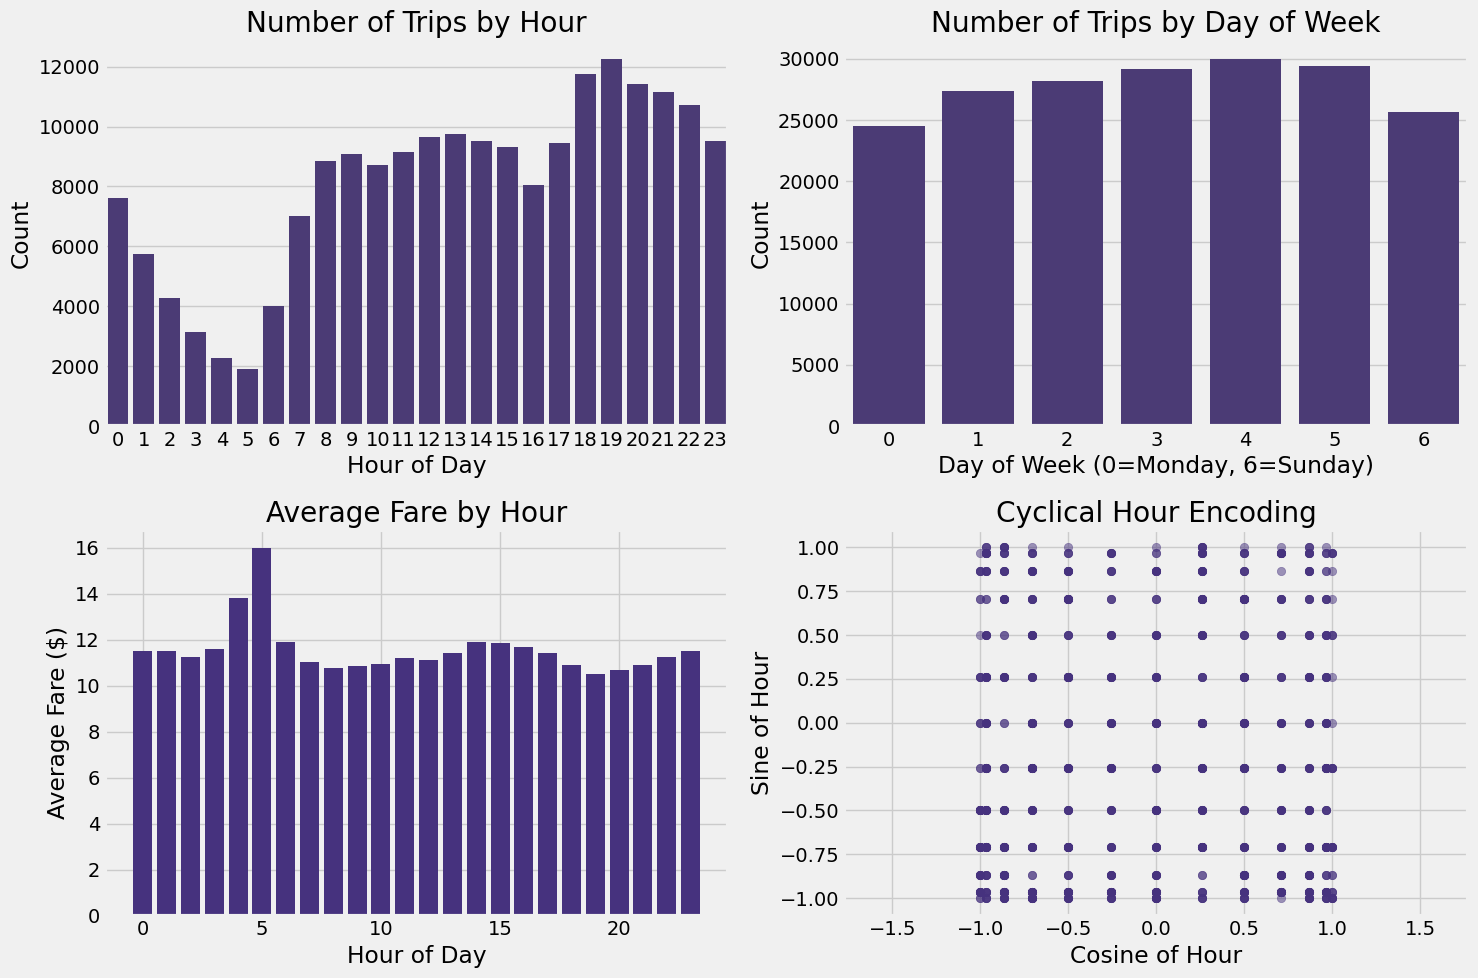

In [38]:
# Visualize time-based patterns
plt.figure(figsize=(15, 10))

# Trips by hour
plt.subplot(2, 2, 1)
sns.countplot(x='hour', data=df_clean)
plt.title('Number of Trips by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')

# Trips by day of week
plt.subplot(2, 2, 2)
sns.countplot(x='day_of_week', data=df_clean)
plt.title('Number of Trips by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Count')

# Average fare by hour
plt.subplot(2, 2, 3)
hourly_fare = df_clean.groupby('hour')['fare_amount'].mean()
plt.bar(hourly_fare.index, hourly_fare.values)
plt.title('Average Fare by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare ($)')

# Visualization of cyclical time encoding
plt.subplot(2, 2, 4)
plt.scatter(df_clean['hour_cos'].sample(1000), df_clean['hour_sin'].sample(1000), alpha=0.5)
plt.title('Cyclical Hour Encoding')
plt.xlabel('Cosine of Hour')
plt.ylabel('Sine of Hour')
plt.axis('equal')

plt.tight_layout()
plt.show()

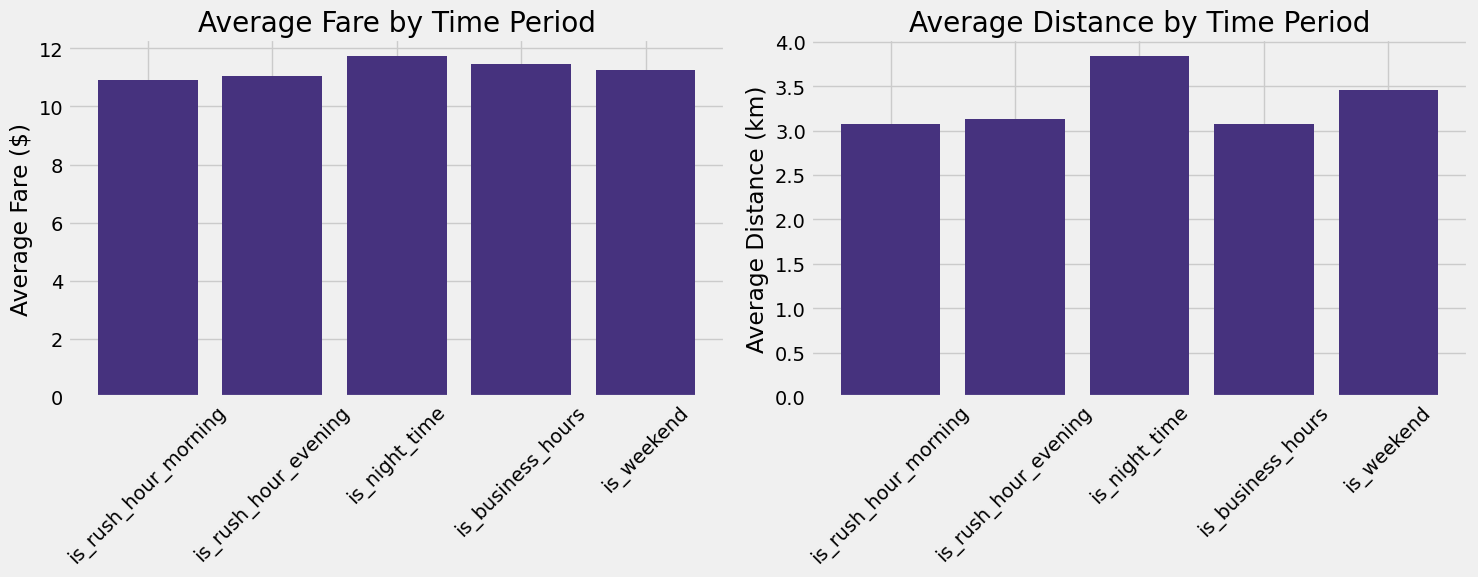

In [39]:
# Time period comparison
plt.figure(figsize=(15, 6))

# Mean fare by time period
time_periods = ['is_rush_hour_morning', 'is_rush_hour_evening', 'is_night_time', 'is_business_hours', 'is_weekend']
plt.subplot(1, 2, 1)
period_fares = [df_clean[df_clean[period] == 1]['fare_amount'].mean() for period in time_periods]
plt.bar(time_periods, period_fares)
plt.title('Average Fare by Time Period')
plt.ylabel('Average Fare ($)')
plt.xticks(rotation=45)

# Mean distance by time period
plt.subplot(1, 2, 2)
period_distances = [df_clean[df_clean[period] == 1]['distance_km'].mean() for period in time_periods]
plt.bar(time_periods, period_distances)
plt.title('Average Distance by Time Period')
plt.ylabel('Average Distance (km)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Location-based features

In [40]:
# Manhattan boundaries (approximate)
manhattan_bounds = {
    'north': 40.879, 'south': 40.703,
    'east': -73.907, 'west': -74.030
}

# Check if pickup/dropoff is in Manhattan
df_clean['pickup_in_manhattan'] = (
    (df_clean['pickup_latitude'] >= manhattan_bounds['south']) &
    (df_clean['pickup_latitude'] <= manhattan_bounds['north']) &
    (df_clean['pickup_longitude'] >= manhattan_bounds['west']) &
    (df_clean['pickup_longitude'] <= manhattan_bounds['east'])
).astype(int)

df_clean['dropoff_in_manhattan'] = (
    (df_clean['dropoff_latitude'] >= manhattan_bounds['south']) &
    (df_clean['dropoff_latitude'] <= manhattan_bounds['north']) &
    (df_clean['dropoff_longitude'] >= manhattan_bounds['west']) &
    (df_clean['dropoff_longitude'] <= manhattan_bounds['east'])
).astype(int)

# Trip characteristics
df_clean['manhattan_to_manhattan'] = (df_clean['pickup_in_manhattan'] & df_clean['dropoff_in_manhattan']).astype(int)
df_clean

fare_amount           pickup_datetime  pickup_longitude  \
0               7.5 2015-05-07 19:52:06+00:00        -73.999817   
1               7.7 2009-07-17 20:04:56+00:00        -73.994355   
2              12.9 2009-08-24 21:45:00+00:00        -74.005043   
3               5.3 2009-06-26 08:22:21+00:00        -73.976124   
4              16.0 2014-08-28 17:47:00+00:00        -73.925023   
...             ...                       ...               ...   
199995          3.0 2012-10-28 10:49:00+00:00        -73.987042   
199996          7.5 2014-03-14 01:09:00+00:00        -73.984722   
199997         30.9 2009-06-29 00:42:00+00:00        -73.986017   
199998         14.5 2015-05-20 14:56:25+00:00        -73.997124   
199999         14.1 2010-05-15 04:08:00+00:00        -73.984395   

        pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0             40.738354         -73.999512         40.723217                1   
1             40.728225         -73.994710         40.750325                1   
2             40.740770         -73.962565         40.772647                1   
3             40.790844         -73.965316         40.803349                3   
4             40.744085         -73.973082         40.761247                5   
...                 ...                ...               ...              ...   
199995        40.739367         -73.986525         40.740297                1   
199996        40.736837         -74.006672         40.739620                1   
199997        40.756487         -73.858957         40.692588                2   
199998        40.725452         -73.983215         40.695415                1   
199999        40.720077         -73.985508         40.768793                1   

       service_type  distance_km  manhattan_distance  ... is_weekend  \
0              ride     1.683323            1.706116  ...          0   
1              ride     2.457590            2.483275  ...          0   
2              ride     5.036377            7.148977  ...          0   
3              ride     1.661683            2.306735  ...          0   
4              ride     4.475450            5.989997  ...          0   
...             ...          ...                 ...  ...        ...   
199995         ride     0.112210            0.147175  ...          1   
199996         ride     1.875050            2.174663  ...          0   
199997         ride    12.850319           17.892889  ...          0   
199998         ride     3.539715            4.516312  ...          0   
199999         ride     5.417783            5.502081  ...          1   

        hour_sin  hour_cos  is_rush_hour_morning  is_rush_hour_evening  \
0      -0.965926  0.258819                     0                     1   
1      -0.866025  0.500000                     0                     0   
2      -0.707107  0.707107                     0                     0   
3       0.866025 -0.500000                     1                     0   
4      -0.965926 -0.258819                     0                     1   
...          ...       ...                   ...                   ...   
199995  0.500000 -0.866025                     1                     0   
199996  0.258819  0.965926                     0                     0   
199997  0.000000  1.000000                     0                     0   
199998 -0.500000 -0.866025                     0                     0   
199999  0.866025  0.500000                     0                     0   

        is_night_time  is_business_hours  pickup_in_manhattan  \
0                   0                  0                    1   
1                   0                  0                    1   
2                   0                  0                    1   
3                   0                  0                    1   
4                   0                  1                    1   
...               ...                ...                  ...   
199995              0

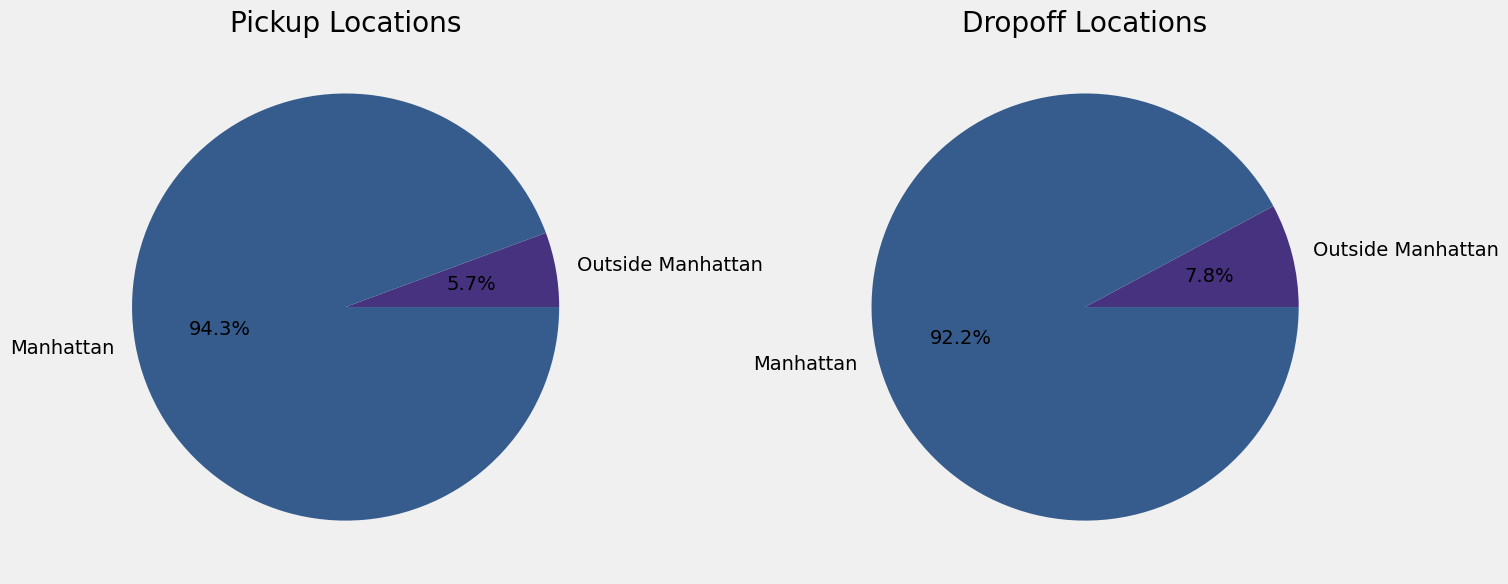

In [41]:
# Visualize location-based features
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
# Manhattan vs non-Manhattan trips
labels = ['Outside Manhattan', 'Manhattan']
pickup_counts = [
    (df_clean['pickup_in_manhattan'] == 0).sum(),
    (df_clean['pickup_in_manhattan'] == 1).sum()
]
plt.pie(pickup_counts, labels=labels, autopct='%1.1f%%')
plt.title('Pickup Locations')

plt.subplot(1, 2, 2)
dropoff_counts = [
    (df_clean['dropoff_in_manhattan'] == 0).sum(),
    (df_clean['dropoff_in_manhattan'] == 1).sum()
]
plt.pie(dropoff_counts, labels=labels, autopct='%1.1f%%')
plt.title('Dropoff Locations')

plt.tight_layout()
plt.show()

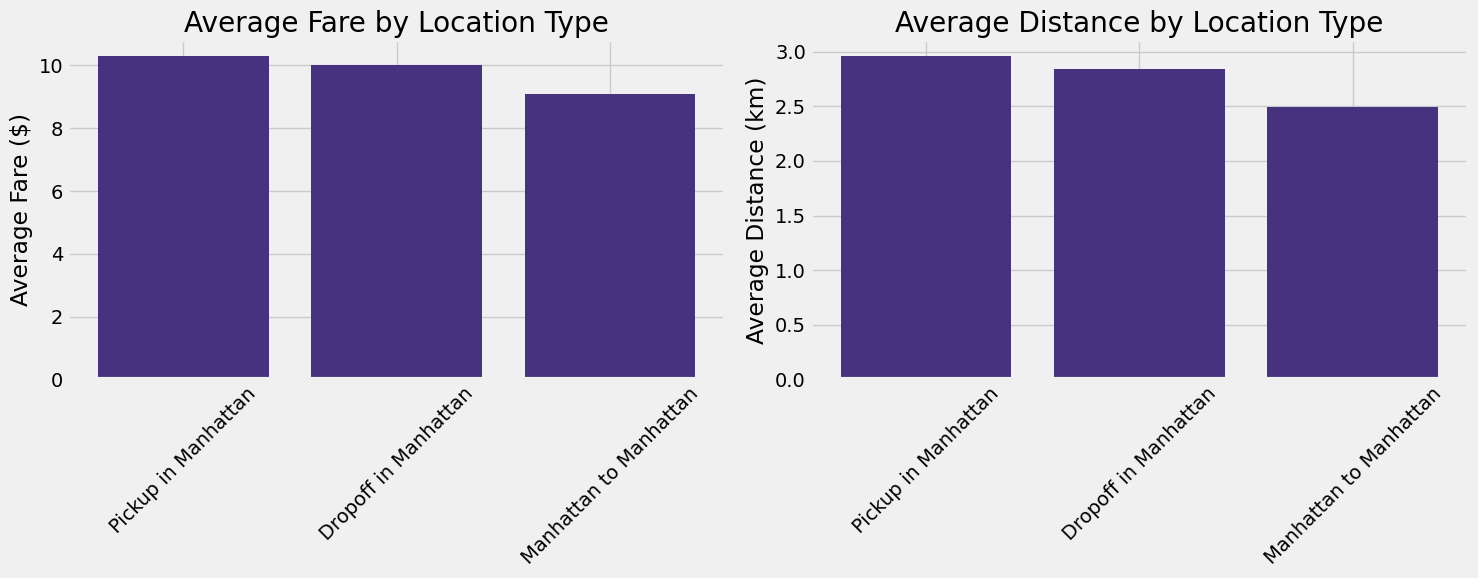

In [42]:
# Fare and distance by location type
plt.figure(figsize=(15, 6))

location_categories = ['pickup_in_manhattan', 'dropoff_in_manhattan', 'manhattan_to_manhattan']
location_labels = ['Pickup in Manhattan', 'Dropoff in Manhattan', 'Manhattan to Manhattan']

plt.subplot(1, 2, 1)
location_fares = [df_clean[df_clean[cat] == 1]['fare_amount'].mean() for cat in location_categories]
plt.bar(location_labels, location_fares)
plt.title('Average Fare by Location Type')
plt.ylabel('Average Fare ($)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
location_distances = [df_clean[df_clean[cat] == 1]['distance_km'].mean() for cat in location_categories]
plt.bar(location_labels, location_distances)
plt.title('Average Distance by Location Type')
plt.ylabel('Average Distance (km)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

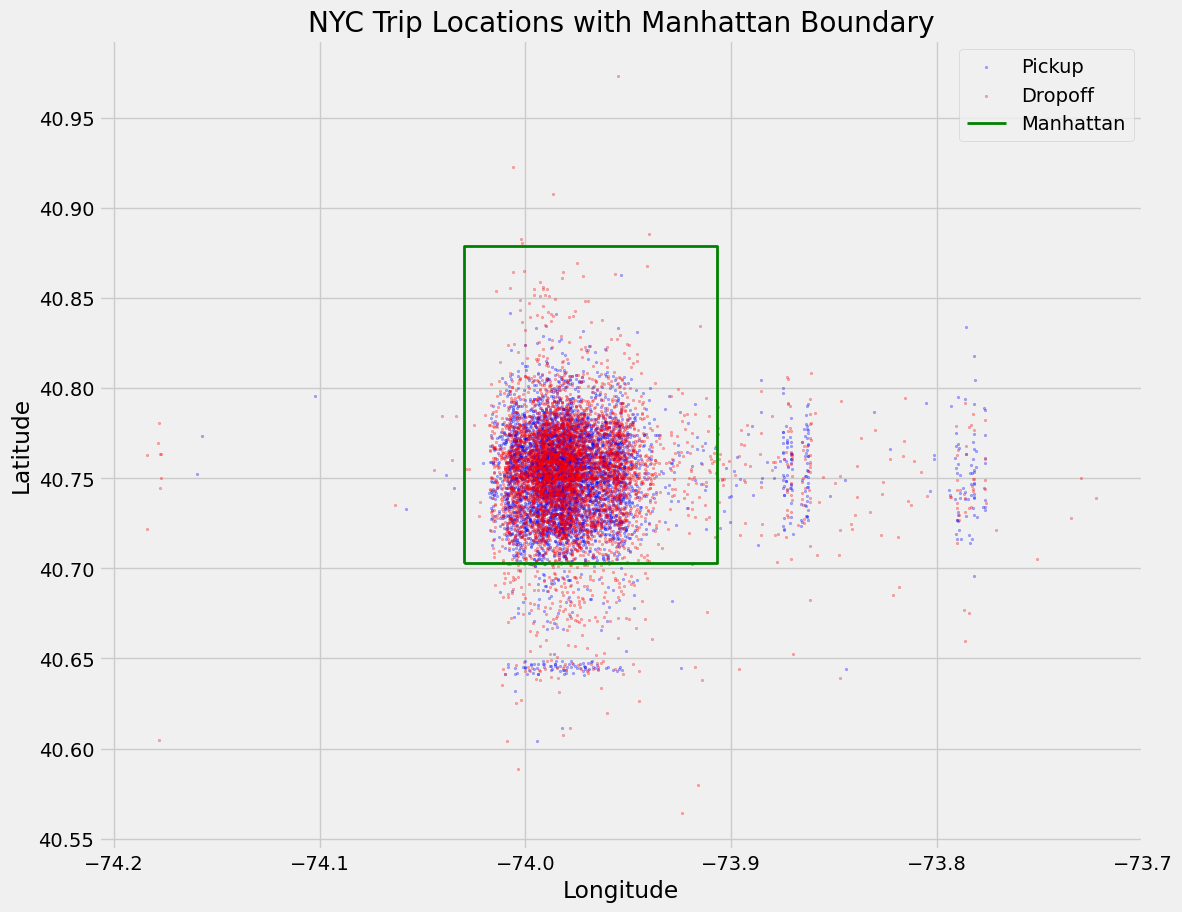

In [43]:
# Map visualization showing Manhattan boundaries
plt.figure(figsize=(12, 10))
plt.scatter(df_clean.sample(5000)['pickup_longitude'], df_clean.sample(5000)['pickup_latitude'],
            alpha=0.3, s=3, label='Pickup', c='blue')
plt.scatter(df_clean.sample(5000)['dropoff_longitude'], df_clean.sample(5000)['dropoff_latitude'],
            alpha=0.3, s=3, label='Dropoff', c='red')

# Draw Manhattan boundaries
manhattan_x = [manhattan_bounds['west'], manhattan_bounds['east'],
               manhattan_bounds['east'], manhattan_bounds['west'], manhattan_bounds['west']]
manhattan_y = [manhattan_bounds['south'], manhattan_bounds['south'],
               manhattan_bounds['north'], manhattan_bounds['north'], manhattan_bounds['south']]
plt.plot(manhattan_x, manhattan_y, 'g-', linewidth=2, label='Manhattan')

plt.title('NYC Trip Locations with Manhattan Boundary')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

### Trip characteristics and interaction features

In [44]:
# Trip type categorization
df_clean['is_long_trip'] = (df_clean['distance_km'] > 10).astype(int)
df_clean['is_short_trip'] = (df_clean['distance_km'] < 2).astype(int)
df_clean

fare_amount           pickup_datetime  pickup_longitude  \
0               7.5 2015-05-07 19:52:06+00:00        -73.999817   
1               7.7 2009-07-17 20:04:56+00:00        -73.994355   
2              12.9 2009-08-24 21:45:00+00:00        -74.005043   
3               5.3 2009-06-26 08:22:21+00:00        -73.976124   
4              16.0 2014-08-28 17:47:00+00:00        -73.925023   
...             ...                       ...               ...   
199995          3.0 2012-10-28 10:49:00+00:00        -73.987042   
199996          7.5 2014-03-14 01:09:00+00:00        -73.984722   
199997         30.9 2009-06-29 00:42:00+00:00        -73.986017   
199998         14.5 2015-05-20 14:56:25+00:00        -73.997124   
199999         14.1 2010-05-15 04:08:00+00:00        -73.984395   

        pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0             40.738354         -73.999512         40.723217                1   
1             40.728225         -73.994710         40.750325                1   
2             40.740770         -73.962565         40.772647                1   
3             40.790844         -73.965316         40.803349                3   
4             40.744085         -73.973082         40.761247                5   
...                 ...                ...               ...              ...   
199995        40.739367         -73.986525         40.740297                1   
199996        40.736837         -74.006672         40.739620                1   
199997        40.756487         -73.858957         40.692588                2   
199998        40.725452         -73.983215         40.695415                1   
199999        40.720077         -73.985508         40.768793                1   

       service_type  distance_km  manhattan_distance  ...  hour_cos  \
0              ride     1.683323            1.706116  ...  0.258819   
1              ride     2.457590            2.483275  ...  0.500000   
2              ride     5.036377            7.148977  ...  0.707107   
3              ride     1.661683            2.306735  ... -0.500000   
4              ride     4.475450            5.989997  ... -0.258819   
...             ...          ...                 ...  ...       ...   
199995         ride     0.112210            0.147175  ... -0.866025   
199996         ride     1.875050            2.174663  ...  0.965926   
199997         ride    12.850319           17.892889  ...  1.000000   
199998         ride     3.539715            4.516312  ... -0.866025   
199999         ride     5.417783            5.502081  ...  0.500000   

        is_rush_hour_morning  is_rush_hour_evening  is_night_time  \
0                          0                     1              0   
1                          0                     0              0   
2                          0                     0              0   
3                          1                     0              0   
4                          0                     1              0   
...                      ...                   ...            ...   
199995                     1                     0              0   
199996                     0                     0              1   
199997                     0                     0              1   
199998                     0                     0              0   
199999                     0                     0              1   

        is_business_hours  pickup_in_manhattan  dropoff_in_manhattan  \
0                       0                    1                     1   
1                       0                    1                     1   
2                       0                    1                     1   
3                       0                    1                     1   
4                       1                    1                     1   
...                   ...                  ...                   ...   
199995                  0                   

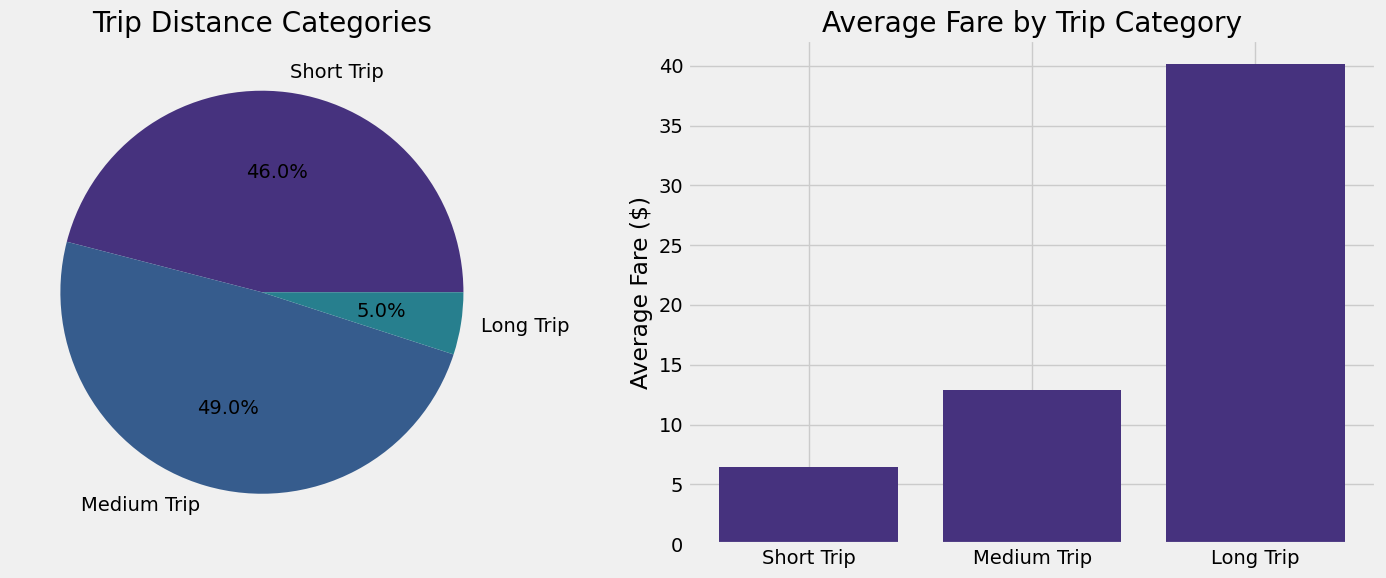

In [45]:
# Visualize these features
plt.figure(figsize=(15, 6))


# Trip length categorization
plt.subplot(1, 2, 1)
trip_categories = ['Short Trip', 'Medium Trip', 'Long Trip']
trip_counts = [
    df_clean['is_short_trip'].sum(),
    ((df_clean['is_short_trip'] == 0) & (df_clean['is_long_trip'] == 0)).sum(), # Ensure this condition produces a single numeric value
    df_clean['is_long_trip'].sum()
]
plt.pie(trip_counts, labels=trip_categories, autopct='%1.1f%%')
plt.title('Trip Distance Categories')

# Average fare by trip category
plt.subplot(1, 2, 2)
avg_fares = [
    df_clean[df_clean['is_short_trip'] == 1]['fare_amount'].mean(),
    df_clean[(df_clean['is_short_trip'] == 0) & (df_clean['is_long_trip'] == 0)]['fare_amount'].mean(),
    df_clean[df_clean['is_long_trip'] == 1]['fare_amount'].mean()
]
plt.bar(trip_categories, avg_fares)
plt.title('Average Fare by Trip Category')
plt.ylabel('Average Fare ($)')

plt.tight_layout()
plt.show()

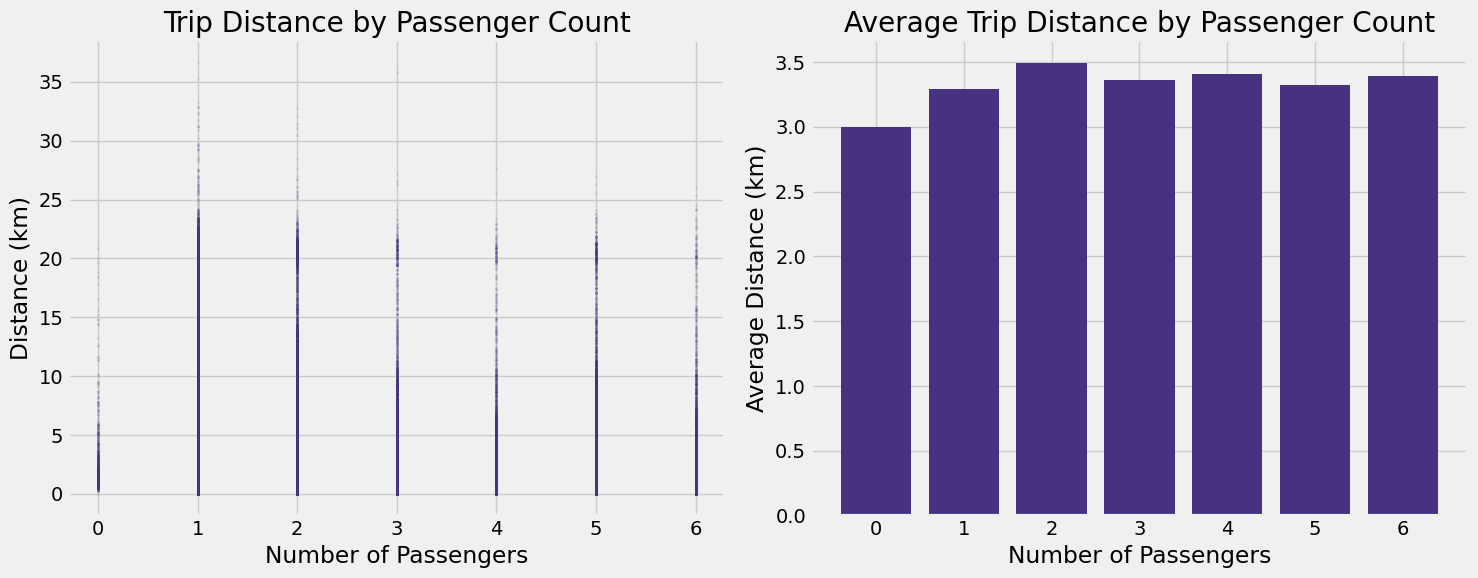

In [46]:
# Scatter plot of passengers vs distance
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(df_clean['passenger_count'], df_clean['distance_km'], alpha=0.1, s=2)
plt.title('Trip Distance by Passenger Count')
plt.xlabel('Number of Passengers')
plt.ylabel('Distance (km)')

plt.subplot(1, 2, 2)
avg_distance = df_clean.groupby('passenger_count')['distance_km'].mean()
plt.bar(avg_distance.index, avg_distance.values)
plt.title('Average Trip Distance by Passenger Count')
plt.xlabel('Number of Passengers')
plt.ylabel('Average Distance (km)')

plt.tight_layout()
plt.show()

### Coordinate clustering

In [47]:
# assign city for each trip
def assign_city(lat, lon):
    # Manhattan (famous for business, tourism)
    if 40.7 <= lat <= 40.88 and -74.02 <= lon <= -73.91:
        return 'Manhattan'
    # Long Island City (subset of Queens, famous for arts and proximity to Manhattan)
    elif 40.73 <= lat <= 40.76 and -73.96 <= lon <= -73.91:
        return 'Long Island City'
    # Brooklyn (famous for culture, nightlife)
    elif 40.57 <= lat <= 40.74 and -74.04 <= lon <= -73.83:
        return 'Brooklyn'
    # Queens (includes JFK, LaGuardia)
    elif 40.54 <= lat <= 40.8 and -73.96 <= lon <= -73.7:
        return 'Queens'
    # Bronx
    elif 40.79 <= lat <= 40.92 and -73.93 <= lon <= -73.76:
        return 'Bronx'
    # Staten Island
    elif 40.49 <= lat <= 40.65 and -74.26 <= lon <= -74.05:
        return 'Staten Island'
    # Jersey City (famous for commuters, skyline views)
    elif 40.69 <= lat <= 40.75 and -74.12 <= lon <= -74.03:
        return 'Jersey City'
    # Hoboken (famous for nightlife, proximity to Manhattan)
    elif 40.73 <= lat <= 40.76 and -74.04 <= lon <= -73.99:
        return 'Hoboken'
    # Newark (includes Newark Airport)
    elif 40.65 <= lat <= 40.78 and -74.25 <= lon <= -74.11:
        return 'Newark'
    # Yonkers
    elif 40.91 <= lat <= 40.98 and -73.91 <= lon <= -73.83:
        return 'Yonkers'
    else:
        return 'Other'

In [48]:
# Apply to pickup and dropoff locations
df_clean['pickup_city'] = df_clean.apply(lambda row: assign_city(row['pickup_latitude'], row['pickup_longitude']), axis=1)
df_clean['dropoff_city'] = df_clean.apply(lambda row: assign_city(row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

# Create city-to-city indicator
df_clean['is_city_to_city'] = (df_clean['pickup_city'] != df_clean['dropoff_city']).astype(int)

# Popular Locations (Hotspots) - Top 3 Pickup & Dropoff
top_pickups = df_clean['pickup_city'].value_counts().nlargest(3).index
top_dropoffs = df_clean['dropoff_city'].value_counts().nlargest(3).index
df_clean['pickup_hotspot'] = df_clean['pickup_city'].isin(top_pickups).astype(int)
df_clean['dropoff_hotspot'] = df_clean['dropoff_city'].isin(top_dropoffs).astype(int)

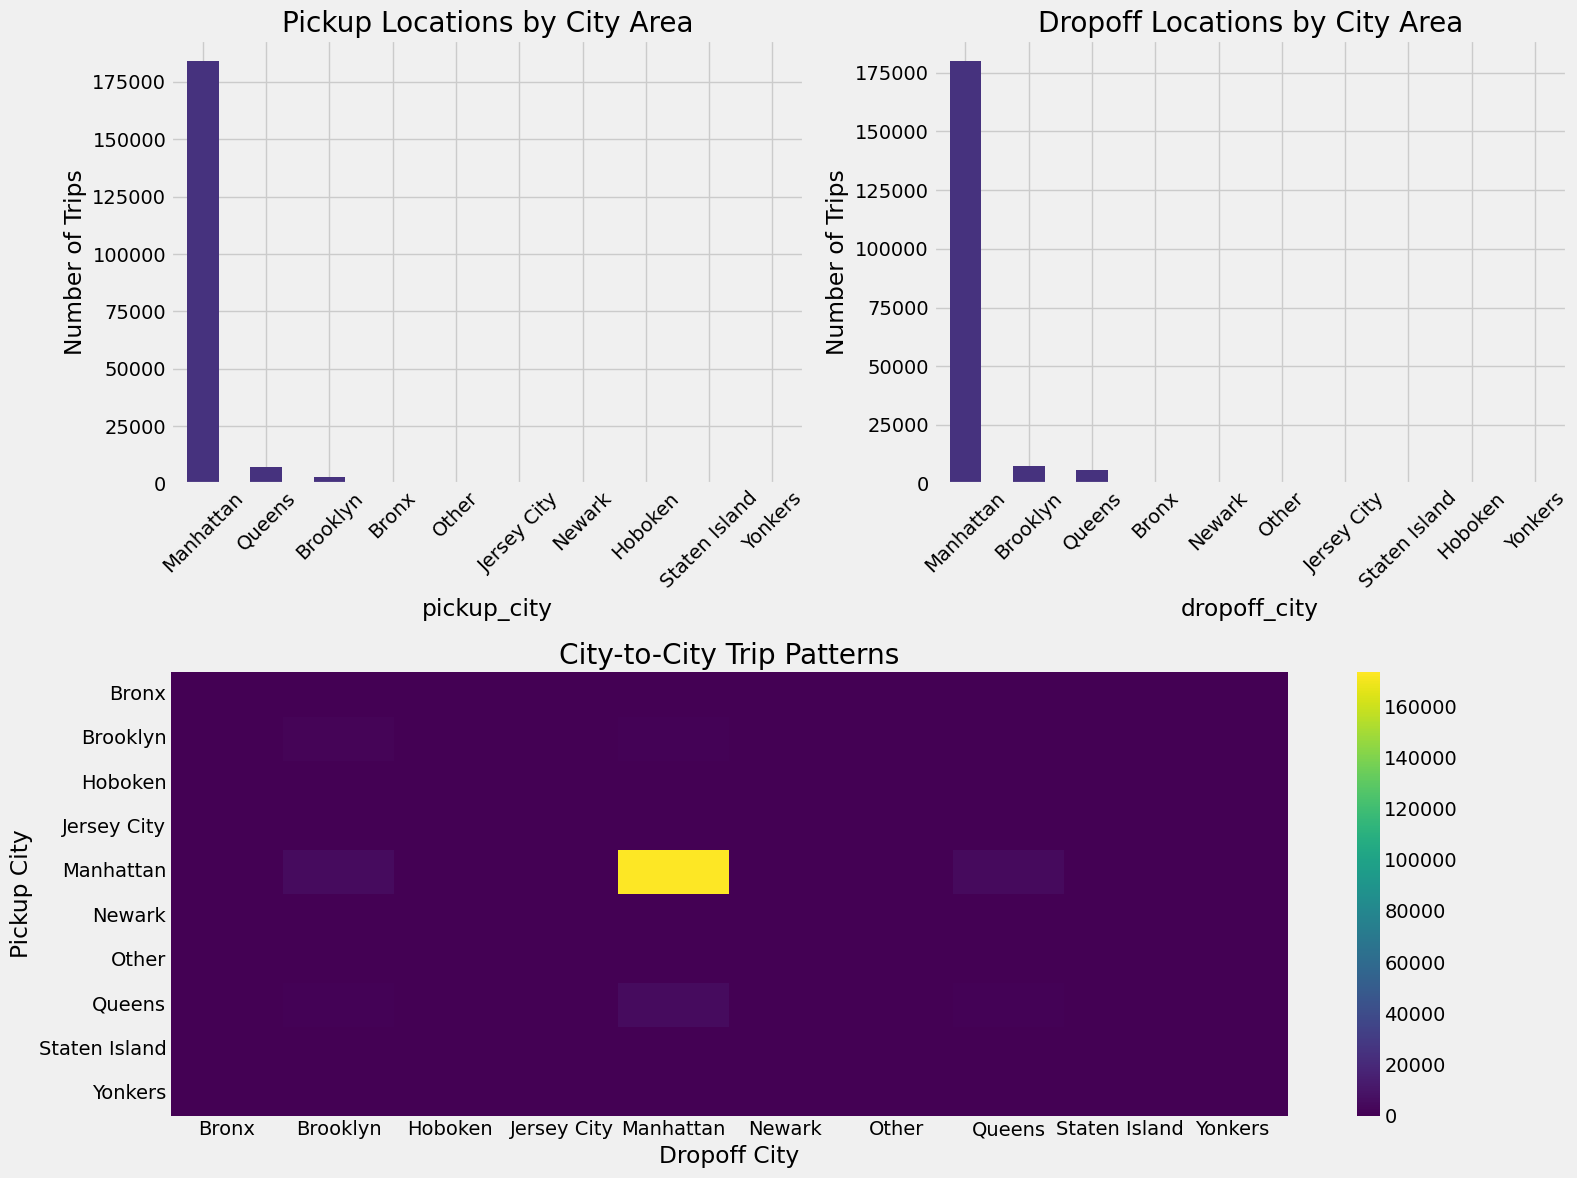

In [49]:
# Visualize clustering results
plt.figure(figsize=(16, 12))

# Pickup city distribution
plt.subplot(2, 2, 1)
pickup_city_counts = df_clean['pickup_city'].value_counts()
pickup_city_counts.plot(kind='bar')
plt.title('Pickup Locations by City Area')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)

# Dropoff city distribution
plt.subplot(2, 2, 2)
dropoff_city_counts = df_clean['dropoff_city'].value_counts()
dropoff_city_counts.plot(kind='bar')
plt.title('Dropoff Locations by City Area')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)

# Heatmap of city-to-city trips
plt.subplot(2, 1, 2)
city_matrix = pd.crosstab(df_clean['pickup_city'], df_clean['dropoff_city'])
sns.heatmap(city_matrix, cmap='viridis', annot=False)
plt.title('City-to-City Trip Patterns')
plt.xlabel('Dropoff City')
plt.ylabel('Pickup City')

plt.tight_layout()
plt.show()

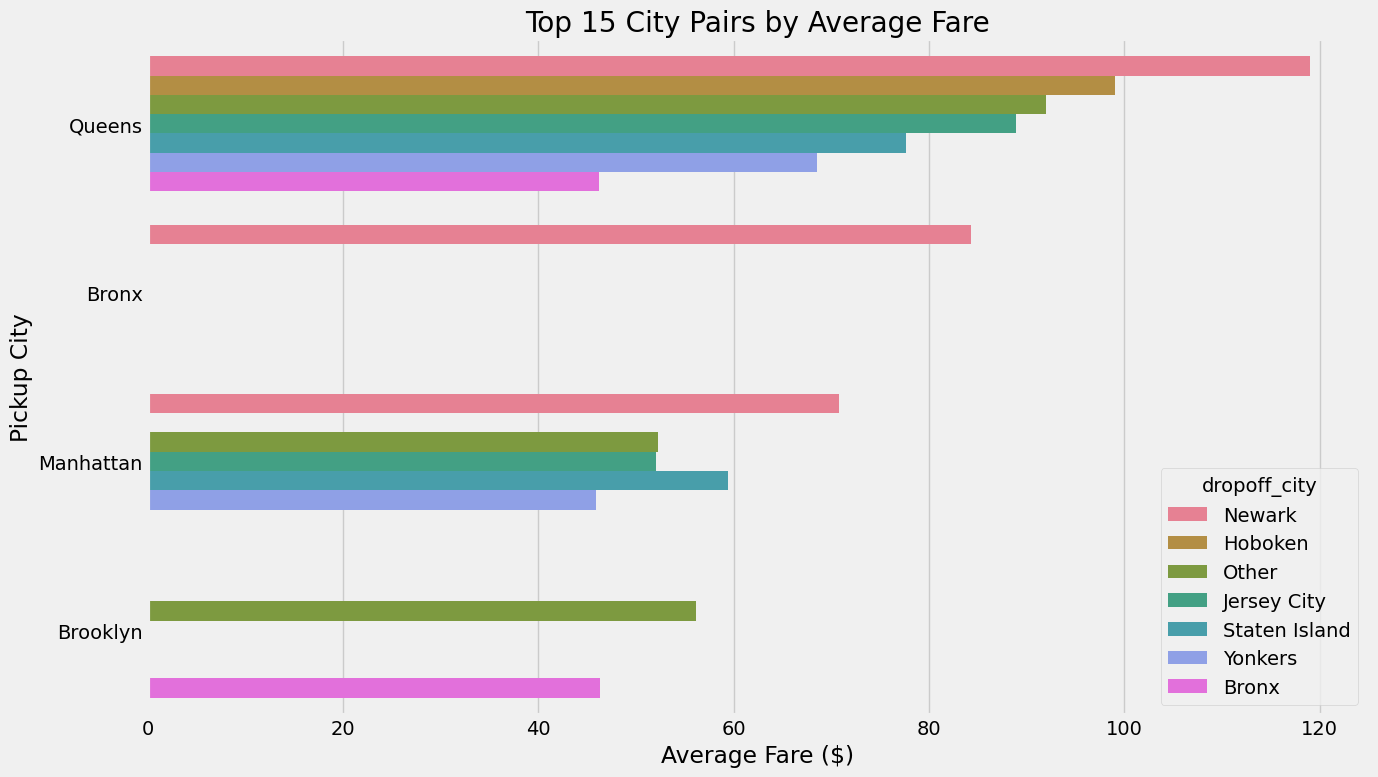

In [50]:
# Average fare by city pairs
plt.figure(figsize=(14, 8))
city_fare = df_clean.groupby(['pickup_city', 'dropoff_city'])['fare_amount'].mean().reset_index()
city_fare = city_fare.sort_values('fare_amount', ascending=False).head(15)

sns.barplot(x='fare_amount', y='pickup_city', hue='dropoff_city', data=city_fare)
plt.title('Top 15 City Pairs by Average Fare')
plt.xlabel('Average Fare ($)')
plt.ylabel('Pickup City')
plt.tight_layout()
plt.show()

### User behavior features

In [51]:
# User behavior features
df_clean['is_solo'] = (df_clean['passenger_count'] == 1).astype(int)
df_clean['is_group_trip'] = (df_clean['passenger_count'] > 1).astype(int)

# More granularity with passenger count
df_clean['passenger_group'] = pd.cut(
    df_clean['passenger_count'],
    bins=[0, 1, 2, 4, 7],
    labels=['Solo', 'Couple', 'Small Group', 'Large Group']
)
df_clean

fare_amount           pickup_datetime  pickup_longitude  \
0               7.5 2015-05-07 19:52:06+00:00        -73.999817   
1               7.7 2009-07-17 20:04:56+00:00        -73.994355   
2              12.9 2009-08-24 21:45:00+00:00        -74.005043   
3               5.3 2009-06-26 08:22:21+00:00        -73.976124   
4              16.0 2014-08-28 17:47:00+00:00        -73.925023   
...             ...                       ...               ...   
199995          3.0 2012-10-28 10:49:00+00:00        -73.987042   
199996          7.5 2014-03-14 01:09:00+00:00        -73.984722   
199997         30.9 2009-06-29 00:42:00+00:00        -73.986017   
199998         14.5 2015-05-20 14:56:25+00:00        -73.997124   
199999         14.1 2010-05-15 04:08:00+00:00        -73.984395   

        pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0             40.738354         -73.999512         40.723217                1   
1             40.728225         -73.994710         40.750325                1   
2             40.740770         -73.962565         40.772647                1   
3             40.790844         -73.965316         40.803349                3   
4             40.744085         -73.973082         40.761247                5   
...                 ...                ...               ...              ...   
199995        40.739367         -73.986525         40.740297                1   
199996        40.736837         -74.006672         40.739620                1   
199997        40.756487         -73.858957         40.692588                2   
199998        40.725452         -73.983215         40.695415                1   
199999        40.720077         -73.985508         40.768793                1   

       service_type  distance_km  manhattan_distance  ... is_long_trip  \
0              ride     1.683323            1.706116  ...            0   
1              ride     2.457590            2.483275  ...            0   
2              ride     5.036377            7.148977  ...            0   
3              ride     1.661683            2.306735  ...            0   
4              ride     4.475450            5.989997  ...            0   
...             ...          ...                 ...  ...          ...   
199995         ride     0.112210            0.147175  ...            0   
199996         ride     1.875050            2.174663  ...            0   
199997         ride    12.850319           17.892889  ...            1   
199998         ride     3.539715            4.516312  ...            0   
199999         ride     5.417783            5.502081  ...            0   

        is_short_trip  pickup_city  dropoff_city  is_city_to_city  \
0                   1    Manhattan     Manhattan                0   
1                   0    Manhattan     Manhattan                0   
2                   0    Manhattan     Manhattan                0   
3                   1    Manhattan     Manhattan                0   
4                   0    Manhattan     Manhattan                0   
...               ...          ...           ...              ...   
199995              1    Manhattan     Manhattan                0   
199996              1    Manhattan     Manhattan                0   
199997              0    Manhattan      Brooklyn                1   
199998              0    Manhattan      Brooklyn                1   
199999              0    Manhattan     Manhattan                0   

        pickup_hotspot  dropoff_hotspot  is_solo  is_group_trip  \
0                    1                1        1              0   
1                    1                1        1              0   
2                    1                1        1              0   
3                    1                1        0              1   
4                    1                1        0              1   
...                ...              ...      ...            ...   
199995               1                1    

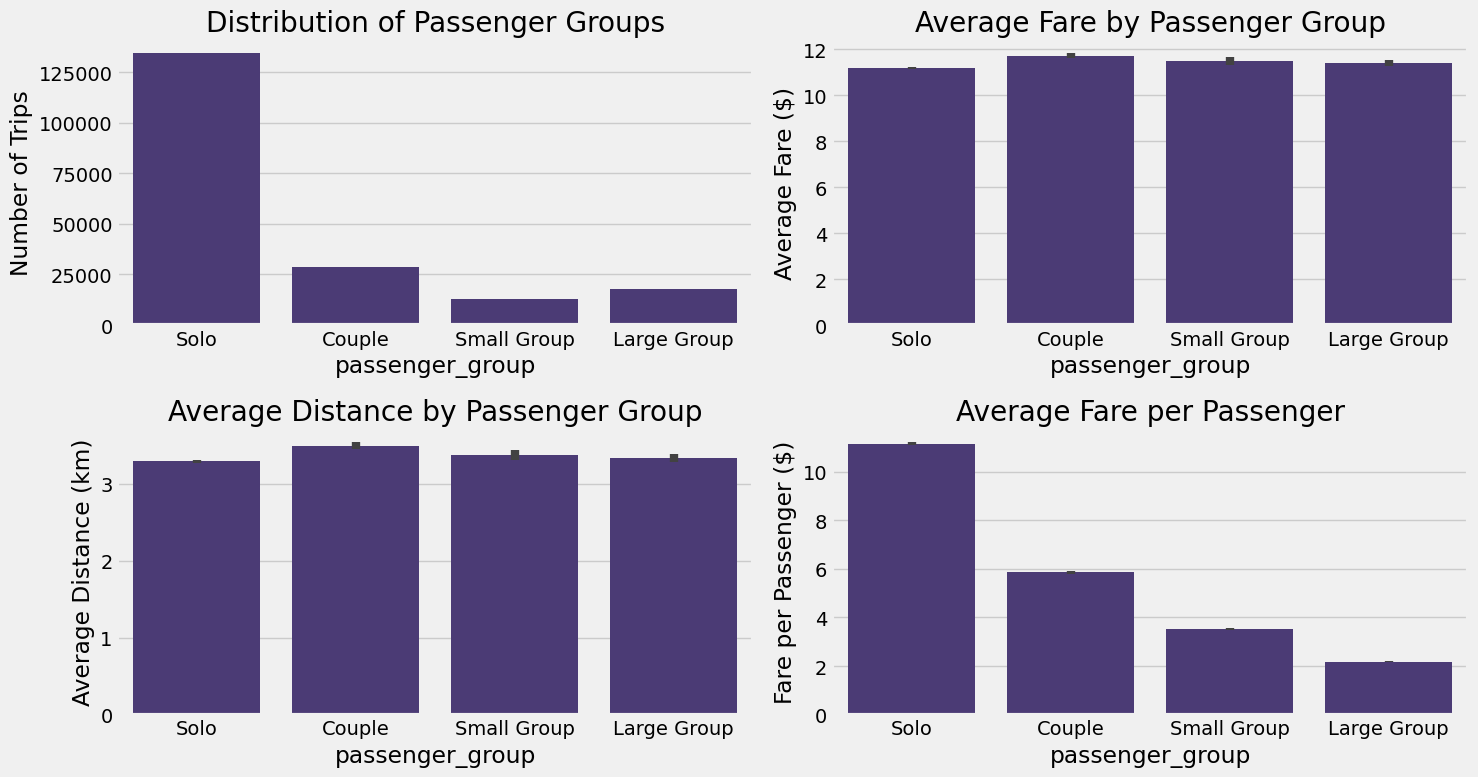

In [52]:
# Visualize user behavior patterns
plt.figure(figsize=(15, 8))

# Distribution of passenger groups
plt.subplot(2, 2, 1)
sns.countplot(x='passenger_group', data=df_clean)
plt.title('Distribution of Passenger Groups')
plt.ylabel('Number of Trips')

# Average fare by passenger group
plt.subplot(2, 2, 2)
sns.barplot(x='passenger_group', y='fare_amount', data=df_clean)
plt.title('Average Fare by Passenger Group')
plt.ylabel('Average Fare ($)')

# Average distance by passenger group
plt.subplot(2, 2, 3)
sns.barplot(x='passenger_group', y='distance_km', data=df_clean)
plt.title('Average Distance by Passenger Group')
plt.ylabel('Average Distance (km)')

# Average fare per passenger by passenger group
plt.subplot(2, 2, 4)
fare_per_passenger = df_clean.copy()
fare_per_passenger['fare_per_passenger'] = fare_per_passenger['fare_amount'] / fare_per_passenger['passenger_count']
sns.barplot(x='passenger_group', y='fare_per_passenger', data=fare_per_passenger)
plt.title('Average Fare per Passenger')
plt.ylabel('Fare per Passenger ($)')

plt.tight_layout()
plt.show()

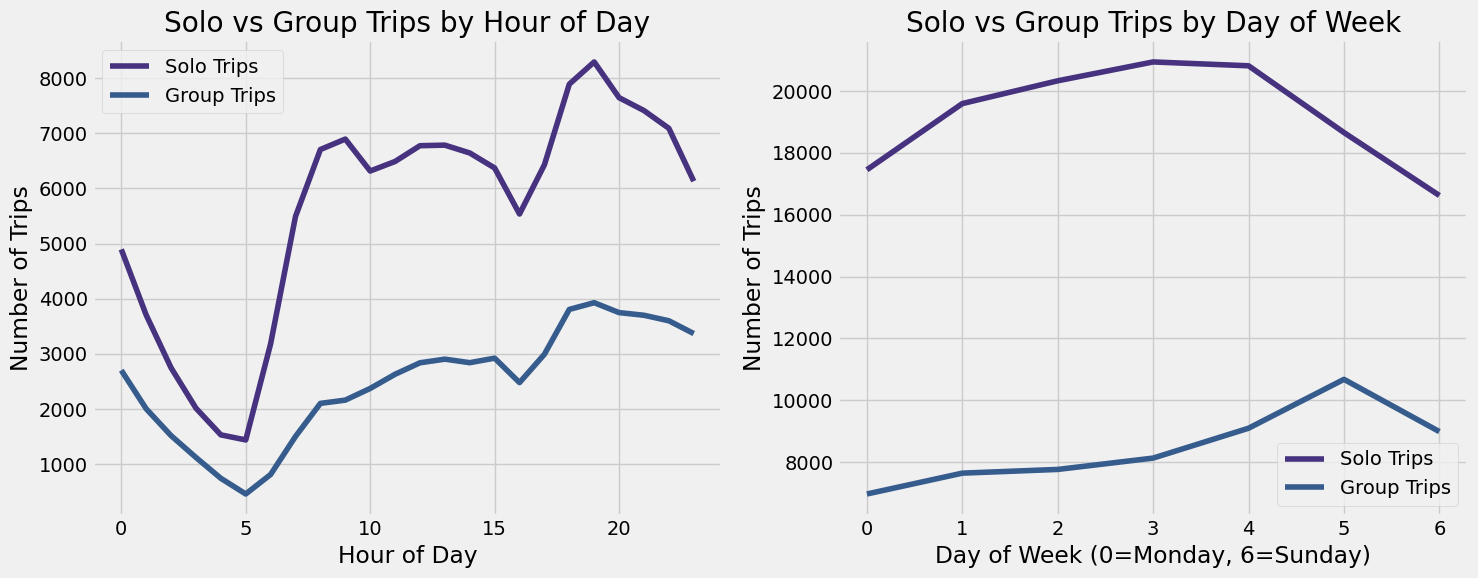

In [53]:
# More insights on user behavior
plt.figure(figsize=(15, 6))

# Solo vs group trips by hour of day
plt.subplot(1, 2, 1)
hour_solo = df_clean[df_clean['is_solo'] == 1].groupby('hour').size()
hour_group = df_clean[df_clean['is_group_trip'] == 1].groupby('hour').size()
plt.plot(hour_solo.index, hour_solo.values, label='Solo Trips')
plt.plot(hour_group.index, hour_group.values, label='Group Trips')
plt.title('Solo vs Group Trips by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.legend()
plt.grid(True)

# Solo vs group trips by day of week
plt.subplot(1, 2, 2)
day_solo = df_clean[df_clean['is_solo'] == 1].groupby('day_of_week').size()
day_group = df_clean[df_clean['is_group_trip'] == 1].groupby('day_of_week').size()
plt.plot(day_solo.index, day_solo.values, label='Solo Trips')
plt.plot(day_group.index, day_group.values, label='Group Trips')
plt.title('Solo vs Group Trips by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Trips')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Final preprocessed dataset shape: (194397, 36)
Number of features created: 27

New features created:
- completion
- day
- day_of_week
- distance_km
- dropoff_city
- dropoff_hotspot
- dropoff_in_manhattan
- hour
- hour_cos
- hour_sin
- is_business_hours
- is_city_to_city
- is_group_trip
- is_long_trip
- is_night_time
- is_rush_hour_evening
- is_rush_hour_morning
- is_short_trip
- is_solo
- is_weekend
- manhattan_distance
- manhattan_to_manhattan
- month
- passenger_group
- pickup_city
- pickup_hotspot
- pickup_in_manhattan
- service_type
- year


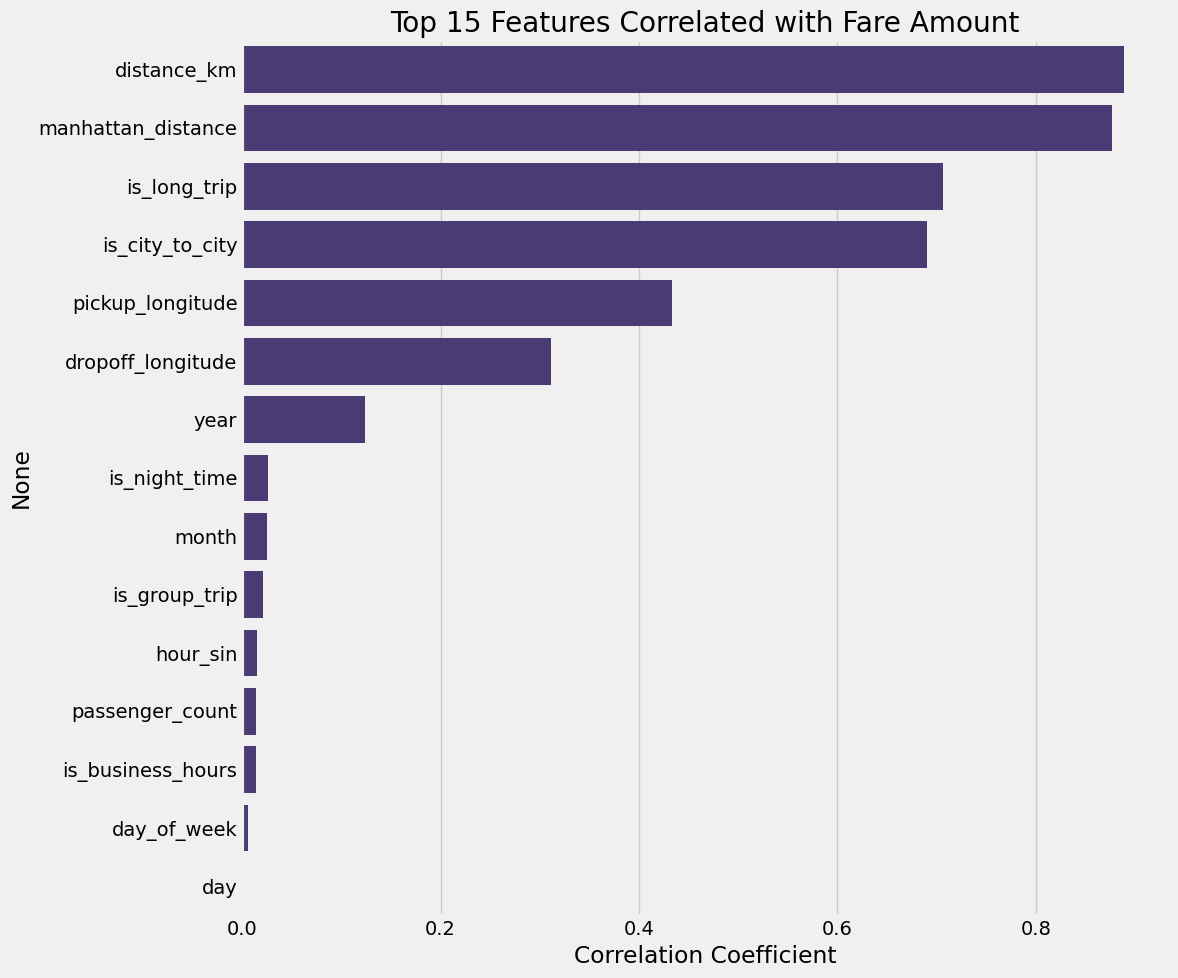

In [54]:
# Summary of final preprocessed data
print(f"Final preprocessed dataset shape: {df_clean.shape}")
print(f"Number of features created: {len(df_clean.columns) - len(df.columns)}")

# List of all created features
original_features = set(df.columns)
new_features = set(df_clean.columns) - original_features
print("\nNew features created:")
for feature in sorted(new_features):
    print(f"- {feature}")

# Correlation with fare amount
plt.figure(figsize=(12, 10))
numeric_columns = df_clean.select_dtypes(include=['number']).columns
correlation = df_clean[numeric_columns].corr()['fare_amount'].sort_values(ascending=False)
correlation = correlation[correlation.index != 'fare_amount']  # Remove self-correlation
correlation = correlation.head(15)  # Top 15 correlations

sns.barplot(x=correlation.values, y=correlation.index)
plt.title('Top 15 Features Correlated with Fare Amount')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

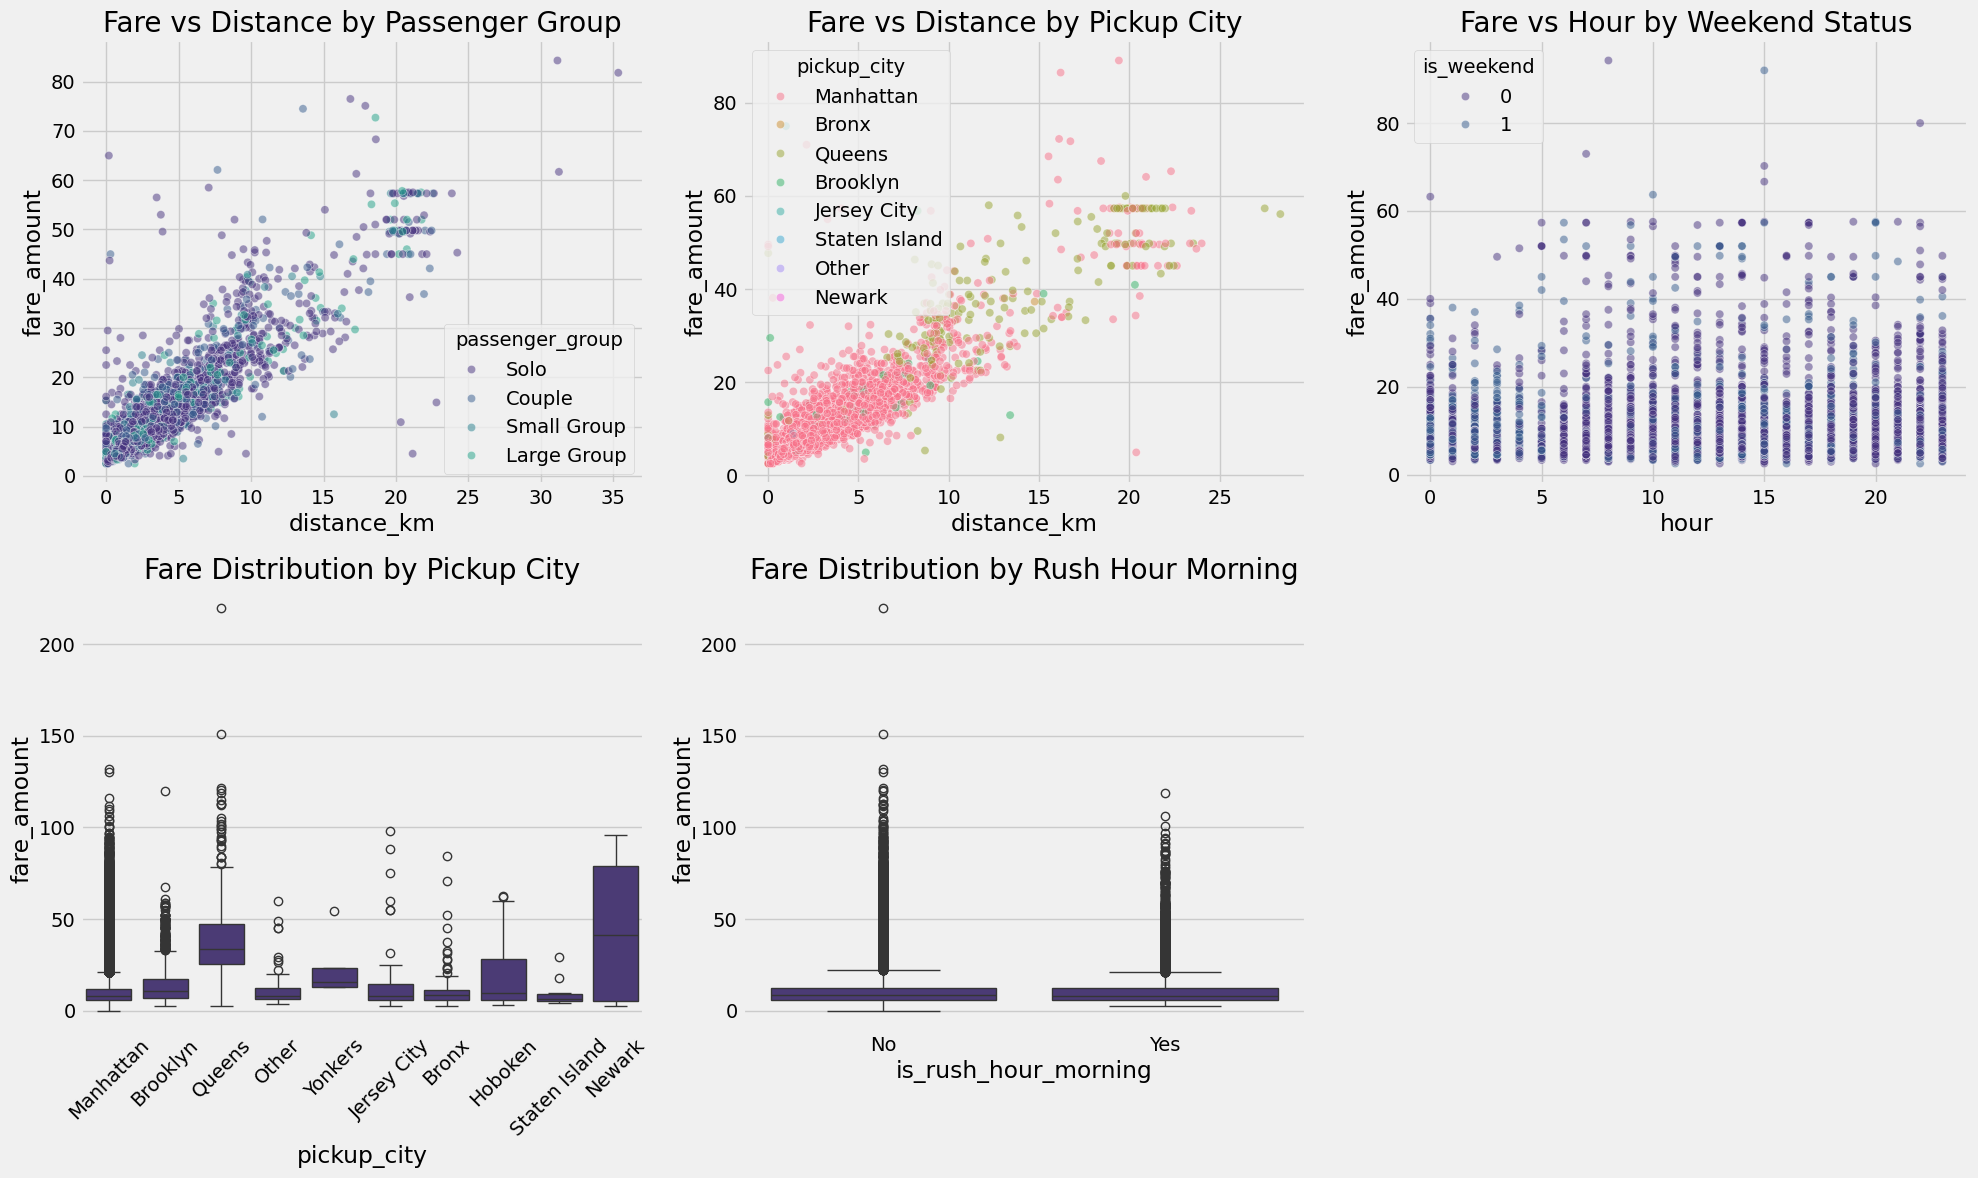

In [55]:
# Interactive scatter plot comparing different features
plt.figure(figsize=(20, 12))

plt.subplot(2, 3, 1)
sns.scatterplot(data=df_clean.sample(5000), x='distance_km', y='fare_amount',
                hue='passenger_group', alpha=0.5)
plt.title('Fare vs Distance by Passenger Group')

plt.subplot(2, 3, 2)
sns.scatterplot(data=df_clean.sample(5000), x='distance_km', y='fare_amount',
                hue='pickup_city', alpha=0.5)
plt.title('Fare vs Distance by Pickup City')

plt.subplot(2, 3, 3)
sns.scatterplot(data=df_clean.sample(5000), x='hour', y='fare_amount',
                hue='is_weekend', alpha=0.5)
plt.title('Fare vs Hour by Weekend Status')

plt.subplot(2, 3, 4)
sns.boxplot(data=df_clean, x='pickup_city', y='fare_amount')
plt.title('Fare Distribution by Pickup City')
plt.xticks(rotation=45)

plt.subplot(2, 3, 5)
sns.boxplot(data=df_clean, x='is_rush_hour_morning', y='fare_amount')
plt.title('Fare Distribution by Rush Hour Morning')
plt.xticks([0, 1], ['No', 'Yes'])


plt.tight_layout()
plt.show()

## More Investigation

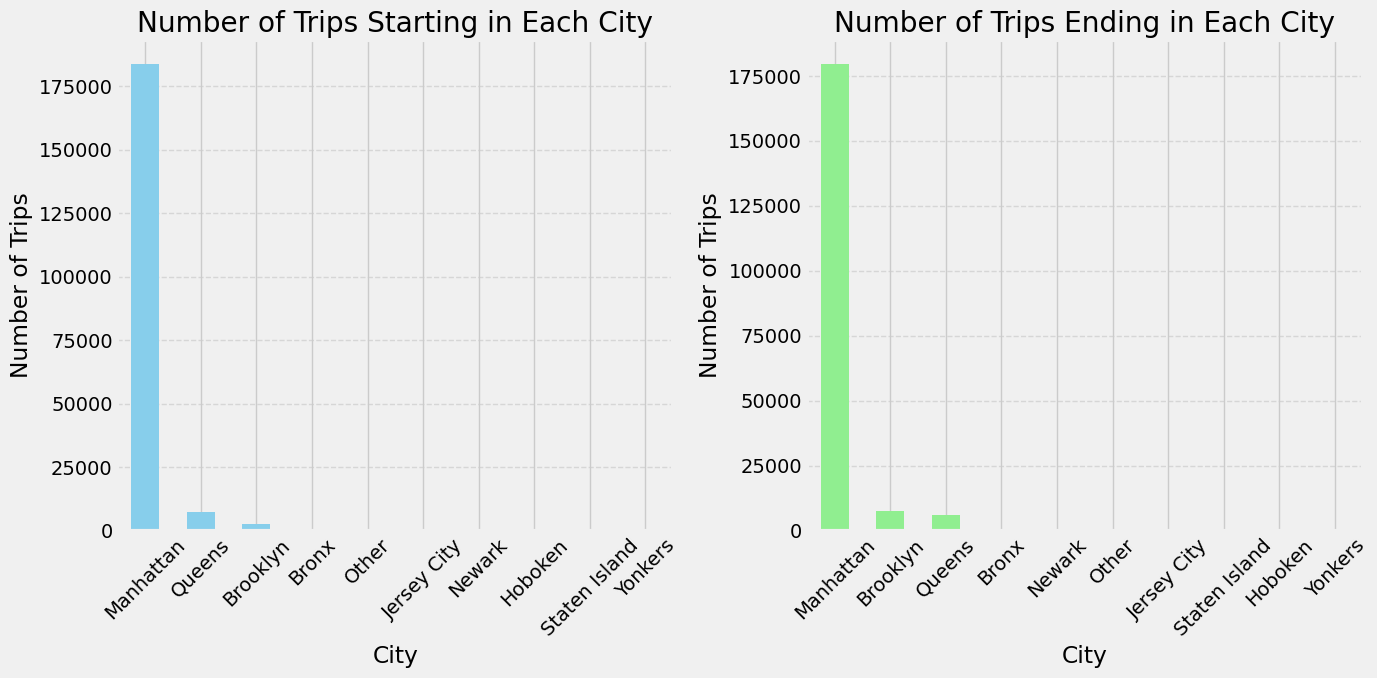

In [56]:
# Count trips in each city (pickup and dropoff)
plt.figure(figsize=(14, 7))

# Number of trips by pickup city
plt.subplot(1, 2, 1)
pickup_counts = df_clean['pickup_city'].value_counts()
pickup_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Trips Starting in Each City')
plt.xlabel('City')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Number of trips by dropoff city
plt.subplot(1, 2, 2)
dropoff_counts = df_clean['dropoff_city'].value_counts()
dropoff_counts.plot(kind='bar', color='lightgreen')
plt.title('Number of Trips Ending in Each City')
plt.xlabel('City')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

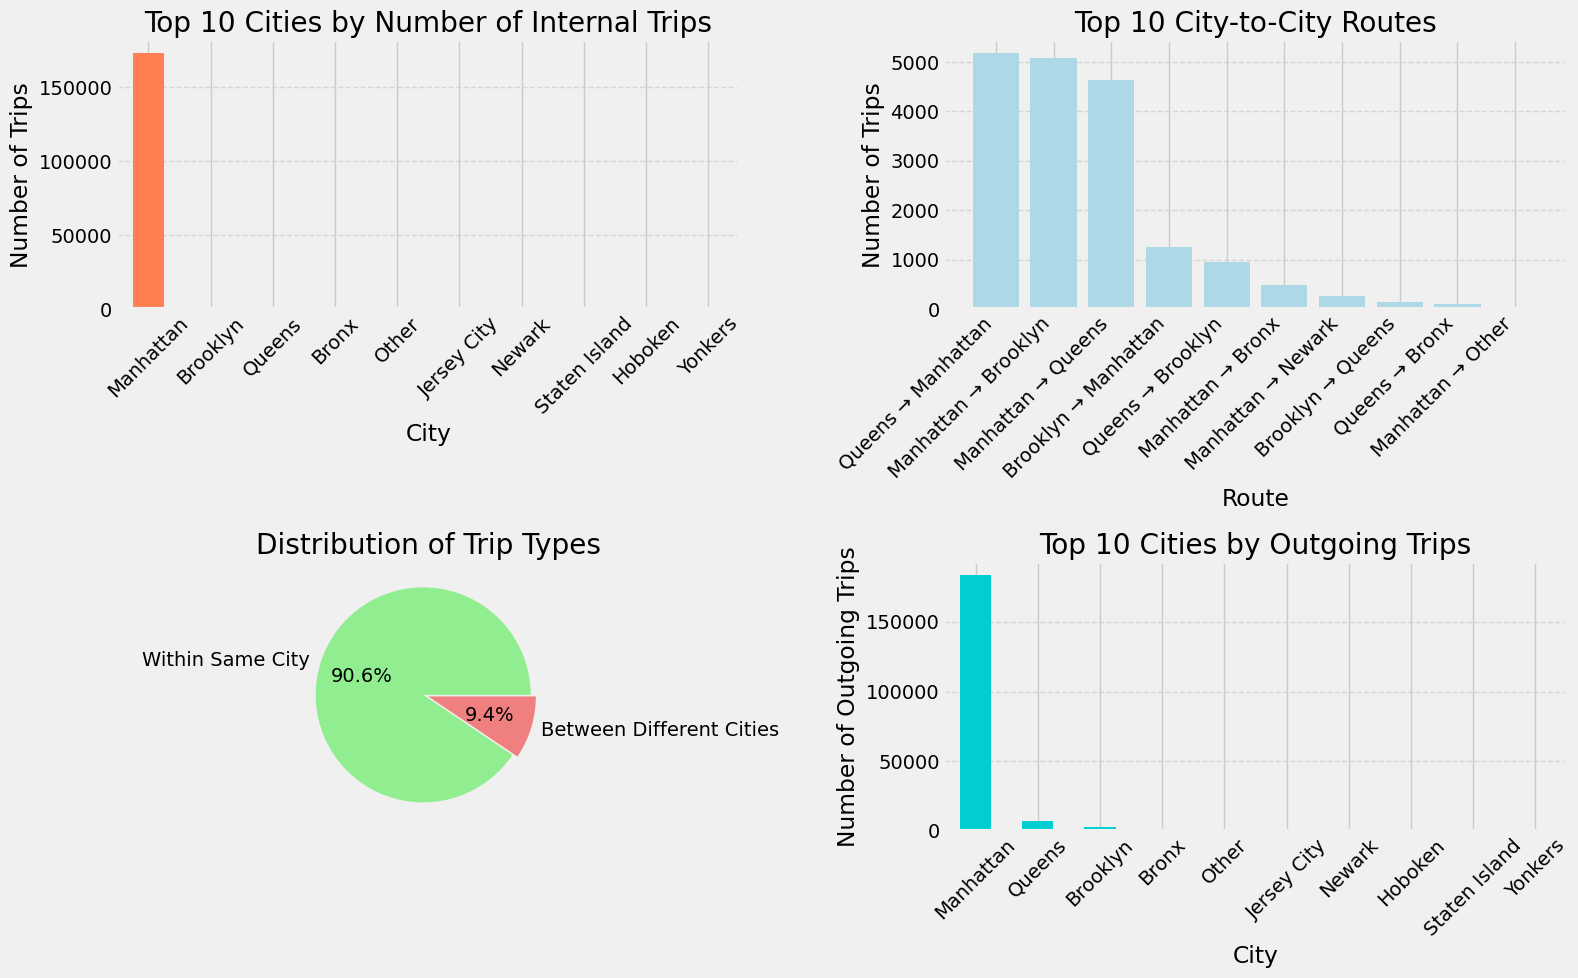

In [57]:
# Analyze trips between cities and within the same city
plt.figure(figsize=(16, 10))

# Create a DataFrame with city-to-city trip counts
city_to_city_counts = pd.crosstab(df_clean['pickup_city'], df_clean['dropoff_city'])

# Extract counts for trips within the same city (diagonal values)
same_city_counts = pd.Series({city: city_to_city_counts.loc[city, city]
                             for city in city_to_city_counts.index
                             if city in city_to_city_counts.columns})

# Top 10 cities by number of internal trips
top_internal = same_city_counts.sort_values(ascending=False).head(10)
plt.subplot(2, 2, 1)
top_internal.plot(kind='bar', color='coral')
plt.title('Top 10 Cities by Number of Internal Trips')
plt.xlabel('City')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Top 10 city-to-city routes
city_pairs = []
for pickup in city_to_city_counts.index:
    for dropoff in city_to_city_counts.columns:
        if pickup != dropoff:  # Exclude same-city trips
            city_pairs.append((pickup, dropoff, city_to_city_counts.loc[pickup, dropoff]))

# Sort by count and get top 10
top_routes = sorted(city_pairs, key=lambda x: x[2], reverse=True)[:10]
route_names = [f"{p} → {d}" for p, d, _ in top_routes]
route_counts = [count for _, _, count in top_routes]

plt.subplot(2, 2, 2)
plt.bar(range(len(route_names)), route_counts, color='lightblue')
plt.xticks(range(len(route_names)), route_names, rotation=45, ha='right')
plt.title('Top 10 City-to-City Routes')
plt.xlabel('Route')
plt.ylabel('Number of Trips')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Analyze percentage of trips that stay within the same city
same_city_trip_count = sum(same_city_counts)
total_trip_count = df_clean.shape[0]
diff_city_trip_count = total_trip_count - same_city_trip_count

plt.subplot(2, 2, 3)
plt.pie([same_city_trip_count, diff_city_trip_count],
        labels=['Within Same City', 'Between Different Cities'],
        autopct='%1.1f%%',
        colors=['lightgreen', 'lightcoral'],
        explode=(0.05, 0))
plt.title('Distribution of Trip Types')

# Calculate the total outgoing trips from each city
outgoing_trips = city_to_city_counts.sum(axis=1).sort_values(ascending=False).head(10)

plt.subplot(2, 2, 4)
outgoing_trips.plot(kind='bar', color='darkturquoise')
plt.title('Top 10 Cities by Outgoing Trips')
plt.xlabel('City')
plt.ylabel('Number of Outgoing Trips')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

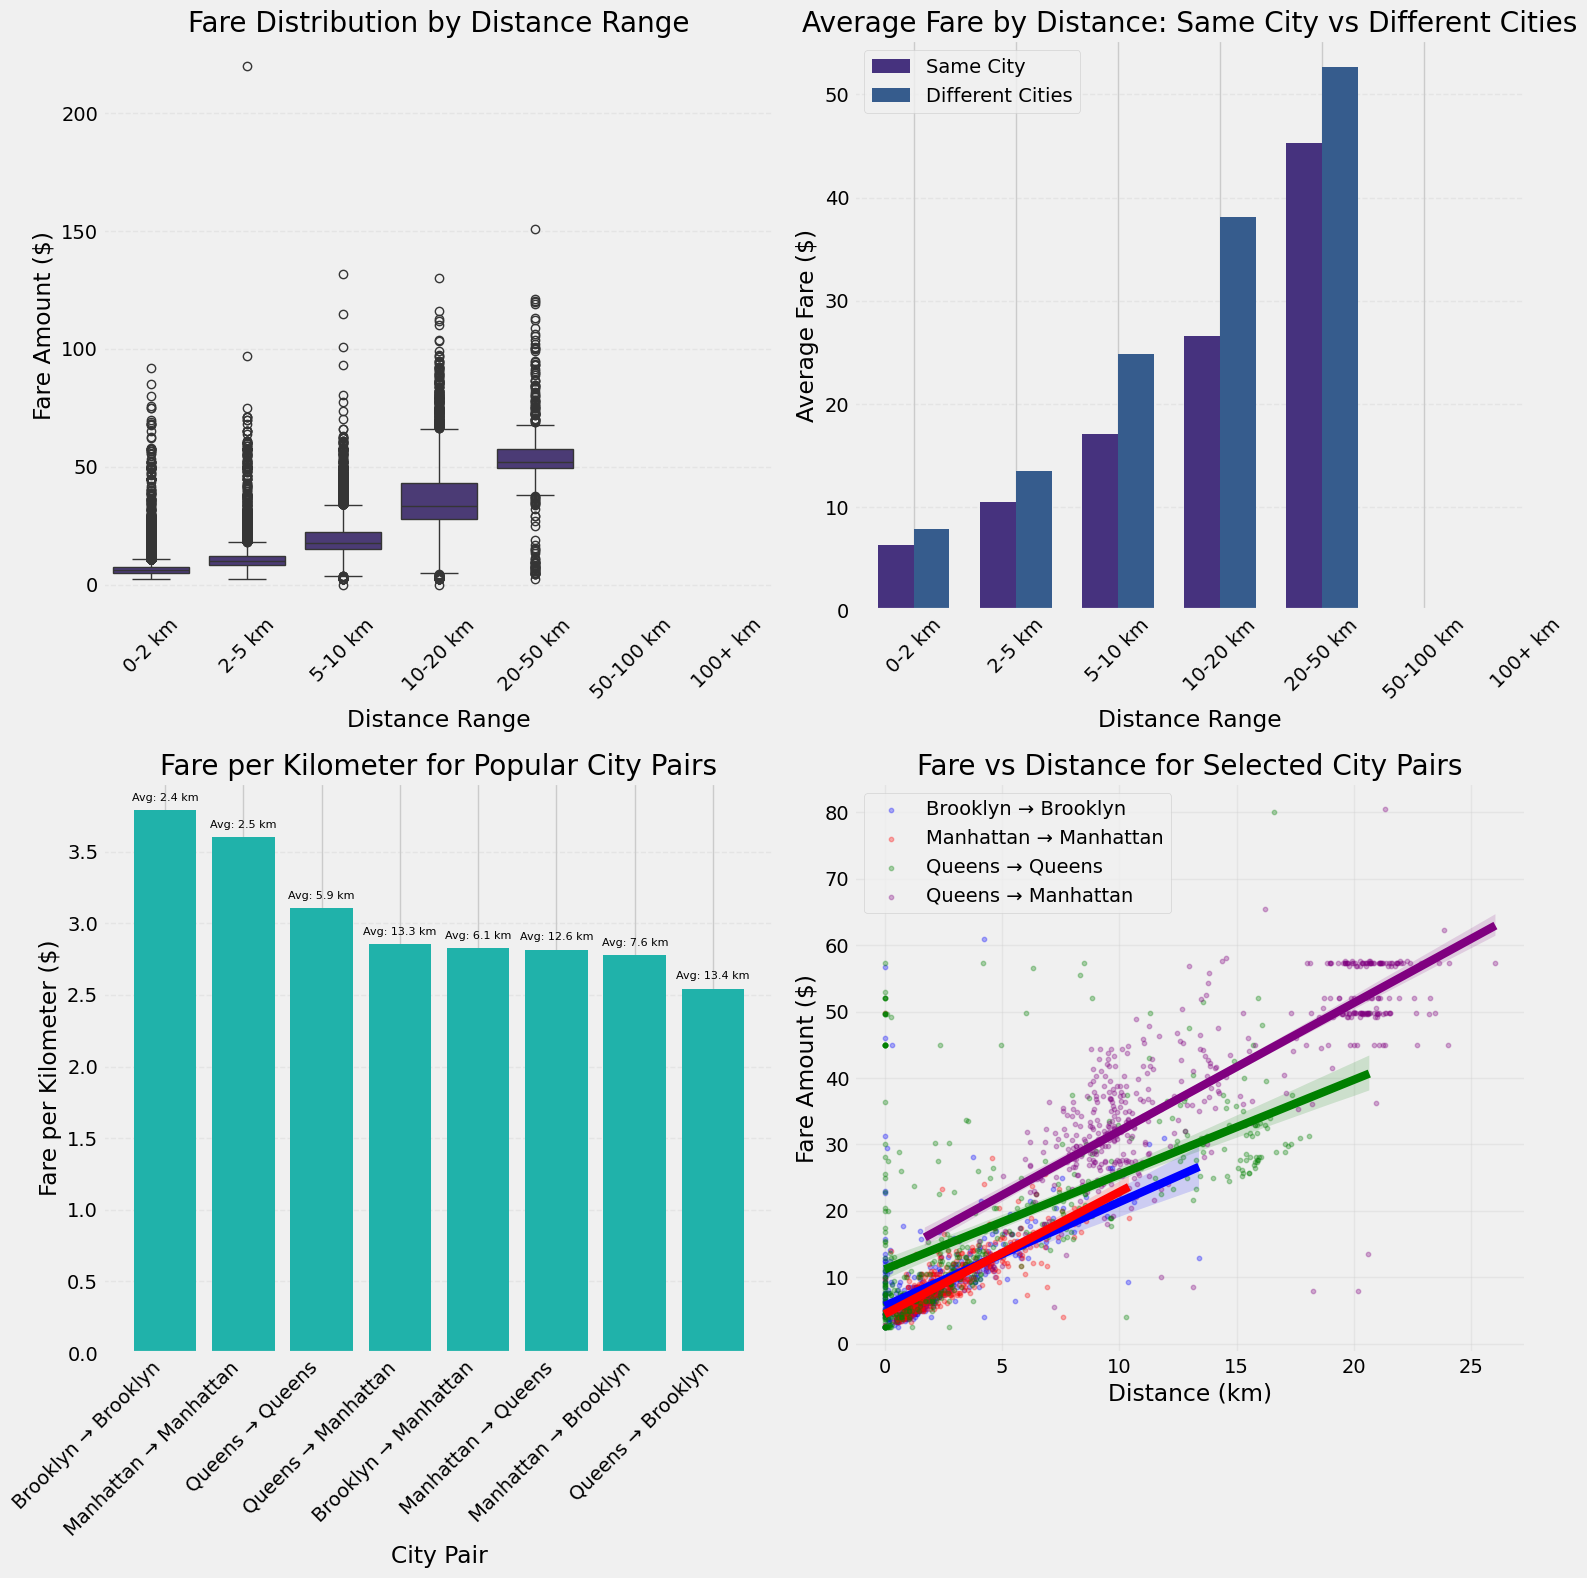

In [58]:
# Investigate fare amounts for similar distances across different city combinations
plt.figure(figsize=(16, 16))

# Create distance bins for analysis
df_clean['distance_bin'] = pd.cut(df_clean['distance_km'],
                                  bins=[0, 2, 5, 10, 20, 50, 100, np.inf],
                                  labels=['0-2 km', '2-5 km', '5-10 km', '10-20 km',
                                          '20-50 km', '50-100 km', '100+ km'])

# 1. Average fare by distance bin
plt.subplot(2, 2, 1)
sns.boxplot(x='distance_bin', y='fare_amount', data=df_clean)
plt.title('Fare Distribution by Distance Range')
plt.xlabel('Distance Range')
plt.ylabel('Fare Amount ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# 2. Compare same-city vs different-city fares for similar distances
plt.subplot(2, 2, 2)
same_city = df_clean[df_clean['pickup_city'] == df_clean['dropoff_city']]
diff_city = df_clean[df_clean['pickup_city'] != df_clean['dropoff_city']]

# Calculate average fares by distance bin for each type
same_city_avg = same_city.groupby('distance_bin')['fare_amount'].mean()
diff_city_avg = diff_city.groupby('distance_bin')['fare_amount'].mean()

# Plot as grouped bar chart
width = 0.35
x = np.arange(len(same_city_avg.index))
plt.bar(x - width/2, same_city_avg.values, width, label='Same City')
plt.bar(x + width/2, diff_city_avg.values, width, label='Different Cities')
plt.xticks(x, same_city_avg.index, rotation=45)
plt.title('Average Fare by Distance: Same City vs Different Cities')
plt.xlabel('Distance Range')
plt.ylabel('Average Fare ($)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)

# 3. Fare per kilometer for top city pairs
plt.subplot(2, 2, 3)
# Get top city pairs with sufficient data
city_pair_counts = df_clean.groupby(['pickup_city', 'dropoff_city']).size()
top_city_pairs = city_pair_counts[city_pair_counts > 100].nlargest(8).index.tolist()

# Calculate fare per km for each top pair
pair_metrics = []
for pickup, dropoff in top_city_pairs:
    subset = df_clean[(df_clean['pickup_city'] == pickup) &
                      (df_clean['dropoff_city'] == dropoff)]
    # Filter out zero distances to avoid division by zero
    subset = subset[subset['distance_km'] > 0.1]
    avg_fare = subset['fare_amount'].mean()
    avg_distance = subset['distance_km'].mean()
    fare_per_km = avg_fare / avg_distance
    pair_metrics.append((f"{pickup} → {dropoff}", fare_per_km, avg_distance))

# Sort by fare per km
pair_metrics.sort(key=lambda x: x[1], reverse=True)
pair_labels = [p[0] for p in pair_metrics]
pair_values = [p[1] for p in pair_metrics]

# Create the bar chart
bars = plt.bar(range(len(pair_labels)), pair_values, color='lightseagreen')
plt.xticks(range(len(pair_labels)), pair_labels, rotation=45, ha='right')
plt.title('Fare per Kilometer for Popular City Pairs')
plt.xlabel('City Pair')
plt.ylabel('Fare per Kilometer ($)')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Add average distance annotation
for i, (_, fare_per_km, avg_dist) in enumerate(pair_metrics):
    plt.text(i, fare_per_km + 0.05, f"Avg: {avg_dist:.1f} km",
             ha='center', va='bottom', rotation=0, fontsize=8)

# 4. Scatter plot with regression lines for top city pairs
plt.subplot(2, 2, 4)

# Select a few interesting city pairs for comparison
selected_pairs = pair_metrics[:4]  # Take top 4 by fare per km
colors = ['blue', 'red', 'green', 'purple']

for i, (pair_name, _, _) in enumerate(selected_pairs):
    pickup, dropoff = pair_name.split(' → ')
    pair_data = df_clean[(df_clean['pickup_city'] == pickup) &
                         (df_clean['dropoff_city'] == dropoff)]

    # Sample data if there's too much
    if len(pair_data) > 500:
        pair_data = pair_data.sample(500, random_state=42)

    # Plot scatter with regression line
    sns.regplot(x='distance_km', y='fare_amount', data=pair_data,
                scatter_kws={'alpha':0.3, 's':10},
                line_kws={'color':colors[i]},
                color=colors[i], label=pair_name)

plt.title('Fare vs Distance for Selected City Pairs')
plt.xlabel('Distance (km)')
plt.ylabel('Fare Amount ($)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

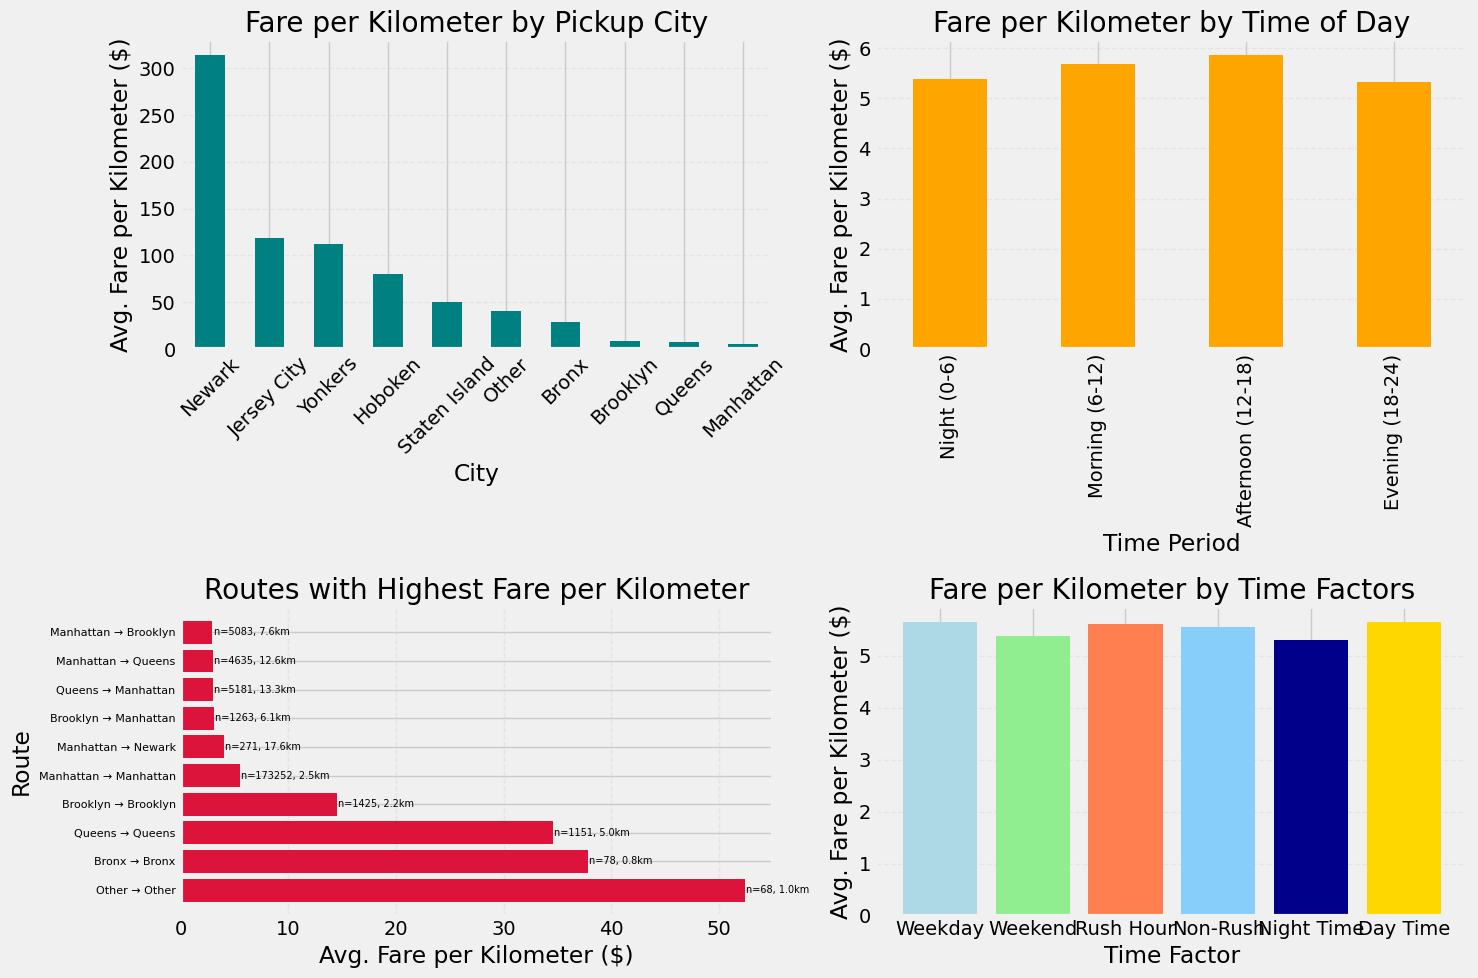

In [59]:
# Create a more detailed investigation into fare anomalies
plt.figure(figsize=(15, 10))

# 1. Create a fare efficiency metric (fare per km)
df_clean['fare_per_km'] = df_clean['fare_amount'] / df_clean.apply(
    lambda row: max(row['distance_km'], 0.1), axis=1)  # Avoid division by zero

# 2. Compare fare efficiency by city and time factors
plt.subplot(2, 2, 1)
city_efficiency = df_clean.groupby('pickup_city')['fare_per_km'].mean().sort_values(ascending=False).head(10)
city_efficiency.plot(kind='bar', color='teal')
plt.title('Fare per Kilometer by Pickup City')
plt.xlabel('City')
plt.ylabel('Avg. Fare per Kilometer ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# 3. Compare fare efficiency by time of day
plt.subplot(2, 2, 2)
df_clean['hour_group'] = pd.cut(df_clean['hour'],
                              bins=[0, 6, 12, 18, 24],
                              labels=['Night (0-6)', 'Morning (6-12)',
                                      'Afternoon (12-18)', 'Evening (18-24)'])
time_efficiency = df_clean.groupby('hour_group')['fare_per_km'].mean()
time_efficiency.plot(kind='bar', color='orange')
plt.title('Fare per Kilometer by Time of Day')
plt.xlabel('Time Period')
plt.ylabel('Avg. Fare per Kilometer ($)')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# 4. Find specific routes that have abnormally high fare per km
plt.subplot(2, 2, 3)
# Calculate route statistics
route_stats = df_clean.groupby(['pickup_city', 'dropoff_city']).agg({
    'fare_per_km': ['mean', 'count'],
    'distance_km': 'mean'
}).reset_index()

# Flatten the multi-index columns
route_stats.columns = ['pickup_city', 'dropoff_city', 'avg_fare_per_km', 'trip_count', 'avg_distance']

# Filter routes with sufficient data
route_stats = route_stats[route_stats['trip_count'] > 50]

# Sort by fare efficiency
top_expensive_routes = route_stats.sort_values('avg_fare_per_km', ascending=False).head(10)

# Plot
plt.barh(range(len(top_expensive_routes)), top_expensive_routes['avg_fare_per_km'], color='crimson')
plt.yticks(range(len(top_expensive_routes)),
           [f"{p} → {d}" for p, d in zip(top_expensive_routes['pickup_city'], top_expensive_routes['dropoff_city'])],
           fontsize=8)
plt.title('Routes with Highest Fare per Kilometer')
plt.xlabel('Avg. Fare per Kilometer ($)')
plt.ylabel('Route')
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Add annotations with trip count and average distance
for i, (_, row) in enumerate(top_expensive_routes.iterrows()):
    plt.text(row['avg_fare_per_km'] + 0.1, i,
             f"n={int(row['trip_count'])}, {row['avg_distance']:.1f}km",
             va='center', fontsize=7)

# 5. Comparing fare efficiency between weekday/weekend and rush hour
plt.subplot(2, 2, 4)
time_factors = [
    ('Weekday', df_clean[df_clean['is_weekend'] == 0]),
    ('Weekend', df_clean[df_clean['is_weekend'] == 1]),
    ('Rush Hour', df_clean[(df_clean['is_rush_hour_morning'] == 1) | (df_clean['is_rush_hour_evening'] == 1)]),
    ('Non-Rush', df_clean[(df_clean['is_rush_hour_morning'] == 0) & (df_clean['is_rush_hour_evening'] == 0)]),
    ('Night Time', df_clean[df_clean['is_night_time'] == 1]),
    ('Day Time', df_clean[df_clean['is_night_time'] == 0])
]

labels = []
values = []
for label, subset in time_factors:
    labels.append(label)
    values.append(subset['fare_per_km'].mean())

x = range(len(labels))
plt.bar(x, values, color=['lightblue', 'lightgreen', 'coral', 'lightskyblue', 'darkblue', 'gold'])
plt.xticks(x, labels)
plt.title('Fare per Kilometer by Time Factors')
plt.xlabel('Time Factor')
plt.ylabel('Avg. Fare per Kilometer ($)')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

## Data Splitting and Scaling

### Split the data

In [60]:
df_clean

fare_amount           pickup_datetime  pickup_longitude  \
0               7.5 2015-05-07 19:52:06+00:00        -73.999817   
1               7.7 2009-07-17 20:04:56+00:00        -73.994355   
2              12.9 2009-08-24 21:45:00+00:00        -74.005043   
3               5.3 2009-06-26 08:22:21+00:00        -73.976124   
4              16.0 2014-08-28 17:47:00+00:00        -73.925023   
...             ...                       ...               ...   
199995          3.0 2012-10-28 10:49:00+00:00        -73.987042   
199996          7.5 2014-03-14 01:09:00+00:00        -73.984722   
199997         30.9 2009-06-29 00:42:00+00:00        -73.986017   
199998         14.5 2015-05-20 14:56:25+00:00        -73.997124   
199999         14.1 2010-05-15 04:08:00+00:00        -73.984395   

        pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0             40.738354         -73.999512         40.723217                1   
1             40.728225         -73.994710         40.750325                1   
2             40.740770         -73.962565         40.772647                1   
3             40.790844         -73.965316         40.803349                3   
4             40.744085         -73.973082         40.761247                5   
...                 ...                ...               ...              ...   
199995        40.739367         -73.986525         40.740297                1   
199996        40.736837         -74.006672         40.739620                1   
199997        40.756487         -73.858957         40.692588                2   
199998        40.725452         -73.983215         40.695415                1   
199999        40.720077         -73.985508         40.768793                1   

       service_type  distance_km  manhattan_distance  ... dropoff_city  \
0              ride     1.683323            1.706116  ...    Manhattan   
1              ride     2.457590            2.483275  ...    Manhattan   
2              ride     5.036377            7.148977  ...    Manhattan   
3              ride     1.661683            2.306735  ...    Manhattan   
4              ride     4.475450            5.989997  ...    Manhattan   
...             ...          ...                 ...  ...          ...   
199995         ride     0.112210            0.147175  ...    Manhattan   
199996         ride     1.875050            2.174663  ...    Manhattan   
199997         ride    12.850319           17.892889  ...     Brooklyn   
199998         ride     3.539715            4.516312  ...     Brooklyn   
199999         ride     5.417783            5.502081  ...    Manhattan   

        is_city_to_city  pickup_hotspot  dropoff_hotspot  is_solo  \
0                     0               1                1        1   
1                     0               1                1        1   
2                     0               1                1        1   
3                     0               1                1        0   
4                     0               1                1        0   
...                 ...             ...              ...      ...   
199995                0               1                1        1   
199996                0               1                1        1   
199997                1               1                1        0   
199998                1               1                1        1   
199999                0               1                1        1   

        is_group_trip  passenger_group  distance_bin  fare_per_km  \
0                   0             Solo        0-2 km     4.455474   
1                   0             Solo        2-5 km     3.133151   
2                   0             Solo       5-10 km     2.561365   
3                   1      Small Group        0-2 km     3.189536   
4                   1      Large Group        2-5 km     3.575060   
...               ...              ...           ...          ...   
199995              0        

In [61]:
df_clean.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'service_type', 'distance_km', 'manhattan_distance', 'completion',
       'hour', 'day', 'month', 'year', 'day_of_week', 'is_weekend', 'hour_sin',
       'hour_cos', 'is_rush_hour_morning', 'is_rush_hour_evening',
       'is_night_time', 'is_business_hours', 'pickup_in_manhattan',
       'dropoff_in_manhattan', 'manhattan_to_manhattan', 'is_long_trip',
       'is_short_trip', 'pickup_city', 'dropoff_city', 'is_city_to_city',
       'pickup_hotspot', 'dropoff_hotspot', 'is_solo', 'is_group_trip',
       'passenger_group', 'distance_bin', 'fare_per_km', 'hour_group'],
      dtype='object')

In [62]:
df_clean.to_csv('/content/drive/MyDrive/fatam/cleaned_data_for_Visualization.csv', index=False)  # 'index=False' prevents saving the DataFrame index

In [63]:
# Selecting features and target
features = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'distance_km','manhattan_distance', 'hour', 'day',
       'month', 'year', 'day_of_week', 'is_weekend', 'hour_sin', 'hour_cos',
       'is_rush_hour_morning', 'is_rush_hour_evening', 'is_night_time',
       'is_business_hours', 'pickup_in_manhattan', 'dropoff_in_manhattan',
       'manhattan_to_manhattan', 'is_long_trip', 'is_short_trip', 'pickup_city',
       'dropoff_city', 'is_city_to_city', 'pickup_hotspot',
       'dropoff_hotspot', 'is_solo', 'is_group_trip', 'passenger_group']

df_clean_filtered = df_clean[df_clean['distance_km'] != 0]

X = df_clean_filtered[features]
y = df_clean_filtered["fare_amount"]

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
df_clean_filtered

fare_amount           pickup_datetime  pickup_longitude  \
0               7.5 2015-05-07 19:52:06+00:00        -73.999817   
1               7.7 2009-07-17 20:04:56+00:00        -73.994355   
2              12.9 2009-08-24 21:45:00+00:00        -74.005043   
3               5.3 2009-06-26 08:22:21+00:00        -73.976124   
4              16.0 2014-08-28 17:47:00+00:00        -73.925023   
...             ...                       ...               ...   
199995          3.0 2012-10-28 10:49:00+00:00        -73.987042   
199996          7.5 2014-03-14 01:09:00+00:00        -73.984722   
199997         30.9 2009-06-29 00:42:00+00:00        -73.986017   
199998         14.5 2015-05-20 14:56:25+00:00        -73.997124   
199999         14.1 2010-05-15 04:08:00+00:00        -73.984395   

        pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0             40.738354         -73.999512         40.723217                1   
1             40.728225         -73.994710         40.750325                1   
2             40.740770         -73.962565         40.772647                1   
3             40.790844         -73.965316         40.803349                3   
4             40.744085         -73.973082         40.761247                5   
...                 ...                ...               ...              ...   
199995        40.739367         -73.986525         40.740297                1   
199996        40.736837         -74.006672         40.739620                1   
199997        40.756487         -73.858957         40.692588                2   
199998        40.725452         -73.983215         40.695415                1   
199999        40.720077         -73.985508         40.768793                1   

       service_type  distance_km  manhattan_distance  ... dropoff_city  \
0              ride     1.683323            1.706116  ...    Manhattan   
1              ride     2.457590            2.483275  ...    Manhattan   
2              ride     5.036377            7.148977  ...    Manhattan   
3              ride     1.661683            2.306735  ...    Manhattan   
4              ride     4.475450            5.989997  ...    Manhattan   
...             ...          ...                 ...  ...          ...   
199995         ride     0.112210            0.147175  ...    Manhattan   
199996         ride     1.875050            2.174663  ...    Manhattan   
199997         ride    12.850319           17.892889  ...     Brooklyn   
199998         ride     3.539715            4.516312  ...     Brooklyn   
199999         ride     5.417783            5.502081  ...    Manhattan   

        is_city_to_city  pickup_hotspot  dropoff_hotspot  is_solo  \
0                     0               1                1        1   
1                     0               1                1        1   
2                     0               1                1        1   
3                     0               1                1        0   
4                     0               1                1        0   
...                 ...             ...              ...      ...   
199995                0               1                1        1   
199996                0               1                1        1   
199997                1               1                1        0   
199998                1               1                1        1   
199999                0               1                1        1   

        is_group_trip  passenger_group  distance_bin  fare_per_km  \
0                   0             Solo        0-2 km     4.455474   
1                   0             Solo        2-5 km     3.133151   
2                   0             Solo       5-10 km     2.561365   
3                   1      Small Group        0-2 km     3.189536   
4                   1      Large Group        2-5 km     3.575060   
...               ...              ...           ...          ...   
199995              0        

In [65]:
X_train.dtypes

pickup_longitude           float64
pickup_latitude            float64
dropoff_longitude          float64
dropoff_latitude           float64
passenger_count              int64
distance_km                float64
manhattan_distance         float64
hour                         int32
day                          int32
month                        int32
year                         int32
day_of_week                  int32
is_weekend                   int64
hour_sin                   float64
hour_cos                   float64
is_rush_hour_morning         int64
is_rush_hour_evening         int64
is_night_time                int64
is_business_hours            int64
pickup_in_manhattan          int64
dropoff_in_manhattan         int64
manhattan_to_manhattan       int64
is_long_trip                 int64
is_short_trip                int64
pickup_city                 object
dropoff_city                object
is_city_to_city              int64
pickup_hotspot               int64
dropoff_hotspot              int64
is_solo                      int64
is_group_trip                int64
passenger_group           category
dtype: object

### Encoder

In [66]:
# # Define the features to encode
features_to_encode = ["pickup_city", "passenger_group", "dropoff_city"]

# Create a LabelEncoder object
encoder = LabelEncoder()

# Loop through the features and encode them
for feature in features_to_encode:
    X_train[feature] = encoder.fit_transform(X_train[feature])
    X_test[feature] = encoder.transform(X_test[feature]) # Use transform for the test set

In [67]:
X_train.head()

pickup_longitude  pickup_latitude  dropoff_longitude  \
198956        -73.983980        40.729539         -73.991172   
118505        -73.972602        40.759773         -73.960863   
66056         -73.991800        40.749500         -73.982619   
61819         -73.977140        40.747122         -73.965152   
90089         -74.015432        40.704867         -73.983765   

        dropoff_latitude  passenger_count  distance_km  manhattan_distance  \
198956         40.748691                1     2.214131            2.737192   
118505         40.766202                2     1.220045            1.711434   
66056          40.742759                2     1.077051            1.528636   
61819          40.755438                1     1.369232            1.942056   
90089          40.749183                1     5.603845            7.610771   

        hour  day  month  ...  is_long_trip  is_short_trip  pickup_city  \
198956    10   25      6  ...             0              0            4   
118505    22   16      1  ...             0              1            4   
66056     13   27     10  ...             0              1            4   
61819     23   11      2  ...             0              1            4   
90089     14    2      5  ...             0              0            4   

        dropoff_city  is_city_to_city  pickup_hotspot  dropoff_hotspot  \
198956             4                0               1                1   
118505             4                0               1                1   
66056              4                0               1                1   
61819              4                0               1                1   
90089              4                0               1                1   

        is_solo  is_group_trip  passenger_group  
198956        1              0                3  
118505        0              1                0  
66056         0              1                0  
61819         1              0                3  
90089         1              0                3  

[5 rows x 32 columns]

## Train and Evaluate Models
## regerssion

### Train Linear Regression

Linear Regression:
Train - RMSE: 3.609, MAE: 2.009, R²: 0.85033
Test  - RMSE: 3.645, MAE: 2.023, R²: 0.84755


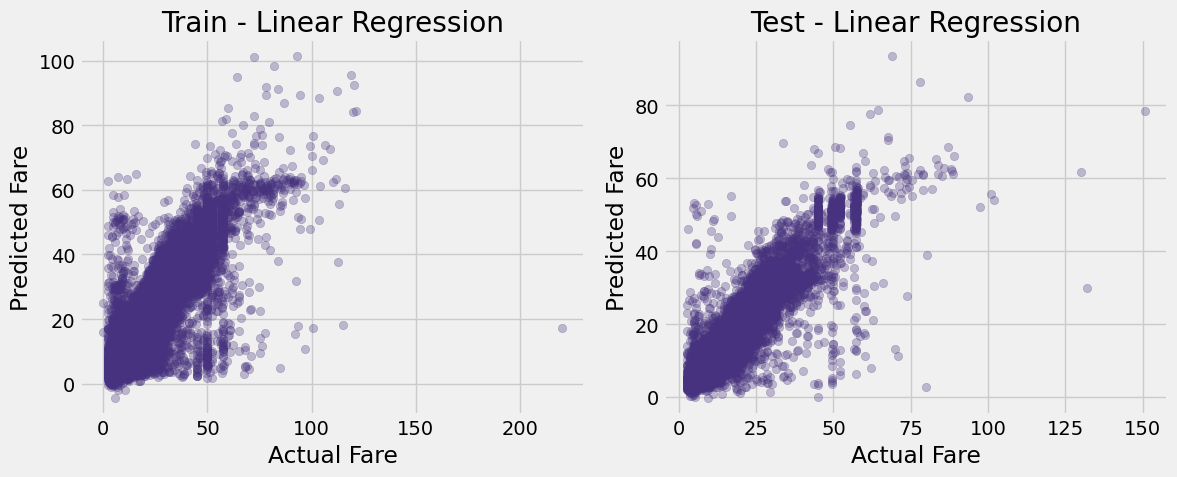

In [68]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_train_pred = lr_model.predict(X_train)
lr_test_pred = lr_model.predict(X_test)

lr_rmse_train = np.sqrt(mean_squared_error(y_train, lr_train_pred))
lr_mae_train = mean_absolute_error(y_train, lr_train_pred)
lr_r2_train = r2_score(y_train, lr_train_pred)

lr_rmse_test = np.sqrt(mean_squared_error(y_test, lr_test_pred))
lr_mae_test = mean_absolute_error(y_test, lr_test_pred)
lr_r2_test = r2_score(y_test, lr_test_pred)

print("Linear Regression:")
print(f"Train - RMSE: {lr_rmse_train:.3f}, MAE: {lr_mae_train:.3f}, R²: {lr_r2_train:.5f}")
print(f"Test  - RMSE: {lr_rmse_test:.3f}, MAE: {lr_mae_test:.3f}, R²: {lr_r2_test:.5f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train, lr_train_pred, alpha=0.3)
plt.title("Train - Linear Regression")
plt.xlabel("Actual Fare"); plt.ylabel("Predicted Fare")

plt.subplot(1, 2, 2)
plt.scatter(y_test, lr_test_pred, alpha=0.3)
plt.title("Test - Linear Regression")
plt.xlabel("Actual Fare"); plt.ylabel("Predicted Fare")
plt.tight_layout(); plt.show()

### Train Ridge Regression



Ridge Regression:
Train - RMSE: 3.609, MAE: 2.008, R²: 0.85033
Test  - RMSE: 3.645, MAE: 2.022, R²: 0.84754


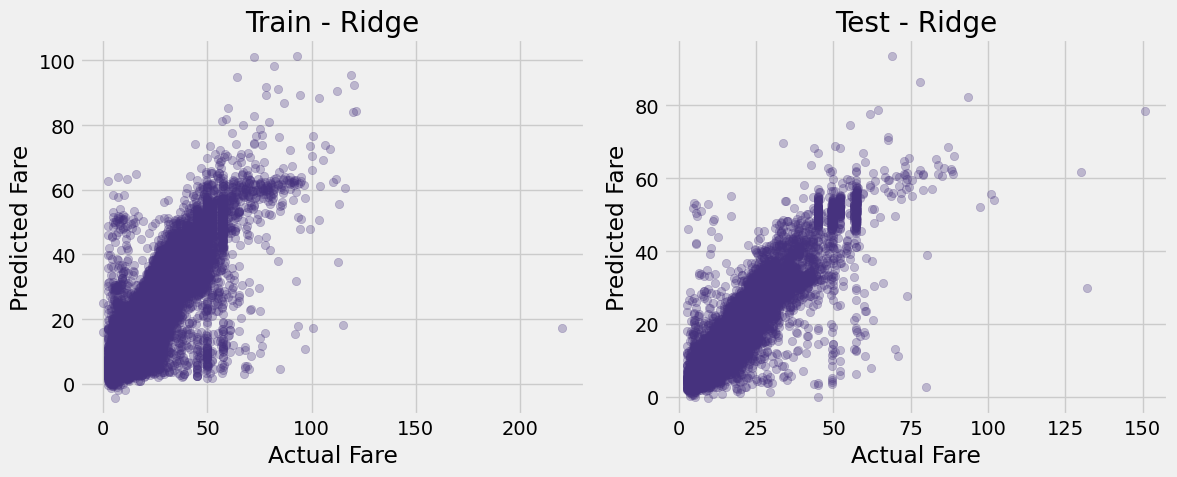

In [69]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

ridge_train_pred = ridge_model.predict(X_train)
ridge_test_pred = ridge_model.predict(X_test)

ridge_rmse_train = np.sqrt(mean_squared_error(y_train, ridge_train_pred))
ridge_mae_train = mean_absolute_error(y_train, ridge_train_pred)
ridge_r2_train = r2_score(y_train, ridge_train_pred)

ridge_rmse_test = np.sqrt(mean_squared_error(y_test, ridge_test_pred))
ridge_mae_test = mean_absolute_error(y_test, ridge_test_pred)
ridge_r2_test = r2_score(y_test, ridge_test_pred)

print("Ridge Regression:")
print(f"Train - RMSE: {ridge_rmse_train:.3f}, MAE: {ridge_mae_train:.3f}, R²: {ridge_r2_train:.5f}")
print(f"Test  - RMSE: {ridge_rmse_test:.3f}, MAE: {ridge_mae_test:.3f}, R²: {ridge_r2_test:.5f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train, ridge_train_pred, alpha=0.3)
plt.title("Train - Ridge")
plt.xlabel("Actual Fare"); plt.ylabel("Predicted Fare")

plt.subplot(1, 2, 2)
plt.scatter(y_test, ridge_test_pred, alpha=0.3)
plt.title("Test - Ridge")
plt.xlabel("Actual Fare"); plt.ylabel("Predicted Fare")
plt.tight_layout(); plt.show()


### Train Random Forest

Random Forest:
Train - RMSE: 1.206, MAE: 0.628, R²: 0.98328
Test  - RMSE: 3.177, MAE: 1.685, R²: 0.88417


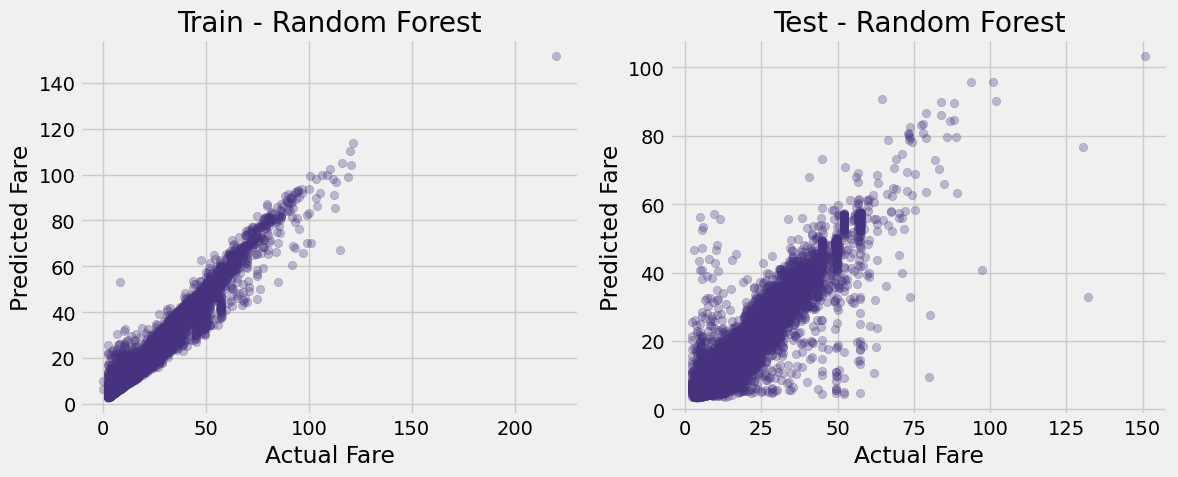

In [70]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

rf_rmse_train = np.sqrt(mean_squared_error(y_train, rf_train_pred))
rf_mae_train = mean_absolute_error(y_train, rf_train_pred)
rf_r2_train = r2_score(y_train, rf_train_pred)

rf_rmse_test = np.sqrt(mean_squared_error(y_test, rf_test_pred))
rf_mae_test = mean_absolute_error(y_test, rf_test_pred)
rf_r2_test = r2_score(y_test, rf_test_pred)

print("Random Forest:")
print(f"Train - RMSE: {rf_rmse_train:.3f}, MAE: {rf_mae_train:.3f}, R²: {rf_r2_train:.5f}")
print(f"Test  - RMSE: {rf_rmse_test:.3f}, MAE: {rf_mae_test:.3f}, R²: {rf_r2_test:.5f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train, rf_train_pred, alpha=0.3)
plt.title("Train - Random Forest")
plt.xlabel("Actual Fare"); plt.ylabel("Predicted Fare")

plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_test_pred, alpha=0.3)
plt.title("Test - Random Forest")
plt.xlabel("Actual Fare"); plt.ylabel("Predicted Fare")
plt.tight_layout(); plt.show()


### Train Gradient Boosting

Gradient Boosting:
Train - RMSE: 3.199, MAE: 1.772, R²: 0.88241
Test  - RMSE: 3.281, MAE: 1.796, R²: 0.87653


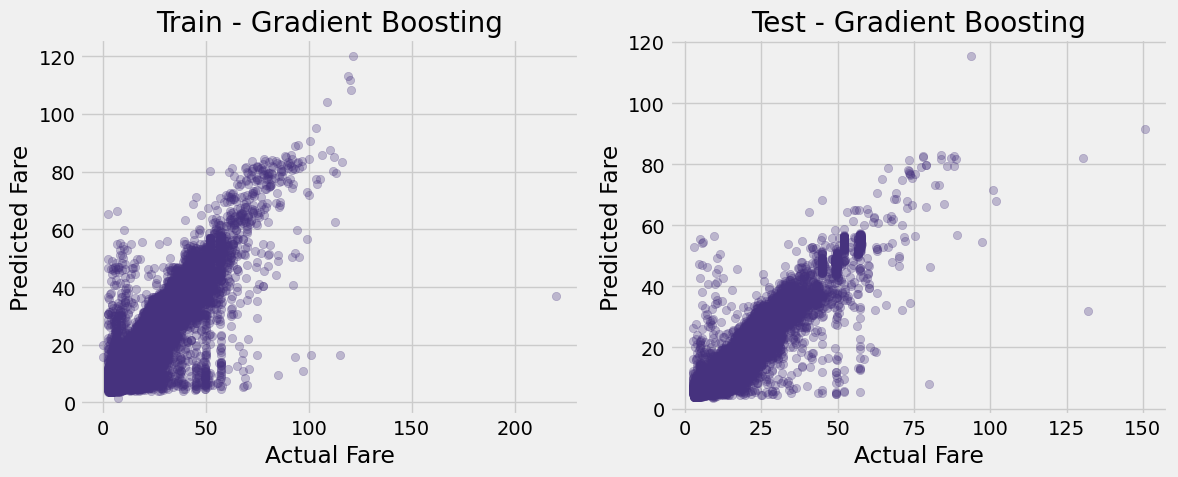

In [71]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

gb_train_pred = gb_model.predict(X_train)
gb_test_pred = gb_model.predict(X_test)

gb_rmse_train = np.sqrt(mean_squared_error(y_train, gb_train_pred))
gb_mae_train = mean_absolute_error(y_train, gb_train_pred)
gb_r2_train = r2_score(y_train, gb_train_pred)

gb_rmse_test = np.sqrt(mean_squared_error(y_test, gb_test_pred))
gb_mae_test = mean_absolute_error(y_test, gb_test_pred)
gb_r2_test = r2_score(y_test, gb_test_pred)

print("Gradient Boosting:")
print(f"Train - RMSE: {gb_rmse_train:.3f}, MAE: {gb_mae_train:.3f}, R²: {gb_r2_train:.5f}")
print(f"Test  - RMSE: {gb_rmse_test:.3f}, MAE: {gb_mae_test:.3f}, R²: {gb_r2_test:.5f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train, gb_train_pred, alpha=0.3)
plt.title("Train - Gradient Boosting")
plt.xlabel("Actual Fare"); plt.ylabel("Predicted Fare")

plt.subplot(1, 2, 2)
plt.scatter(y_test, gb_test_pred, alpha=0.3)
plt.title("Test - Gradient Boosting")
plt.xlabel("Actual Fare"); plt.ylabel("Predicted Fare")
plt.tight_layout(); plt.show()


### Train XGBoost

In [ ]:
xgb_model = xgb.XGBRegressor(
    n_estimators=300, max_depth=6, learning_rate=0.05,
    subsample=0.8, colsample_bytree=0.8,
    reg_alpha=0.1, reg_lambda=1.0, random_state=42
)
xgb_model.fit(X_train, y_train)

xgb_train_pred = xgb_model.predict(X_train)
xgb_test_pred = xgb_model.predict(X_test)

xgb_rmse_train = np.sqrt(mean_squared_error(y_train, xgb_train_pred))
xgb_mae_train = mean_absolute_error(y_train, xgb_train_pred)
xgb_r2_train = r2_score(y_train, xgb_train_pred)

xgb_rmse_test = np.sqrt(mean_squared_error(y_test, xgb_test_pred))
xgb_mae_test = mean_absolute_error(y_test, xgb_test_pred)
xgb_r2_test = r2_score(y_test, xgb_test_pred)

print("XGBoost:")
print(f"Train - RMSE: {xgb_rmse_train:.3f}, MAE: {xgb_mae_train:.3f}, R²: {xgb_r2_train:.5f}")
print(f"Test  - RMSE: {xgb_rmse_test:.3f}, MAE: {xgb_mae_test:.3f}, R²: {xgb_r2_test:.5f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train, xgb_train_pred, alpha=0.3)
plt.title("Train - XGBoost")
plt.xlabel("Actual Fare"); plt.ylabel("Predicted Fare")

plt.subplot(1, 2, 2)
plt.scatter(y_test, xgb_test_pred, alpha=0.3)
plt.title("Test - XGBoost")
plt.xlabel("Actual Fare"); plt.ylabel("Predicted Fare")
plt.tight_layout(); plt.show()


### Train LightGBM

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.052168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1716
[LightGBM] [Info] Number of data points in the train set: 153950, number of used features: 32
[LightGBM] [Info] Start training from score 11.272536
LightGBM:
Train - RMSE: 2.848, MAE: 1.572, R²: 0.90679
Test  - RMSE: 3.086, MAE: 1.640, R²: 0.89074


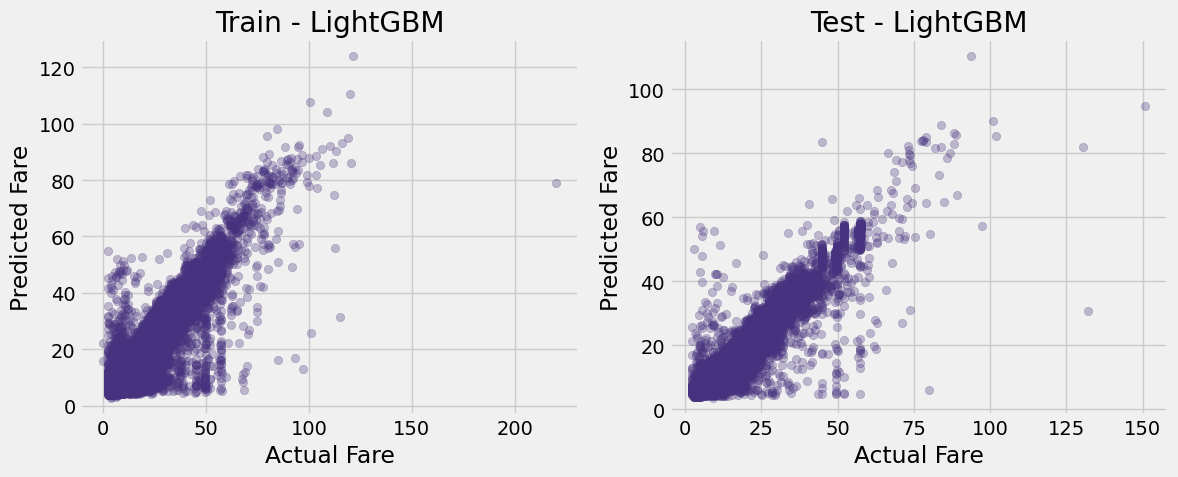

In [73]:
lgb_model = lgb.LGBMRegressor(
    n_estimators=300, learning_rate=0.05,
    num_leaves=31, subsample=0.8, colsample_bytree=0.8,
    reg_alpha=0.1, reg_lambda=1.0, random_state=42
)
lgb_model.fit(X_train, y_train)

lgb_train_pred = lgb_model.predict(X_train)
lgb_test_pred = lgb_model.predict(X_test)

lgb_rmse_train = np.sqrt(mean_squared_error(y_train, lgb_train_pred))
lgb_mae_train = mean_absolute_error(y_train, lgb_train_pred)
lgb_r2_train = r2_score(y_train, lgb_train_pred)

lgb_rmse_test = np.sqrt(mean_squared_error(y_test, lgb_test_pred))
lgb_mae_test = mean_absolute_error(y_test, lgb_test_pred)
lgb_r2_test = r2_score(y_test, lgb_test_pred)

print("LightGBM:")
print(f"Train - RMSE: {lgb_rmse_train:.3f}, MAE: {lgb_mae_train:.3f}, R²: {lgb_r2_train:.5f}")
print(f"Test  - RMSE: {lgb_rmse_test:.3f}, MAE: {lgb_mae_test:.3f}, R²: {lgb_r2_test:.5f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train, lgb_train_pred, alpha=0.3)
plt.title("Train - LightGBM")
plt.xlabel("Actual Fare"); plt.ylabel("Predicted Fare")

plt.subplot(1, 2, 2)
plt.scatter(y_test, lgb_test_pred, alpha=0.3)
plt.title("Test - LightGBM")
plt.xlabel("Actual Fare"); plt.ylabel("Predicted Fare")
plt.tight_layout(); plt.show()


### Train CatBoost

In [ ]:
cat_model = CatBoostRegressor(
    iterations=300, learning_rate=0.05, depth=8,
    l2_leaf_reg=3, verbose=0, random_state=42
)
cat_model.fit(X_train, y_train)

cat_train_pred = cat_model.predict(X_train)
cat_test_pred = cat_model.predict(X_test)

cat_rmse_train = np.sqrt(mean_squared_error(y_train, cat_train_pred))
cat_mae_train = mean_absolute_error(y_train, cat_train_pred)
cat_r2_train = r2_score(y_train, cat_train_pred)

cat_rmse_test = np.sqrt(mean_squared_error(y_test, cat_test_pred))
cat_mae_test = mean_absolute_error(y_test, cat_test_pred)
cat_r2_test = r2_score(y_test, cat_test_pred)

print("CatBoost:")
print(f"Train - RMSE: {cat_rmse_train:.3f}, MAE: {cat_mae_train:.3f}, R²: {cat_r2_train:.5f}")
print(f"Test  - RMSE: {cat_rmse_test:.3f}, MAE: {cat_mae_test:.3f}, R²: {cat_r2_test:.5f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train, cat_train_pred, alpha=0.3)
plt.title("Train - CatBoost")
plt.xlabel("Actual Fare"); plt.ylabel("Predicted Fare")

plt.subplot(1, 2, 2)
plt.scatter(y_test, cat_test_pred, alpha=0.3)
plt.title("Test - CatBoost")
plt.xlabel("Actual Fare"); plt.ylabel("Predicted Fare")
plt.tight_layout(); plt.show()


### Final Model Comparison Plot

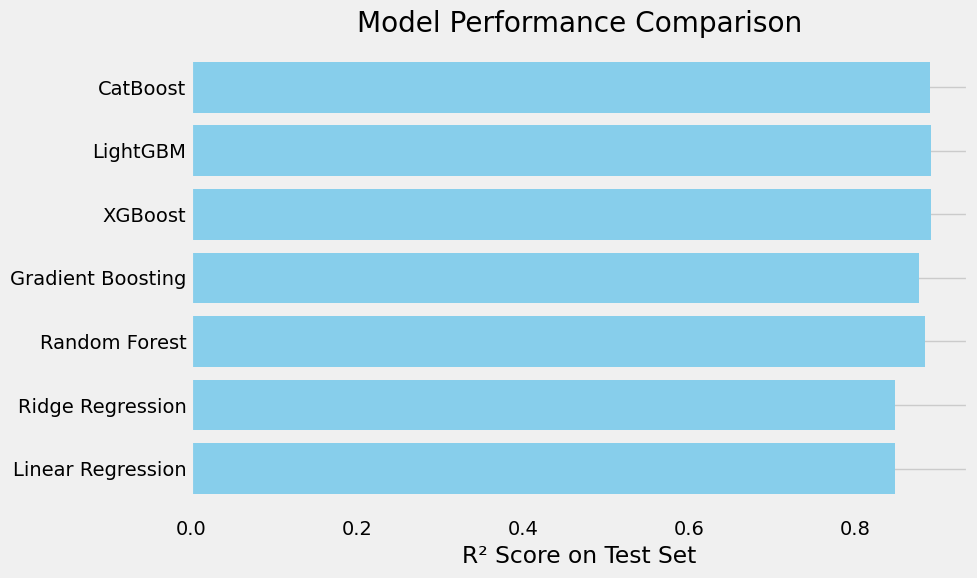

In [75]:
# Dictionary of test scores for all models
model_scores = {
    "Linear Regression": lr_r2_test,
    "Ridge Regression": ridge_r2_test,
    "Random Forest": rf_r2_test,
    "Gradient Boosting": gb_r2_test,
    "XGBoost": xgb_r2_test,
    "LightGBM": lgb_r2_test,
    "CatBoost": cat_r2_test,
}

# Bar plot of R² scores
plt.figure(figsize=(10, 6))
plt.barh(list(model_scores.keys()), list(model_scores.values()), color='skyblue')
plt.xlabel("R² Score on Test Set")
plt.title("Model Performance Comparison")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


### Cross-Validation on Best Models

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor

# Define parameter grid for CatBoost
param_dist = {
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'iterations': [100, 200, 300, 500],
    'border_count': [32, 64, 128],
}

# Initialize model
cat_random = CatBoostRegressor(verbose=0, random_state=42)

# Randomized Search
cat_random_search = RandomizedSearchCV(
    estimator=cat_random,
    param_distributions=param_dist,
    n_iter=20,  # number of combinations to try
    cv=3,
    scoring='r2',
    random_state=42,
    n_jobs=-1
)

# Fit search
cat_random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters from RandomizedSearchCV:")
print(cat_random_search.best_params_)


### Retrain with Best Parameters & Evaluate


In [ ]:
# Best CatBoost model
best_cat_model = cat_random_search.best_estimator_
# best_cat_model = CatBoostRegressor(iterations=500, learning_rate= 0.1, l2_leaf_reg= 7,  depth=10, border_count= 128, verbose=0, random_state=42)

# Fit best model
best_cat_model.fit(X_train, y_train)

# Predictions
best_cat_train_pred = best_cat_model.predict(X_train)
best_cat_test_pred = best_cat_model.predict(X_test)

# Metrics
best_cat_rmse_train = np.sqrt(mean_squared_error(y_train, best_cat_train_pred))
best_cat_mae_train = mean_absolute_error(y_train, best_cat_train_pred)
best_cat_r2_train = r2_score(y_train, best_cat_train_pred)

best_cat_rmse_test = np.sqrt(mean_squared_error(y_test, best_cat_test_pred))
best_cat_mae_test = mean_absolute_error(y_test, best_cat_test_pred)
best_cat_r2_test = r2_score(y_test, best_cat_test_pred)

print("Tuned CatBoost Performance:")
print(f"Train - RMSE: {best_cat_rmse_train:.3f}, MAE: {best_cat_mae_train:.3f}, R²: {best_cat_r2_train:.5f}")
print(f"Test  - RMSE: {best_cat_rmse_test:.3f}, MAE: {best_cat_mae_test:.3f}, R²: {best_cat_r2_test:.5f}")


In [ ]:
# Get and display feature importance
feature_importance = best_cat_model.get_feature_importance()
feature_names = X_train.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("Top 10 Most Important Features:")
print(importance_df)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('all CatBoost Feature Importances')
plt.tight_layout()
plt.show()

### remove unnecessary features

In [ ]:
def optimize_features(df, verbose=True):
    """
    Removes low-importance features while preserving model performance
    Returns DataFrame with optimized feature set
    """
    # Features to definitely remove (low importance + redundancy)
    phase1_remove = [
        'pickup_mostspot', 'is_group_trip', 'is_solo',
        'passenger_count', 'passenger_group',
        'is_rush_hour_evening', 'is_night_time'
    ]

    # Borderline features (remove if they exist)
    phase2_remove = [
        'is_rush_hour_morning', 'is_weekend',
        'pickup_in_manhattan', 'dropoff_in_manhattan',
        'hour'  # Keep hour_sin/hour_cos instead
    ]

    # First pass removal
    df_optimized = df.drop(columns=[col for col in phase1_remove if col in df.columns])

    # Second pass removal (only if columns exist)
    df_optimized = df_optimized.drop(columns=[col for col in phase2_remove if col in df_optimized.columns])

    # Distance metric consolidation
    if 'manhattan_distance' in df_optimized.columns:
        df_optimized = df_optimized.drop(columns=['manhattan_distance'])

    # City feature consolidation
    if 'pickup_city' in df_optimized.columns and 'dropoff_city' in df_optimized.columns:
        df_optimized = df_optimized.drop(columns=['pickup_city'])

    if verbose:
        original_features = len(df.columns)
        new_features = len(df_optimized.columns)
        print(f"Feature reduction: {original_features} → {new_features} (-{100*(original_features-new_features)/original_features:.1f}%)")
        print("Remaining features:", list(df_optimized.columns))

    return df_optimized

X_train = optimize_features(X_train)
X_test = optimize_features(X_test, verbose=False)

In [ ]:
# Best CatBoost model
best_cat_model = cat_random_search.best_estimator_

# Fit best model
best_cat_model.fit(X_train, y_train)

# Predictions
best_cat_train_pred = best_cat_model.predict(X_train)
best_cat_test_pred = best_cat_model.predict(X_test)

# Metrics
best_cat_rmse_train = np.sqrt(mean_squared_error(y_train, best_cat_train_pred))
best_cat_mae_train = mean_absolute_error(y_train, best_cat_train_pred)
best_cat_r2_train = r2_score(y_train, best_cat_train_pred)

best_cat_rmse_test = np.sqrt(mean_squared_error(y_test, best_cat_test_pred))
best_cat_mae_test = mean_absolute_error(y_test, best_cat_test_pred)
best_cat_r2_test = r2_score(y_test, best_cat_test_pred)

print("Tuned CatBoost Performance:")
print(f"Train - RMSE: {best_cat_rmse_train:.3f}, MAE: {best_cat_mae_train:.3f}, R²: {best_cat_r2_train:.5f}")
print(f"Test  - RMSE: {best_cat_rmse_test:.3f}, MAE: {best_cat_mae_test:.3f}, R²: {best_cat_r2_test:.5f}")

In [ ]:
# Save the CatBoost model
import joblib

# Save the model to a file
joblib.dump(best_cat_model, 'uber_fare_predictor_catboost.pkl')

# Save the encoder
mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
print(mapping)
joblib.dump(encoder, 'label_encoder.pkl')

In [ ]:
import pkg_resources
import subprocess
import sys
from google.colab import files


def get_installed_packages():
    """Get a dictionary of installed packages and their versions"""
    installed_packages = {pkg.key: pkg.version for pkg in pkg_resources.working_set}
    return installed_packages

def generate_requirements_file(output_file='requirements.txt'):
    """Generate requirements.txt file with package versions"""
    installed_packages = get_installed_packages()

    # Manually add packages that might be missing from pip list
    # (like packages installed with !pip in notebooks)
    additional_packages = {
        'catboost': None,
        'lightgbm': None,
        'xgboost': None,
        'prophet': None,
        'folium': None
    }

    # Update with installed versions if available
    for pkg in additional_packages:
        if pkg in installed_packages:
            additional_packages[pkg] = installed_packages[pkg]

    # Write to requirements file
    with open(output_file, 'w') as f:
        for pkg, version in installed_packages.items():
            f.write(f"{pkg}=={version}\n")

        # Add packages that might not be in the installed list but are needed
        for pkg, version in additional_packages.items():
            if pkg not in installed_packages:
                if version:
                    f.write(f"{pkg}=={version}\n")
                else:
                    # If version is unknown, just list the package
                    f.write(f"{pkg}\n")

    print(f"Requirements file generated at {output_file}")

# Execute the function
generate_requirements_file()
files.download('requirements.txt')

In [ ]:
def generate_streamlit_requirements():
    """Generate a requirements.txt file focused on the essential packages for the Streamlit app"""
    # Core packages used in your analysis
    essential_packages = [
        'streamlit',
        'pandas',
        'numpy',
        'scikit-learn',
        'catboost',
        'lightgbm',
        'xgboost',
        'matplotlib',
        'seaborn',
        'folium',
        'prophet',
        'joblib'
    ]

    installed_packages = {pkg.key: pkg.version for pkg in pkg_resources.working_set}

    with open('requirements_stream.txt', 'w') as f:
        for pkg in essential_packages:
            if pkg in installed_packages:
                f.write(f"{pkg}=={installed_packages[pkg]}\n")
            else:
                # If not installed, just list the package (pip will get latest)
                f.write(f"{pkg}\n")

    print("requirements.txt generated with essential packages for the Streamlit app")

generate_streamlit_requirements()
files.download('requirements_stream.txt')

In [86]:
# prompt: download the files and the model and the encoder

from google.colab import files

# Download the trained CatBoost model
files.download('uber_fare_predictor_catboost.pkl')

# Download the trained LabelEncoder
files.download('label_encoder.pkl')

# Download the Streamlit requirements file
files.download('requirements_stream.txt')
files.download('requirements.txt')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Stacking Ensemble

In [ ]:
# Base estimators
estimators = [
    ('xgb', xgb.XGBRegressor(n_estimators=300, max_depth=6, learning_rate=0.05, random_state=42)),
    ('lgb', lgb.LGBMRegressor(n_estimators=300, learning_rate=0.05, random_state=42)),
    ('cat', CatBoostRegressor(iterations=500, learning_rate= 0.1, depth=10, verbose=0, random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=200, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=200, random_state=42))
]

# Final estimator
final_estimator = Ridge(alpha=1.0)

# Create stacking regressor
stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5  # 5-fold cross-validation
)

# Train the stacking ensemble
print("Training stacking ensemble...")
stacking_regressor.fit(X_train, y_train)

# Evaluate on test set
y_pred = stacking_regressor.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Stacking Ensemble - RMSE: {rmse:.3f}, MAE: {mae:.3f}, R²: {r2:.5f}")

Training stacking ensemble...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034434 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1399
[LightGBM] [Info] Number of data points in the train set: 153958, number of used features: 19
[LightGBM] [Info] Start training from score 11.287590
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1399
[LightGBM] [Info] Number of data points in the train set: 123166, number of used features: 19
[LightGBM] [Info] Start training from score 11.279839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012975 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise

## Streamlit App

In [87]:
!pip install streamlit pandas numpy joblib catboost scikit-learn pyngrok
!pip install folium streamlit-folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.4/328.4 kB 5.2 MB/s eta 0:00:00


###Create Feature Transformation Pipeline

Create a new Python file called `feature_transformer.py`

In [88]:
%%writefile feature_transformer.py
import pandas as pd
import numpy as np
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):
    """Calculate the great circle distance between two points on the earth"""
    R = 6371  # Earth radius in kilometers
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    return 2 * R * np.arcsin(np.sqrt(a))

def assign_city(lat, lon):
    # Manhattan (famous for business, tourism)
    if 40.7 <= lat <= 40.88 and -74.02 <= lon <= -73.91:
        return 'Manhattan'
    # Long Island City (subset of Queens, famous for arts and proximity to Manhattan)
    elif 40.73 <= lat <= 40.76 and -73.96 <= lon <= -73.91:
        return 'Long Island City'
    # Brooklyn (famous for culture, nightlife)
    elif 40.57 <= lat <= 40.74 and -74.04 <= lon <= -73.83:
        return 'Brooklyn'
    # Queens (includes JFK, LaGuardia)
    elif 40.54 <= lat <= 40.8 and -73.96 <= lon <= -73.7:
        return 'Queens'
    # Bronx
    elif 40.79 <= lat <= 40.92 and -73.93 <= lon <= -73.76:
        return 'Bronx'
    # Staten Island
    elif 40.49 <= lat <= 40.65 and -74.26 <= lon <= -74.05:
        return 'Staten Island'
    # Jersey City (famous for commuters, skyline views)
    elif 40.69 <= lat <= 40.75 and -74.12 <= lon <= -74.03:
        return 'Jersey City'
    # Hoboken (famous for nightlife, proximity to Manhattan)
    elif 40.73 <= lat <= 40.76 and -74.04 <= lon <= -73.99:
        return 'Hoboken'
    # Newark (includes Newark Airport)
    elif 40.65 <= lat <= 40.78 and -74.25 <= lon <= -74.11:
        return 'Newark'
    # Yonkers
    elif 40.91 <= lat <= 40.98 and -73.91 <= lon <= -73.83:
        return 'Yonkers'
    else:
        return 'Other'

def transform_features(input_data):
    """Transform raw input data into features used by the model"""
    # Create a DataFrame from the input data
    df = pd.DataFrame([input_data])

    # Convert pickup_datetime to datetime
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

    # Time features
    df['hour'] = df['pickup_datetime'].dt.hour
    df['day'] = df['pickup_datetime'].dt.day
    df['month'] = df['pickup_datetime'].dt.month
    df['year'] = df['pickup_datetime'].dt.year
    df['day_of_week'] = df['pickup_datetime'].dt.weekday

    # Cyclical encoding of hour
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

    # Business hours
    df['is_business_hours'] = ((df['hour'] >= 9) & (df['hour'] <= 17) & (df['day_of_week'] < 5)).astype(int)

    # Distance calculation
    df['distance_km'] = haversine(
        df['pickup_latitude'], df['pickup_longitude'],
        df['dropoff_latitude'], df['dropoff_longitude']
    )

    # Manhattan boundaries
    manhattan_bounds = {
        'north': 40.879, 'south': 40.703,
        'east': -73.907, 'west': -74.030
    }

    # Manhattan features
    df['dropoff_in_manhattan'] = (
        (df['dropoff_latitude'] >= manhattan_bounds['south']) &
        (df['dropoff_latitude'] <= manhattan_bounds['north']) &
        (df['dropoff_longitude'] >= manhattan_bounds['west']) &
        (df['dropoff_longitude'] <= manhattan_bounds['east'])
    ).astype(int)

    df['manhattan_to_manhattan'] = (
        ((df['pickup_latitude'] >= manhattan_bounds['south']) &
         (df['pickup_latitude'] <= manhattan_bounds['north']) &
         (df['pickup_longitude'] >= manhattan_bounds['west']) &
         (df['pickup_longitude'] <= manhattan_bounds['east'])) &
        df['dropoff_in_manhattan']
    ).astype(int)

    # Trip characteristics
    df['is_long_trip'] = (df['distance_km'] > 10).astype(int)
    df['is_short_trip'] = (df['distance_km'] < 2).astype(int)

    # Location features
    # Apply to pickup and dropoff locations
    df['pickup_city'] = df.apply(lambda row: assign_city(row['pickup_latitude'], row['pickup_longitude']), axis=1)
    df['dropoff_city'] = df.apply(lambda row: assign_city(row['dropoff_latitude'], row['dropoff_longitude']), axis=1)
    df['is_city_to_city'] = (df.apply(lambda row: assign_city(row['pickup_latitude'], row['pickup_longitude']), axis=1) != df['dropoff_city']).astype(int)

    # Popular Locations (Hotspots) - Top 3 Pickup & Dropoff
    top_pickups = df['pickup_city'].value_counts().nlargest(3).index
    top_dropoffs = df['dropoff_city'].value_counts().nlargest(3).index
    df['pickup_hotspot'] = df['pickup_city'].isin(top_pickups).astype(int)
    df['dropoff_hotspot'] = df['dropoff_city'].isin(top_dropoffs).astype(int)

    # Select only the features the model expects
    final_features = [
        'pickup_longitude', 'pickup_latitude',
        'dropoff_longitude', 'dropoff_latitude',
        'distance_km', 'day', 'month', 'year',
        'day_of_week', 'hour_sin', 'hour_cos',
        'is_business_hours', 'manhattan_to_manhattan',
        'is_long_trip', 'is_short_trip', 'dropoff_city',
        'is_city_to_city', 'pickup_hotspot', 'dropoff_hotspot'
    ]

    return df[final_features]

Writing feature_transformer.py


### Create the Streamlit App
Create a file called `uber_fare_predictor_app.py`:

In [89]:
%%writefile uber_fare_predictor_app.py
import streamlit as st
import pandas as pd
import joblib
import folium
from datetime import datetime
from streamlit_folium import folium_static
from feature_transformer import transform_features

# Load the trained model and encoder
@st.cache_resource
def load_model():
    model = joblib.load('/content/uber_fare_predictor_catboost.pkl')
    encoder = joblib.load('/content/label_encoder.pkl')
    return model, encoder

model, encoder = load_model()

# App title and description
st.title('🚕 Uber Fare Predictor')
st.markdown("""
Predict your Uber fare based on trip details. Enter your trip information below and click **Predict Fare**.
""")

# Input form
with st.form("fare_prediction_form"):
    st.header("Trip Details")

    col1, col2 = st.columns(2)

    with col1:
        pickup_lat = st.number_input("Pickup Latitude", value=40.7128, format="%.6f")
        pickup_lon = st.number_input("Pickup Longitude", value=-74.0060, format="%.6f")
        passenger_count = st.number_input("Passenger Count", min_value=1, max_value=6, value=1)

    with col2:
        dropoff_lat = st.number_input("Dropoff Latitude", value=40.7128, format="%.6f")
        dropoff_lon = st.number_input("Dropoff Longitude", value=-74.0060, format="%.6f")
        # Using date and time inputs separately
        pickup_date = st.date_input("Pickup Date", value=datetime.now())
        pickup_time = st.time_input("Pickup Time", value=datetime.now().time())

    submitted = st.form_submit_button("Predict Fare")

# When form is submitted
if submitted:
    # Combine date and time
    pickup_datetime = datetime.combine(pickup_date, pickup_time)

    # Create input dictionary
    input_data = {
        'pickup_datetime': pickup_datetime,
        'pickup_longitude': pickup_lon,
        'pickup_latitude': pickup_lat,
        'dropoff_longitude': dropoff_lon,
        'dropoff_latitude': dropoff_lat,
        'passenger_count': passenger_count
    }

    # Transform features
    features = transform_features(input_data)

    # Encode categorical features
    if 'dropoff_city' in features.columns:
        features['dropoff_city'] = encoder.transform(features['dropoff_city'])

    # Make prediction
    prediction = model.predict(features)[0]

    # Display results
    st.success(f"### Predicted Fare Amount: ${prediction:.2f}")

    # Show feature values
    with st.expander("Show feature details"):
        st.write("**Generated Features:**")
        st.dataframe(features)

        # Enhanced Map visualization with Folium
        st.write("**Trip Route:**")

        # Create a Folium map centered between the two points
        midpoint_lat = (pickup_lat + dropoff_lat) / 2
        midpoint_lon = (pickup_lon + dropoff_lon) / 2

        m = folium.Map(location=[midpoint_lat, midpoint_lon], zoom_start=12)

        # Add pickup marker (blue)
        folium.Marker(
            [pickup_lat, pickup_lon],
            popup="Pickup Location",
            icon=folium.Icon(color='blue', icon='arrow-up', prefix='fa')
        ).add_to(m)

        # Add dropoff marker (red)
        folium.Marker(
            [dropoff_lat, dropoff_lon],
            popup="Dropoff Location",
            icon=folium.Icon(color='red', icon='flag-checkered', prefix='fa')
        ).add_to(m)

        # Add a line between the points
        folium.PolyLine(
            locations=[[pickup_lat, pickup_lon], [dropoff_lat, dropoff_lon]],
            color='green',
            weight=3,
            opacity=0.7
        ).add_to(m)

        # Display the map in Streamlit
        folium_static(m, width=700, height=500)

# Add some information about the model
st.sidebar.header("About")
st.sidebar.info("""
This app predicts Uber fares using a CatBoost model trained on historical trip data.

**Key Features Used:**
- Pickup/Dropoff Locations
- Distance
- Time of Day
- Day of Week
- Location Characteristics

The model achieves an R² score of ~0.90 on test data.
""")

Writing uber_fare_predictor_app.py


### Using Ngrok for running streamlit on colab

In [ ]:
import os
from pyngrok import ngrok

# Set up the Ngrok authentication token (replace with your own token)
os.environ["NGROK_AUTH_TOKEN"] = "2wKcCYSNa0xtcTy00omTiOXjzqf_2ub73uneA9FDArgjWfBx6"
ngrok.set_auth_token("2wKcCYSNa0xtcTy00omTiOXjzqf_2ub73uneA9FDArgjWfBx6")

# Start a secure tunnel to the local Streamlit app
public_url = ngrok.connect(addr='8501')  # Expose the Streamlit app on port 8501
print("Public URL:", public_url)

# Run the Streamlit app in the background
!streamlit run uber_fare_predictor_app.py &  # Launch Streamlit app in the background

# Create a tunnel to the Streamlit app using Ngrok
public_url = ngrok.connect(port='8501')  # Expose the Streamlit app
public_url  # Output the public URL for accessing the app remotely

Public URL: NgrokTunnel: "https://2784-34-16-220-212.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.16.220.212:8501

/content/feature_transformer.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
/content/uber_fare_predictor_app.py:109: DeprecationWarning: 
folium_static is deprecated and will be removed in a future release, or
simply replaced with with st_folium which always passes
returned_objects=[] to the component.
Please try using st_folium instead, and
post an issue at https://github.com/randyzwitch/streamlit-folium/issues
if you experience issues with st_folium.

  folium_static(m, width=700, height=500)
  Stopping...


PyngrokNgrokHTTPError: ngrok client exception, API returned 400: {"error_code":102,"status_code":400,"msg":"invalid tunnel configuration","details":{"err":"yaml: unmarshal errors:\n  line 1: field port not found in type config.HTTPv2Tunnel"}}
